# 3팀 코랩 보고서

## 분석환경설정


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,591 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and dire

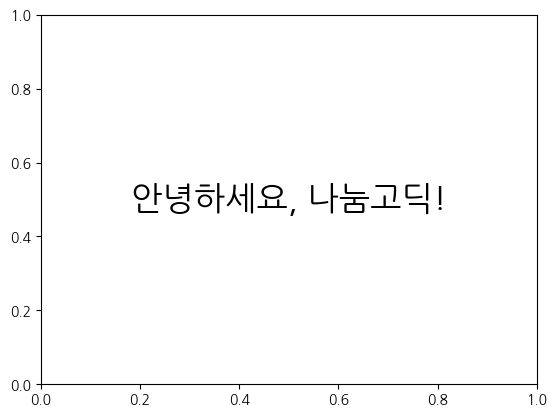

In [ ]:
# 시각화 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!apt-get install -y fonts-nanum
!fc-cache -fv
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.text(0.5, 0.5, '안녕하세요, 나눔고딕!', ha='center', va='center', size=24)
plt.show()

import seaborn as sns
from matplotlib import rc

sns.set(style="whitegrid")

# 한글 폰트 설정
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 라이브러리
import pandas as pd
import numpy as np

# 시각화 및 경고 처리

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리 및 차원 축소
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# 모델 선택 및 평가 지표 (Regression/Clustering/Classification 공통)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

# 회귀 모델 평가 지표
from sklearn.metrics import mean_squared_error

# 클러스터링 (Clustering)

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


# 머신러닝 모델 - 회귀 (Regression)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# 머신러닝 모델 - 분류 (Classification)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


# 부스팅 라이브러리 및 최적화

!pip install catboost
!pip install optuna
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import optuna

In [ ]:
# 데이터 불러오기
site_area_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/중급 프로젝트 2/raw_data/site_area.csv")
trial_access_log_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/중급 프로젝트 2/raw_data/trial_access_log.csv")
trial_payment_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/중급 프로젝트 2/raw_data/trial_payment.csv")
trial_register_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/중급 프로젝트 2/raw_data/trial_register.csv")
trial_visit_info_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/중급 프로젝트 2/raw_data/trial_visit_info.csv")

## EDA

###Ⅰ. 데이터 상태 확인

In [ ]:
all_df = {"site_area" : site_area_df, "trial_access_log" : trial_access_log_df, "trial_payment" : trial_payment_df, "trial_register" : trial_register_df, "trial_visit_info" : trial_visit_info_df}

for k, v in all_df.items():
  print(f"{k} 기술통계")
  display(v.info())
  display(v.describe())
  print("=" * 100)

site_area 기술통계
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   site_id      9 non-null      int64
 1   area_pyeong  9 non-null      int64
dtypes: int64(2)
memory usage: 276.0 bytes


None

site_id  area_pyeong
count   9.000000     9.000000
mean   14.888889    94.444444
std    19.348414    46.398036
min     1.000000    50.000000
25%     3.000000    50.000000
50%     5.000000   100.000000
75%    17.000000   150.000000
max    49.000000   150.000000

trial_access_log 기술통계
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63708 entries, 0 to 63707
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         63708 non-null  int64 
 1   checkin    63708 non-null  int64 
 2   cdate      63708 non-null  object
 3   site_id    63708 non-null  int64 
 4   user_uuid  63708 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.4+ MB


None

id       checkin       site_id
count  6.370800e+04  63708.000000  63708.000000
mean   9.991124e+05      1.495448      7.290843
std    6.811781e+05      0.499983     11.116908
min    5.154800e+04      1.000000      1.000000
25%    3.389112e+05      1.000000      3.000000
50%    9.312460e+05      1.000000      4.000000
75%    1.623065e+06      2.000000      6.000000
max    2.193657e+06      2.000000     49.000000

trial_payment 기술통계
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   is_payment  9659 non-null   int64 
 1   user_uuid   9659 non-null   object
dtypes: int64(1), object(1)
memory usage: 151.1+ KB


None

is_payment
count  9659.000000
mean      0.379335
std       0.485247
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

trial_register 기술통계
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   trial_date  9659 non-null   object
 1   user_uuid   9659 non-null   object
dtypes: object(2)
memory usage: 151.1+ KB


None

trial_date                             user_uuid
count         9659                                  9659
unique         855                                  9624
top     2022-12-08  906b191d-ccfe-45ab-9233-6445f631d1d1
freq           144                                     2

trial_visit_info 기술통계
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   site_id           11477 non-null  int64 
 1   date              11477 non-null  object
 2   stay_time         11477 non-null  object
 3   stay_time_second  11477 non-null  int64 
 4   first_enter_time  10922 non-null  object
 5   last_leave_time   10922 non-null  object
 6   user_uuid         11477 non-null  object
dtypes: int64(2), object(5)
memory usage: 627.8+ KB


None

site_id  stay_time_second
count  11477.000000      11477.000000
mean       7.502832      16689.460922
std       11.608720      11968.841154
min        1.000000          1.000000
25%        2.000000       7776.000000
50%        4.000000      14699.000000
75%        6.000000      23326.000000
max       49.000000      86377.000000

In [ ]:
for k, v in all_df.items():
  print(f"{k} 결측치 확인")
  missing_info = v.isnull().sum()
  missing_cols = missing_info[missing_info > 0]
  if len(missing_cols) > 0:
    print(f"결측치 발견:")
    for col, count in missing_cols.items():
        print(f"  {col}: {count}개 ({count/len(v)*100:.2f}%)")
  else:
    print("결측치 없음\n")

site_area 결측치 확인
결측치 없음

trial_access_log 결측치 확인
결측치 없음

trial_payment 결측치 확인
결측치 없음

trial_register 결측치 확인
결측치 없음

trial_visit_info 결측치 확인
결측치 발견:
  first_enter_time: 555개 (4.84%)
  last_leave_time: 555개 (4.84%)


###Ⅱ. 전환률 계산

In [ ]:
# 분석 기준 날짜 설정
TARGET_DATE = "2022-12-08"  # 12월 8일

# 해당 날짜에 등록한 유저만 필터링
df_reg_day = (
  trial_register_df
    .query("trial_date == @TARGET_DATE")
    .copy()
)

# 결제 정보 조인 (user_uuid 기준)
df_reg_pay = (
  df_reg_day
    .merge(
      trial_payment_df[["user_uuid", "is_payment"]],
      on="user_uuid",
      how="left"
    )
)

# 방문 기록 존재 여부 플래그 생성
visited_users = trial_access_log_df["user_uuid"].unique()
df_reg_pay["has_visit"] = df_reg_pay["user_uuid"].isin(visited_users)

# 전체 등록 인원 수
total_users = df_reg_pay["user_uuid"].nunique()

# ------------------------------------------------------------------
# [1] 결제 여부별 인원 수 및 비율
# ------------------------------------------------------------------
payment_summary = (
  df_reg_pay
    .groupby("is_payment", as_index=False)
    .agg(인원수=("user_uuid", "nunique"))
)

# 결제 여부 라벨링 (1: 결제, 0: 미결제)
payment_summary["결제여부"] = payment_summary["is_payment"].map({1: "결제", 0: "미결제"})

# 비율(%) 계산
payment_summary["비율(%)"] = (payment_summary["인원수"] / total_users * 100).round(2)

# 출력용 컬럼만 정리
payment_summary = payment_summary[["결제여부", "인원수", "비율(%)"]]

# ------------------------------------------------------------------
# [2] 방문 여부별 인원 수, 비율, 결제 전환율
# ------------------------------------------------------------------
visit_summary = (
  df_reg_pay
    .groupby("has_visit", as_index=False)
    .agg(
      인원수=("user_uuid", "nunique"),
      결제인원=("is_payment", lambda x: (x == 1).sum())
    )
)

# 방문 여부 라벨링
visit_summary["방문여부"] = visit_summary["has_visit"].map({True: "방문", False: "미방문"})

# 비율(%) 계산
visit_summary["비율(%)"] = (visit_summary["인원수"] / total_users * 100).round(2)

# 결제 전환율(%) = 결제인원 / 인원수
visit_summary["결제전환율(%)"] = (visit_summary["결제인원"] / visit_summary["인원수"] * 100).round(2)

# 출력용 컬럼만 정리
visit_summary = visit_summary[["방문여부", "인원수", "비율(%)", "결제전환율(%)"]]

# ------------------------------------------------------------------
# 결과 출력
# ------------------------------------------------------------------
print(f"분석 기준 날짜: {TARGET_DATE}")
print(f"전체 등록 인원: {total_users}명\n")

print("[결제 여부별 인원 및 비율]")
print(payment_summary)

print("\n[방문 여부별 인원, 비율, 결제 전환율]")
print(visit_summary)


분석 기준 날짜: 2022-12-08
전체 등록 인원: 144명

[결제 여부별 인원 및 비율]
  결제여부  인원수  비율(%)
0  미결제   92  63.89
1   결제   52  36.11

[방문 여부별 인원, 비율, 결제 전환율]
  방문여부  인원수  비율(%)  결제전환율(%)
0  미방문   80  55.56     36.25
1   방문   64  44.44     35.94


In [ ]:
display(trial_visit_info_df['stay_time_second'].describe())
trial_visit_info_df['stay_time_hour'] = trial_visit_info_df['stay_time_second'] / 3600.0
display(trial_visit_info_df['stay_time_hour'].describe())

count    11477.000000
mean     16689.460922
std      11968.841154
min          1.000000
25%       7776.000000
50%      14699.000000
75%      23326.000000
max      86377.000000
Name: stay_time_second, dtype: float64

count    11477.000000
mean         4.635961
std          3.324678
min          0.000278
25%          2.160000
50%          4.083056
75%          6.479444
max         23.993611
Name: stay_time_hour, dtype: float64

###Ⅲ. 평일 vs 주말 로그 수 / 월별 로그 수 / 요일별 로그 수

####Ⅲ- ⅰ. trial_register

In [ ]:
print("=== trial_register: 평일 vs 주말 로그 수 ===")
reg_weekend_counts = trial_register_df["trial_is_weekend"].value_counts().rename(index={False: "평일", True: "주말"})
print(reg_weekend_counts)
print()

print("=== trial_register: 월별 체험 신청 로그 수 ===")
reg_month_counts = trial_register_df["trial_ym"].value_counts().sort_index()
print(reg_month_counts)
print()

print("=== trial_register: 요일별 체험 신청 로그 수 (0=월, 6=일) ===")
reg_dow_counts = trial_register_df["trial_dow"].value_counts().sort_index()
print(reg_dow_counts)

=== trial_register: 평일 vs 주말 로그 수 ===
trial_is_weekend
평일    8174
주말    1485
Name: count, dtype: int64

=== trial_register: 월별 체험 신청 로그 수 ===
trial_ym
2021-05    282
2021-06    322
2021-07    357
2021-08    354
2021-09    483
2021-10    282
2021-11    400
2021-12    329
2022-01    417
2022-02    268
2022-03    305
2022-04    233
2022-05    206
2022-06    301
2022-07    260
2022-08    362
2022-09    266
2022-10    252
2022-11    203
2022-12    415
2023-01    305
2023-02    269
2023-03    275
2023-04    265
2023-05    230
2023-06    277
2023-07    224
2023-08    326
2023-09    356
2023-10    286
2023-11    254
2023-12    295
Name: count, dtype: int64

=== trial_register: 요일별 체험 신청 로그 수 (0=월, 6=일) ===
trial_dow
0    2111
1    1521
2    1515
3    1552
4    1475
5     683
6     802
Name: count, dtype: int64


####Ⅲ- ⅱ. trial_visit

In [ ]:
print("=== trial_visit_info: 평일 vs 주말 로그 수 ===")
visit_weekend_counts = trial_visit_info_df["visit_is_weekend"].value_counts().rename(index={False: "평일", True: "주말"})
print(visit_weekend_counts)
print()

print("=== trial_visit_info: 월별 방문 로그 수 ===")
visit_month_counts = trial_visit_info_df["visit_ym"].value_counts().sort_index()
print(visit_month_counts)
print()

print("=== trial_visit_info: 요일별 방문 로그 수 (0=월, 6=일) ===")
visit_dow_counts = trial_visit_info_df["visit_dow"].value_counts().sort_index()
print(visit_dow_counts)

=== trial_visit_info: 평일 vs 주말 로그 수 ===
visit_is_weekend
평일    8923
주말    2554
Name: count, dtype: int64

=== trial_visit_info: 월별 방문 로그 수 ===
visit_ym
2021-05    209
2021-06    360
2021-07    425
2021-08    349
2021-09    571
2021-10    328
2021-11    384
2021-12    403
2022-01    392
2022-02    360
2022-03    390
2022-04    243
2022-05    257
2022-06    361
2022-07    299
2022-08    344
2022-09    313
2022-10    325
2022-11    265
2022-12    441
2023-01    358
2023-02    333
2023-03    347
2023-04    314
2023-05    286
2023-06    322
2023-07    293
2023-08    432
2023-09    441
2023-10    392
2023-11    398
2023-12    527
2024-01     15
Name: count, dtype: int64

=== trial_visit_info: 요일별 방문 로그 수 (0=월, 6=일) ===
visit_dow
0    1303
1    1672
2    2029
3    2080
4    1839
5    1364
6    1190
Name: count, dtype: int64


####Ⅲ-ⅲ. trial_access_log

In [ ]:
print("=== trial_access_log: 평일 vs 주말 로그 수 ===")
access_weekend_counts = trial_access_log_df["access_is_weekend"].value_counts().rename(index={False: "평일", True: "주말"})
print(access_weekend_counts)
print()

print("=== trial_access_log: 월별 출입 로그 수 ===")
access_month_counts = trial_access_log_df["access_ym"].value_counts().sort_index()
print(access_month_counts)
print()

print("=== trial_access_log: 요일별 출입 로그 수 (0=월, 6=일) ===")
access_dow_counts = trial_access_log_df["access_dow"].value_counts().sort_index()
print(access_dow_counts)

=== trial_access_log: 평일 vs 주말 로그 수 ===
access_is_weekend
평일    49883
주말    13825
Name: count, dtype: int64

=== trial_access_log: 월별 출입 로그 수 ===
access_ym
2021-05    1095
2021-06    1871
2021-07    2474
2021-08    2261
2021-09    2982
2021-10    1653
2021-11    2364
2021-12    2422
2022-01    2411
2022-02    1976
2022-03    1949
2022-04    1154
2022-05    1308
2022-06    2273
2022-07    1620
2022-08    1821
2022-09    1465
2022-10    1744
2022-11    1376
2022-12    2259
2023-01    1968
2023-02    1743
2023-03    1829
2023-04    1872
2023-05    1875
2023-06    1875
2023-07    1628
2023-08    2402
2023-09    2248
2023-10    1908
2023-11    2252
2023-12    3547
2024-01      83
Name: count, dtype: int64

=== trial_access_log: 요일별 출입 로그 수 (0=월, 6=일) ===
access_dow
0     6286
1    10711
2    12672
3    10352
4     9862
5     7607
6     6218
Name: count, dtype: int64


####Ⅲ-ⅳ. trial_visit_info 유저별 체험 기간 내 재방문 횟수

In [ ]:
# 유저별 체험 시작일(최초 trial_date)
user_trial_start = (
  trial_register_df[["user_uuid", "trial_date"]]
  .groupby("user_uuid", as_index=False)["trial_date"]
  .min()
  .rename(columns={"trial_date": "trial_start_date"})
)

# visit_info에 체험 시작일 조인
visit_with_trial = trial_visit_info_df.merge(
  user_trial_start,
  on="user_uuid",
  how="left"
)

# 체험 기간(D0~D2) 내 방문만 필터링
max_offset = pd.Timedelta(days=2)
mask_trial_period = (
  (visit_with_trial["trial_start_date"].notna()) &
  (visit_with_trial["date"] >= visit_with_trial["trial_start_date"]) &
  (visit_with_trial["date"] <= visit_with_trial["trial_start_date"] + max_offset)
)

visit_in_trial = visit_with_trial[mask_trial_period].copy()

# 유저별 체험 기간 내 방문 "일수"와 "재방문 횟수" 계산
user_visit_days = (
  visit_in_trial.groupby("user_uuid")["date"]
  .nunique()
  .reset_index(name="visit_days_d0_d2")
)

# trial_register 기준 전체 유저에 대해 방문일수/재방문 횟수 붙이기
user_trial_stats = user_trial_start.merge(
  user_visit_days,
  on="user_uuid",
  how="left"
)

user_trial_stats["visit_days_d0_d2"] = user_trial_stats["visit_days_d0_d2"].fillna(0).astype(int)

# 재방문 횟수 = 방문일수 - 1 (0 미만은 0으로 처리)
user_trial_stats["revisit_count"] = user_trial_stats["visit_days_d0_d2"] - 1
user_trial_stats.loc[user_trial_stats["revisit_count"] < 0, "revisit_count"] = 0

# 요약 통계 출력
print("=== 체험 신청자 전체 기준 ===")
print("평균 방문일수 (D0~D2):", user_trial_stats["visit_days_d0_d2"].mean())
print("평균 재방문 횟수:", user_trial_stats["revisit_count"].mean())
print()

print("=== 체험 기간에 한 번 이상 방문한 유저 기준 ===")
has_visit_mask = user_trial_stats["visit_days_d0_d2"] > 0
print("방문 유저 수:", has_visit_mask.sum())
print("평균 방문일수 (D0~D2):", user_trial_stats.loc[has_visit_mask, "visit_days_d0_d2"].mean())
print("평균 재방문 횟수:", user_trial_stats.loc[has_visit_mask, "revisit_count"].mean())

# value_counts로 분포 확인
print()
print("방문일수 분포 (D0~D2):")
print(user_trial_stats["visit_days_d0_d2"].value_counts().sort_index())


=== 체험 신청자 전체 기준 ===
평균 방문일수 (D0~D2): 0.939214463840399
평균 재방문 횟수: 0.3136949293433084

=== 체험 기간에 한 번 이상 방문한 유저 기준 ===
방문 유저 수: 6020
평균 방문일수 (D0~D2): 1.5014950166112957
평균 재방문 횟수: 0.5014950166112957

방문일수 분포 (D0~D2):
visit_days_d0_d2
0    3604
1    3399
2    2223
3     398
Name: count, dtype: int64


###Ⅳ. 잔존율 계산

####Ⅳ-ⅰ. 잔존 인원, 이탈 인원 분리 후 결제 여부 확인

In [ ]:
# 유저별 체험 시작일 정의 (최초 trial_date)
user_trial = (
  trial_register_df[["user_uuid", "trial_date"]]
  .groupby("user_uuid", as_index=False)["trial_date"]
  .min()
  .rename(columns={"trial_date": "trial_start_date"})
)

# trial 기간: 시작일(D0) ~ 시작일 + 2일(D2)
trial_window = pd.Timedelta(days=2)

# trial_visit_info에서 trial 기간 내 이용 여부
visit_with_trial = trial_visit_info_df.merge(
  user_trial,
  on="user_uuid",
  how="inner"
)

mask_visit_in_trial = (
  (visit_with_trial["date"] >= visit_with_trial["trial_start_date"]) &
  (visit_with_trial["date"] <= visit_with_trial["trial_start_date"] + trial_window)
)

users_used_visit = (
  visit_with_trial.loc[mask_visit_in_trial, "user_uuid"]
  .drop_duplicates()
)

# trial_access_log에서 trial 기간 내 이용 여부
access_with_trial = trial_access_log_df.merge(
  user_trial,
  on="user_uuid",
  how="inner"
)

mask_access_in_trial = (
  (access_with_trial["cdate"] >= access_with_trial["trial_start_date"]) &
  (access_with_trial["cdate"] <= access_with_trial["trial_start_date"] + trial_window)
)

users_used_access = (
  access_with_trial.loc[mask_access_in_trial, "user_uuid"]
  .drop_duplicates()
)

# visit / access 둘 중 하나라도 trial 기간 내 이용한 유저 → 방문 인원
users_used_any = pd.Index(users_used_visit).union(users_used_access)

user_trial["visited_during_trial"] = user_trial["user_uuid"].isin(users_used_any)
user_trial["visit_group"] = user_trial["visited_during_trial"].map(
  {True: "방문", False: "미방문"}
)

# trial_payment에서 유저별 결제 여부 조인
user_payment = (
  trial_payment_df[["user_uuid", "is_payment"]]
  .drop_duplicates(subset="user_uuid", keep="last")
)

user_summary = user_trial.merge(
  user_payment,
  on="user_uuid",
  how="left"
)

user_summary["is_payment"] = user_summary["is_payment"].fillna(0).astype(int)

print("=== 방문/미방문 그룹별 인원 수 ===")
print(user_summary["visit_group"].value_counts())
print()

print("=== 방문/미방문 그룹 × 잔존/이탈(결제 여부) 교차표 ===")
ct = pd.crosstab(user_summary["visit_group"], user_summary["is_payment"])
ct.columns = ["이탈(0)", "잔존(1)"]
print(ct)
print()

print("=== 방문/미방문 그룹별 잔존율(결제율) ===")
payment_rate = (
  user_summary.groupby("visit_group")["is_payment"]
  .mean()
  .rename("payment_rate")
)
print((payment_rate * 100).round(2).astype(str) + "%")


=== 방문/미방문 그룹별 인원 수 ===
visit_group
방문     6023
미방문    3601
Name: count, dtype: int64

=== 방문/미방문 그룹 × 잔존/이탈(결제 여부) 교차표 ===
             이탈(0)  잔존(1)
visit_group              
미방문           2284   1317
방문            3688   2335

=== 방문/미방문 그룹별 잔존율(결제율) ===
visit_group
미방문    36.57%
방문     38.77%
Name: payment_rate, dtype: object


####Ⅳ-ⅱ. 첫 방문 지점 별 잔존율


In [ ]:
# trial 기간 내 방문 로그에 체험 시작일 조인
visit_with_trial = trial_visit_info_df.merge(
  user_trial[["user_uuid", "trial_start_date"]],
  on="user_uuid",
  how="inner"
)

mask_visit_in_trial = (
  (visit_with_trial["date"] >= visit_with_trial["trial_start_date"]) &
  (visit_with_trial["date"] <= visit_with_trial["trial_start_date"] + trial_window)
)

visit_in_trial = visit_with_trial[mask_visit_in_trial].copy()

# 유저별 '첫 방문' 지점 추출
visit_in_trial_sorted = visit_in_trial.sort_values(
  ["user_uuid", "date", "first_enter_time"]
)

first_site = (
  visit_in_trial_sorted
  .groupby("user_uuid", as_index=False)
  .first()[["user_uuid", "site_id"]]
  .rename(columns={"site_id": "first_site_id"})
)

# 결제 여부와 결합
user_with_first_site = user_summary.merge(
  first_site,
  on="user_uuid",
  how="left"
)

# 첫 방문 지점별 잔존율(결제율) 계산 (실제 방문한 유저만 대상)
site_retention = (
  user_with_first_site
  .dropna(subset=["first_site_id"])
  .groupby("first_site_id")["is_payment"]
  .agg(["count", "mean"])
  .reset_index()
  .rename(columns={
    "first_site_id": "site_id",
    "count": "user_count",
    "mean": "retention_rate"
  })
)

site_retention["retention_rate"] = (site_retention["retention_rate"] * 100).round(2)

print("=== 첫 방문 지점(site_id)별 잔존율(결제율) ===")
print(site_retention.sort_values("site_id"))


=== 첫 방문 지점(site_id)별 잔존율(결제율) ===
   site_id  user_count  retention_rate
0      1.0         760           41.05
1      2.0        1014           36.19
2      3.0        1225           42.12
3      4.0         464           40.09
4      5.0         552           45.65
5      6.0        1164           35.14
6     17.0         421           34.68
7     47.0         291           31.96
8     49.0         129           41.86


####Ⅳ-ⅲ. stay_time(체류시간 별 잔존율)


In [ ]:
# 체험 기간(D0~D2) 동안 user_uuid별 stay_time_second 합계
visit_with_trial = trial_visit_info_df.merge(
  user_trial[["user_uuid", "trial_start_date"]],
  on="user_uuid",
  how="inner"
)

mask_visit_in_trial = (
  (visit_with_trial["date"] >= visit_with_trial["trial_start_date"]) &
  (visit_with_trial["date"] <= visit_with_trial["trial_start_date"] + trial_window)
)

visit_in_trial = visit_with_trial[mask_visit_in_trial].copy()

# user_uuid별 체류시간(초) 합계
user_stay = (
  visit_in_trial
  .groupby("user_uuid")["stay_time_second"]
  .sum()
  .reset_index(name="total_stay_seconds")
)

# 체류시간(시간 단위) 계산 + 평균/중앙값 확인
user_stay["stay_time_hour"] = user_stay["total_stay_seconds"] / 3600.0

print("=== 체험 기간 내 체류시간(시간 단위) 기본 통계 ===")
print("유저 수:", len(user_stay))
print("평균 체류시간(시간):", user_stay["stay_time_hour"].mean())
print("중앙값 체류시간(시간):", user_stay["stay_time_hour"].median())
print()
print(user_stay["stay_time_hour"].describe())

# stay_time_hour 구간(label) 생성 + 구간별 잔존율(결제율)
#    - 0
#    - 0 초과 ~ 0.5 미만
#    - 0.5 이상 ~ 1 미만
#    - 1 이상 ~ 2 미만
#    - ...
#    - 23 이상 ~ 24 미만
#    - 24 이상

def bucket_stay_time(hour):
  if hour == 0:
    return "0시간"
  if 0 < hour < 0.5:
    return "0~0.5시간 미만"
  if 0.5 <= hour < 1:
    return "0.5~1시간 미만"
  if 1 <= hour < 24:
    start = int(hour)        # 1~23
    end = start + 1
    return f"{start}~{end}시간 미만"
  return "24시간 이상"

user_stay["stay_time_bucket"] = user_stay["stay_time_hour"].apply(bucket_stay_time)

# 버킷 순서를 사람이 읽기 좋은 순서로 정렬하기 위한 카테고리 정의
bucket_order = (
  ["0시간", "0~0.5시간 미만", "0.5~1시간 미만"] +
  [f"{h}~{h+1}시간 미만" for h in range(1, 24)] +
  ["24시간 이상"]
)

user_stay["stay_time_bucket"] = pd.Categorical(
  user_stay["stay_time_bucket"],
  categories=bucket_order,
  ordered=True
)

# 결제 여부(is_payment)와 결합 → 구간별 잔존율 계산
user_stay_with_pay = user_stay.merge(
  user_summary[["user_uuid", "is_payment"]],
  on="user_uuid",
  how="left"
)

user_stay_with_pay["is_payment"] = user_stay_with_pay["is_payment"].fillna(0).astype(int)

bucket_stats = (
  user_stay_with_pay
  .groupby("stay_time_bucket")["is_payment"]
  .agg(["count", "mean"])
  .reset_index()
  .rename(columns={
    "count": "user_count",
    "mean": "retention_rate"
  })
)

bucket_stats["retention_rate"] = (bucket_stats["retention_rate"] * 100).round(2)

print("\n=== 체류시간 구간별 유저 수 및 잔존율(결제율) ===")
print(bucket_stats.sort_values("stay_time_bucket"))


=== 체험 기간 내 체류시간(시간 단위) 기본 통계 ===
유저 수: 6020
평균 체류시간(시간): 7.152423311184939
중앙값 체류시간(시간): 5.556527777777777

count    6020.000000
mean        7.152423
std         6.024773
min         0.002500
25%         2.830278
50%         5.556528
75%         9.885556
max        48.924167
Name: stay_time_hour, dtype: float64

=== 체류시간 구간별 유저 수 및 잔존율(결제율) ===
   stay_time_bucket  user_count  retention_rate
0               0시간           0             NaN
1        0~0.5시간 미만         175           31.43
2        0.5~1시간 미만         335           41.79
3          1~2시간 미만         567           44.62
4          2~3시간 미만         557           42.01
5          3~4시간 미만         618           42.23
6          4~5시간 미만         503           39.36
7          5~6시간 미만         464           35.56
8          6~7시간 미만         434           38.94
9          7~8시간 미만         368           38.32
10         8~9시간 미만         297           36.36
11        9~10시간 미만         224           36.61
12       10~11시간 미만         

/tmp/ipython-input-3793367482.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("stay_time_bucket")["is_payment"]


###Ⅴ. site id별로 혼잡도 계산
* access_log는 UTC기준이라 KST로 변환하였습니다


In [ ]:
display(trial_visit_info_df['stay_time_second'].describe())
trial_visit_info_df['stay_time_hour'] = trial_visit_info_df['stay_time_second'] / 3600.0
display(trial_visit_info_df['stay_time_hour'].describe())

count    11477.000000
mean     16689.460922
std      11968.841154
min          1.000000
25%       7776.000000
50%      14699.000000
75%      23326.000000
max      86377.000000
Name: stay_time_second, dtype: float64

count    11477.000000
mean         4.635961
std          3.324678
min          0.000278
25%          2.160000
50%          4.083056
75%          6.479444
max         23.993611
Name: stay_time_hour, dtype: float64

하루 평균 4.6시간씩 사용중임. 1초만에 나간 로그가 있어서 조금 걸림


###Ⅵ. trial_access_log
1. site_id별, 시간대별로 몇 명의 인원이 존재했는지 카운트 (한 시간대에 5분 이내로 체류했으면 제외)
2. 퇴실이 입실보다 빠르면 이상치로 판단, 제외


####Ⅵ-ⅰ. 입실, 퇴실을 시간대별로 묶어서 추출


In [ ]:
# user_uuid, site_id별로 시간순 정렬
access_sorted = trial_access_log_df.sort_values(["user_uuid", "site_id", "cdate"]).copy()

# 입실/퇴실 구분
entries = access_sorted[access_sorted["checkin"] == 1].copy()
exits   = access_sorted[access_sorted["checkin"] == 2].copy()

# 같은 user_uuid, site_id 내에서 입실/퇴실 순번 매기기
entries["seq"] = entries.groupby(["user_uuid", "site_id"]).cumcount()
exits["seq"]   = exits.groupby(["user_uuid", "site_id"]).cumcount()

# seq 기준으로 입실–퇴실 매칭
sessions = entries.merge(
  exits,
  on=["user_uuid", "site_id", "seq"],
  suffixes=("_in", "_out")
)

# 세션별 입실/퇴실 시각 정의
sessions["enter_time"] = sessions["cdate_in"]
sessions["leave_time"] = sessions["cdate_out"]

# 비정상(퇴실시간이 입실시간보다 빠른 경우) 제거
sessions = sessions[sessions["leave_time"] > sessions["enter_time"]].copy()

print("세션 개수:", len(sessions))
print(sessions[["user_uuid", "site_id", "enter_time", "leave_time"]].head())


세션 개수: 28178
                              user_uuid  site_id                 enter_time  \
0  000590dc-046f-462b-8225-4c81a97b7166        6 2023-09-05 02:57:01.695334   
1  000590dc-046f-462b-8225-4c81a97b7166        6 2023-09-05 04:27:46.318391   
2  000590dc-046f-462b-8225-4c81a97b7166        6 2023-09-05 07:16:13.012870   
3  000be14f-ba0f-4af6-bc2c-7b00dfcbc98c        3 2021-09-30 07:31:14.861813   
4  000be14f-ba0f-4af6-bc2c-7b00dfcbc98c        3 2021-09-30 07:39:34.733779   

                  leave_time  
0 2023-09-05 04:24:05.907486  
1 2023-09-05 07:14:07.010936  
2 2023-09-05 08:59:45.973499  
3 2021-09-30 07:39:16.035267  
4 2021-09-30 07:41:07.572718  


####Ⅵ-ⅱ. 추출한 데이터를 시간대별로 5분 이내 필터링하면서 체류시간 계산


In [ ]:
# 세션 → 시간대(hour slot)로 확장하는 함수
def expand_session_to_hours(row):
  user = row["user_uuid"]
  site = row["site_id"]
  start = row["enter_time"]
  end   = row["leave_time"]

  # 방어 코드: NaT 또는 이상한 구간은 스킵
  if pd.isna(start) or pd.isna(end) or end <= start:
    return None

  # 시간대 시작 시각: floor('H')
  start_slot = start.floor("H")
  # 마지막으로 포함해야 할 slot은 (퇴실시각 - 1초).floor('H')
  # 예: 01:00 ~ 02:59 이면 end_slot=02:00
  end_slot = (end - pd.Timedelta(seconds=1)).floor("H")

  # start_slot ~ end_slot까지 1시간 간격
  all_slots = pd.date_range(start_slot, end_slot, freq="H")

  records = []
  for slot_start in all_slots:
    slot_end = slot_start + pd.Timedelta(hours=1)

    # 세션과 해당 시간대의 겹치는 구간 계산
    overlap_start = max(start, slot_start)
    overlap_end   = min(end, slot_end)
    overlap_sec   = (overlap_end - overlap_start).total_seconds()

    # 5분(300초) 미만 체류는 혼잡도에서 제외
    if overlap_sec >= 300:
      records.append(
        {
          "user_uuid": user,
          "site_id": site,
          "slot_start": slot_start,        # 예: 2023-05-01 01:00:00
          "overlap_seconds": overlap_sec,  # 해당 slot에서 머문 시간(초)
        }
      )

  if not records:
    return None
  return pd.DataFrame(records)

# 모든 세션에 대해 확장 수행
expanded_list = []
for _, row in sessions.iterrows():
  df_expanded = expand_session_to_hours(row)
  if df_expanded is not None:
    expanded_list.append(df_expanded)

session_hours = pd.concat(expanded_list, ignore_index=True)

print("세션-시간대 행 수:", len(session_hours))
print(session_hours.head())

/tmp/ipython-input-4048416506.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  start_slot = start.floor("H")
/tmp/ipython-input-4048416506.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  end_slot = (end - pd.Timedelta(seconds=1)).floor("H")
/tmp/ipython-input-4048416506.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  all_slots = pd.date_range(start_slot, end_slot, freq="H")


세션-시간대 행 수: 70963
                              user_uuid  site_id          slot_start  \
0  000590dc-046f-462b-8225-4c81a97b7166        6 2023-09-05 03:00:00   
1  000590dc-046f-462b-8225-4c81a97b7166        6 2023-09-05 04:00:00   
2  000590dc-046f-462b-8225-4c81a97b7166        6 2023-09-05 04:00:00   
3  000590dc-046f-462b-8225-4c81a97b7166        6 2023-09-05 05:00:00   
4  000590dc-046f-462b-8225-4c81a97b7166        6 2023-09-05 06:00:00   

   overlap_seconds  
0      3600.000000  
1      1445.907486  
2      1933.681609  
3      3600.000000  
4      3600.000000  


####Ⅵ-ⅲ. site_id별로 동시간대 인원을 구분
* unique를 통해 해당 시간대에 여러 번 방문한 동일 유저는 1명으로 취급


In [ ]:
# (site_id, slot_start)별 동시간대 인원 수
congestion = (
  session_hours
  .groupby(["site_id", "slot_start"])["user_uuid"]
  .nunique()
  .reset_index(name="user_count")
)

print("=== 혼잡도 예시 상위 10행 ===")
print(congestion.head(10))

=== 혼잡도 예시 상위 10행 ===
   site_id          slot_start  user_count
0        1 2021-05-03 05:00:00           1
1        1 2021-05-03 06:00:00           1
2        1 2021-05-03 07:00:00           1
3        1 2021-05-12 00:00:00           1
4        1 2021-05-12 01:00:00           1
5        1 2021-05-12 02:00:00           1
6        1 2021-05-12 03:00:00           1
7        1 2021-05-12 04:00:00           1
8        1 2021-05-12 05:00:00           1
9        1 2021-05-12 06:00:00           2


In [ ]:
site_hourly_dict = {
  sid: df_site.reset_index(drop=True)
  for sid, df_site in congestion.groupby("site_id")
}

# 예: site_id=3의 시간대별 혼잡도
site_3_congestion = site_hourly_dict.get(3)
print(site_3_congestion.head())

   site_id          slot_start  user_count
0        3 2021-05-02 09:00:00           1
1        3 2021-05-02 10:00:00           1
2        3 2021-05-02 11:00:00           1
3        3 2021-05-02 12:00:00           1
4        3 2021-05-04 04:00:00           1


####Ⅵ-ⅳ. 퇴실, 입실 역전 확인

In [ ]:
# 완전 중복 제거
access_nodup = trial_access_log_df.drop_duplicates().copy()

# user_uuid, cdate 기준 정렬
access_sorted = access_nodup.sort_values(["user_uuid", "cdate"]).copy()

def clean_log_per_user(df):
  n = len(df)
  keep = np.zeros(n, dtype=bool)   # 기본은 전부 삭제(False)
  open_stack = []                  # 열린 입실(1)의 위치 pos를 저장

  for pos, (_, row) in enumerate(df.iterrows()):
    flag = row["checkin"]

    if flag == 1:
      # 입실
      if len(open_stack) == 0:
        # 아직 열린 입실이 없으면 새로운 세션 시작 → 유지
        keep[pos] = True
        open_stack.append(pos)
      else:
        # 이미 입실 중인데 또 입실 → 중복 입실 → 삭제 (keep=False 유지)
        continue

    elif flag == 2:
      # 퇴실
      if len(open_stack) == 0:
        # 앞에 입실이 없는 퇴실 → 잘못된 퇴실 → 삭제
        continue
      else:
        # 가장 최근 입실과 매칭되는 정상 퇴실 → 유지
        keep[pos] = True
        open_stack.pop()

  # 루프가 끝난 뒤에도 남아 있는 입실(open_stack)은
  # 끝까지 퇴실이 없는 입실 → 삭제 대상
  for pos in open_stack:
    keep[pos] = False

  return df[keep]

# user_uuid별로 전처리 적용
preprocess_trial_access_log = (
  access_sorted
  .groupby("user_uuid", group_keys=False)
  .apply(clean_log_per_user)
  .reset_index(drop=True)
)

# 결과 확인 (모든 로그가 사라진 유저는 자동으로 드랍됨)
orig_rows = len(trial_access_log_df)
nodup_rows = len(access_nodup)
final_rows = len(preprocess_trial_access_log)

orig_users = trial_access_log_df["user_uuid"].nunique()
final_users = preprocess_trial_access_log["user_uuid"].nunique()

print("원본 trial_access_log_df 행 수:", orig_rows)
print("완전 중복 제거 후 행 수:", nodup_rows)
print("전처리 후 행 수:", final_rows)
print("원본 user_uuid 수:", orig_users)
print("전처리 후 user_uuid 수:", final_users)

원본 trial_access_log_df 행 수: 63708
완전 중복 제거 후 행 수: 63349
전처리 후 행 수: 60366
원본 user_uuid 수: 6026
전처리 후 user_uuid 수: 5985


/tmp/ipython-input-3902979280.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(clean_log_per_user)


In [ ]:
orig_users = trial_access_log_df["user_uuid"].unique()
final_users = preprocess_trial_access_log["user_uuid"].unique()

deleted_users = np.setdiff1d(orig_users, final_users)
kept_users = final_users
df_deleted = pd.DataFrame({
  "user_uuid": deleted_users,
  "log_status": "로그삭제"
})

df_kept = pd.DataFrame({
  "user_uuid": kept_users,
  "log_status": "로그유지"
})

df_log_status = pd.concat([df_deleted, df_kept], ignore_index=True)

print("로그가 삭제된 유저 수:", len(deleted_users))
print("로그가 유지된 유저 수:", len(kept_users))

pay_per_user = (
  trial_payment_df
  .groupby("user_uuid", as_index=False)
  .agg(is_payment=("is_payment", "max"))
)

df_log_pay = df_log_status.merge(
  pay_per_user,
  on="user_uuid",
  how="left"
)

df_log_pay["is_payment"] = df_log_pay["is_payment"].fillna(0)

conversion_summary = (
  df_log_pay
  .groupby("log_status", as_index=False)
  .agg(
    n_users=("user_uuid", "nunique"),
    n_paid=("is_payment", lambda x: (x == 1).sum())
  )
)

conversion_summary["conversion_rate(%)"] = (
  conversion_summary["n_paid"] / conversion_summary["n_users"] * 100
).round(2)

print("\n[로그 삭제 여부별 전환율 요약]")
print(conversion_summary)

로그가 삭제된 유저 수: 41
로그가 유지된 유저 수: 5985

[로그 삭제 여부별 전환율 요약]
  log_status  n_users  n_paid  conversion_rate(%)
0       로그삭제       41      12               29.27
1       로그유지     5985    2325               38.85


In [ ]:
before_counts = (
  access_sorted
  .groupby("user_uuid")
  .size()
  .rename("n_before")
  .reset_index()
)

after_counts = (
  preprocess_trial_access_log
  .groupby("user_uuid")
  .size()
  .rename("n_after")
  .reset_index()
)

user_counts = (
  before_counts
  .merge(after_counts, on="user_uuid", how="left")
)

# 전처리 후 해당 유저 로그가 전부 사라진 경우 n_after가 NaN → 0으로 처리
user_counts["n_after"] = user_counts["n_after"].fillna(0).astype(int)

# 한 행이라도 삭제된 유저: n_before > n_after
user_counts["has_deleted_rows"] = user_counts["n_before"] > user_counts["n_after"]

pay_per_user = (
  trial_payment_df
  .groupby("user_uuid", as_index=False)
  .agg(is_payment=("is_payment", "max"))
)

user_counts_pay = user_counts.merge(
  pay_per_user,
  on="user_uuid",
  how="left"
)

user_counts_pay["is_payment"] = user_counts_pay["is_payment"].fillna(0)

conversion_summary = (
  user_counts_pay
  .groupby("has_deleted_rows", as_index=False)
  .agg(
    n_users=("user_uuid", "nunique"),
    n_paid=("is_payment", lambda x: (x == 1).sum())
  )
)

conversion_summary["conversion_rate(%)"] = (
  conversion_summary["n_paid"] / conversion_summary["n_users"] * 100
).round(2)

conversion_summary["행삭제여부"] = conversion_summary["has_deleted_rows"].map({
  True: "행삭제 있음",
  False: "행삭제 없음"
})

conversion_summary = conversion_summary[
  ["행삭제여부", "n_users", "n_paid", "conversion_rate(%)"]
]

print("\n[행 삭제 여부별 결제 전환율 요약]")
print(conversion_summary)



[행 삭제 여부별 결제 전환율 요약]
    행삭제여부  n_users  n_paid  conversion_rate(%)
0  행삭제 없음     4099    1622               39.57
1  행삭제 있음     1927     715               37.10


## 마스터 테이블

###Ⅰ. 마스터 테이블 제작

In [ ]:
trial_access_log_df = pd.read_csv("/content/drive/MyDrive/중급프로젝트2(3팀)/데이터/가공데이터/2025_12_03 access 로그 전처리 방식 수정 버전/preprocess_trial_access_log.csv")
trial_access_log_df['cdate'] = pd.to_datetime(trial_access_log_df['cdate'], format='mixed')

# 2. UTC 보정 (Timezone이 없으면 UTC로 지정)
if trial_access_log_df['cdate'].dt.tz is None:
    trial_access_log_df['cdate'] = trial_access_log_df['cdate'].dt.tz_localize('UTC')
trial_access_log_df['cdate_kst'] = trial_access_log_df['cdate'].dt.tz_convert('Asia/Seoul').dt.tz_localize(None)

# 4. CSV 저장
trial_access_log_df.to_csv('/content/drive/MyDrive/중급프로젝트2(3팀)/데이터/가공데이터/2025_12_03 access 로그 전처리 방식 수정 버전/preprocess_trial_access_log(kst).csv', index=False, encoding='utf-8-sig')

In [ ]:
# --------------------------------------------------------------------------------
# [함수 1] 유틸리티: Timedelta -> HH:MM:SS 문자열 변환
# --------------------------------------------------------------------------------
def format_timedelta_to_hhmmss(td):
    if pd.isnull(td):
        return "00:00:00"
    total_seconds = int(td.total_seconds())
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60
    return f"{hours:02}:{minutes:02}:{seconds:02}"

# --------------------------------------------------------------------------------
# [함수 2] 1단계: 로그 데이터 가공 (Raw Log -> User Master)
# --------------------------------------------------------------------------------
def process_user_activity_log(log_file_path, master_output_path):
    print(f"\n[Step 1] 로그 데이터 가공 시작: {log_file_path}")
    df = pd.read_csv(log_file_path)
    df['cdate_kst'] = pd.to_datetime(df['cdate_kst'])

    # 유저별 기본 정보 (최초 지점, 지점 변경 여부)
    df = df.sort_values(by=['user_uuid', 'cdate_kst'])
    user_global_stats = df.groupby('user_uuid').agg(
        first_site_id=('site_id', 'first'),
        unique_sites=('site_id', 'nunique')
    ).reset_index()

    user_global_stats['is_changed_site'] = user_global_stats['unique_sites'] > 1
    user_global_stats = user_global_stats.drop(columns=['unique_sites'])

    #  세션 생성 (입실 -> 퇴실 매칭)
    df['next_checkin'] = df.groupby('user_uuid')['checkin'].shift(-1)
    df['next_cdate_kst'] = df.groupby('user_uuid')['cdate_kst'].shift(-1)

    session_df = df[(df['checkin'] == 1) & (df['next_checkin'] == 2)].copy()
    session_df['entry_time'] = session_df['cdate_kst']
    session_df['exit_time'] = session_df['next_cdate_kst']
    session_df['duration'] = session_df['exit_time'] - session_df['entry_time']

    #  날짜 할당 (새벽 5시 기준)
    session_df['session_date'] = (session_df['exit_time'] - pd.Timedelta(hours=5)).dt.floor('D')

    #  일별 집계 및 피벗
    daily_agg = session_df.groupby(['user_uuid', 'session_date']).agg(
        day_first=('entry_time', 'min'),
        day_last=('exit_time', 'max'),
        day_staytime=('duration', 'sum'),
        day_visit_cnt=('entry_time', 'count')
    ).reset_index()

    daily_agg['start_date'] = daily_agg.groupby('user_uuid')['session_date'].transform('min')
    daily_agg['day_diff'] = (daily_agg['session_date'] - daily_agg['start_date']).dt.days
    daily_agg['day_num'] = daily_agg['day_diff'] + 1

    # 3일차까지만 사용
    daily_agg_top3 = daily_agg[daily_agg['day_num'] <= 3].copy()
    pivoted = daily_agg_top3.pivot(index='user_uuid', columns='day_num')

    new_columns = []
    for col_name, day_num in pivoted.columns:
        new_columns.append(f'day{day_num}_{col_name.replace("day_", "")}')
    pivoted.columns = new_columns
    pivoted = pivoted.reset_index()

    # 병합 및 결측치 처리
    print("  > 유저 정보 병합 및 결측치 채우기 진행 중...")
    master_df = pd.merge(user_global_stats, pivoted, on='user_uuid', how='left')

    # 더미 날짜 (1900-01-01)
    dummy_date = pd.Timestamp('1900-01-01 00:00:00')

    expected_cols = ['user_uuid', 'first_site_id']

    for i in range(1, 4):
        stay_col = f'day{i}_staytime'
        cnt_col = f'day{i}_visit_cnt'
        first_col = f'day{i}_first'
        last_col = f'day{i}_last'
        attended_col = f'day{i}_attended'

        # 컬럼 생성 및 결측치 처리
        if stay_col not in master_df.columns: master_df[stay_col] = np.nan
        if cnt_col not in master_df.columns: master_df[cnt_col] = np.nan
        if first_col not in master_df.columns: master_df[first_col] = np.nan
        if last_col not in master_df.columns: master_df[last_col] = np.nan

        # 1) 체류시간 -> 0초 채우기 -> HH:MM:SS 포맷팅
        master_df[stay_col] = master_df[stay_col].fillna(pd.Timedelta(seconds=0))
        master_df[stay_col] = master_df[stay_col].apply(format_timedelta_to_hhmmss)

        # 2) 방문횟수 -> 0
        master_df[cnt_col] = master_df[cnt_col].fillna(0).astype(int)

        # 3) 입퇴실 시간 -> 1900-01-01
        master_df[first_col] = master_df[first_col].fillna(dummy_date)
        master_df[last_col] = master_df[last_col].fillna(dummy_date)
        master_df[first_col] = pd.to_datetime(master_df[first_col])
        master_df[last_col] = pd.to_datetime(master_df[last_col])

        # 참석 여부
        master_df[attended_col] = np.where(master_df[cnt_col] > 0, 1, 0)

        expected_cols.extend([first_col, last_col, stay_col, cnt_col, attended_col])

    expected_cols.append('is_changed_site')
    master_df = master_df[expected_cols]

    # 저장
    master_df.to_csv(master_output_path, index=False)
    print(f" 1단계 완료:(행 개수: {len(master_df)})")

    return master_df

# --------------------------------------------------------------------------------
# [함수 3] 2단계: 결제 데이터 조인 (User Master + Payment -> Final)
# --------------------------------------------------------------------------------
def join_payment_data(activity_df, payment_file_path, final_output_path):


    # 결제 데이터 로드
    df_payment = pd.read_csv(payment_file_path)

    if 'Unnamed: 0' in df_payment.columns:
        df_payment = df_payment.drop(columns=['Unnamed: 0'])

    print(f" 조인 전: 활동 데이터 {len(activity_df)}명, 결제 데이터 {len(df_payment)}명")

    # Inner Join 수행
    merged_df = pd.merge(activity_df, df_payment, on='user_uuid', how='inner')

    print(f" 조인 후: {len(merged_df)}명 (공통 유저만 남음)")

    # 저장
    merged_df.to_csv(final_output_path, index=False)
    print(f"'{final_output_path}'에 저장되었습니다.")

    return merged_df

# --------------------------------------------------------------------------------
# [메인 실행부] 경로 설정 및 실행
# --------------------------------------------------------------------------------
if __name__ == "__main__":
    base_path = '/content/drive/MyDrive/중급프로젝트2(3팀)/데이터/가공데이터/'

    # 입력 파일
    log_csv = '/content/drive/MyDrive/중급프로젝트2(3팀)/데이터/가공데이터/2025_12_03 access 로그 전처리 방식 수정 버전/preprocess_trial_access_log(kst).csv' # (예시 파일명) 실제 경로로 변경하세요
    payment_csv = os.path.join(base_path, 'repeat_trial_payment_df.csv')

    # 출력 파일
    master_csv = os.path.join(base_path, 'user_master(전처리수정).csv')      # 1단계 결과
    final_csv = os.path.join(base_path, 'final_master_dataset(전처리수정).csv') # 최종 결과

    try:
        # 로그 가공 함수 실행
        if os.path.exists(log_csv):
             activity_df = process_user_activity_log(log_csv, master_csv)
        else:
             # 파일이 없다면 예시로 로컬 경로 가정
             print(f"경고: {log_csv}를 찾을 수 없어 1단계를 건너뛰거나 경로를 확인해야 합니다.")


        # 결제 조인 함수 실행
        if 'activity_df' in locals():
            final_df = join_payment_data(activity_df, payment_csv, final_csv)

            #결과 확인
            print("\n[최종 데이터셋 미리보기]")
            print(final_df[['user_uuid', 'day1_staytime', 'is_payment']].head())

            conversion_rate = final_df['is_payment'].mean() * 100
            print(f"\n✅ 최종 데이터셋 내 유료 전환율: {conversion_rate:.2f}%")

    except FileNotFoundError as e:
        print(f"\n오류 발생: 파일을 찾을 수 없습니다. 경로를 확인해주세요.\n({e})")
    except Exception as e:
        print(f"\n오류 발생: {e}")


[Step 1] 로그 데이터 가공 시작: /content/drive/MyDrive/중급프로젝트2(3팀)/데이터/가공데이터/2025_12_03 access 로그 전처리 방식 수정 버전/preprocess_trial_access_log(kst).csv
  > 유저 정보 병합 및 결측치 채우기 진행 중...
  > 1단계 완료: 가공된 데이터가 '/content/drive/MyDrive/중급프로젝트2(3팀)/데이터/가공데이터/user_master(전처리수정).csv'에 저장되었습니다. (행 개수: 5985)

[Step 2] 결제 데이터 병합 시작: /content/drive/MyDrive/중급프로젝트2(3팀)/데이터/가공데이터/repeat_trial_payment_df.csv
  > 조인 전: 활동 데이터 5985명, 결제 데이터 9624명
  > 조인 후: 5985명 (공통 유저만 남음)
  > 2단계 완료: 최종 데이터셋이 '/content/drive/MyDrive/중급프로젝트2(3팀)/데이터/가공데이터/final_master_dataset(전처리수정).csv'에 저장되었습니다.

[최종 데이터셋 미리보기]
                              user_uuid day1_staytime  is_payment
0  000590dc-046f-462b-8225-4c81a97b7166      05:56:57           0
1  000be14f-ba0f-4af6-bc2c-7b00dfcbc98c      02:50:22           1
2  0018e22d-a2cc-4e06-bca2-d6a041770f3b      11:55:00           0
3  002606d9-38ca-48f3-910c-cbfada9a9109      03:31:29           0
4

###Ⅱ. 마스터 테이블 EDA

In [ ]:
# 데이터 불러오기
FILE_NOISEDEL = "/content/drive/MyDrive/Colab Notebooks/중급 프로젝트 2/EDA 데이터/final_master_dataset(noisedel).csv"
FILE_NOISE = "/content/drive/MyDrive/Colab Notebooks/중급 프로젝트 2/EDA 데이터/final_master_dataset(noise).csv"

df_noisedel = pd.read_csv(FILE_NOISEDEL)
df_noise = pd.read_csv(FILE_NOISE)
df_final = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/중급 프로젝트 2/EDA 데이터/2025_12_03 access_log 수정버전/user_master(전처리수정).csv")
df_trial_payment = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/중급 프로젝트 2/raw_data/trial_payment.csv")

In [ ]:
df_payment_user = (
  df_trial_payment
  .groupby("user_uuid", as_index=False)["is_payment"]
  .max()
)

# df_final에 is_payment 컬럼 merge (left join)
df_final = df_final.merge(
  df_payment_user[["user_uuid", "is_payment"]],
  on="user_uuid",
  how="left"
)

# 결과 확인
print(df_final[["user_uuid", "is_payment"]].head())
print("\n[INFO] is_payment 결측치 개수:", df_final["is_payment"].isna().sum())

                              user_uuid  is_payment
0  000590dc-046f-462b-8225-4c81a97b7166           0
1  000be14f-ba0f-4af6-bc2c-7b00dfcbc98c           1
2  0018e22d-a2cc-4e06-bca2-d6a041770f3b           0
3  002606d9-38ca-48f3-910c-cbfada9a9109           0
4  002a7570-90dd-4cab-b0aa-b0e40f7ef27a           1

[INFO] is_payment 결측치 개수: 0


In [ ]:
print("[INFO] noisedel shape:", df_noisedel.shape)
print("[INFO] noise    shape:", df_noise.shape)
print("[INFO] final    shape:", df_final.shape)

[INFO] noisedel shape: (3686, 19)
[INFO] noise    shape: (4177, 19)
[INFO] final    shape: (5985, 19)


In [ ]:
display(df_noisedel.head(3))
print("="*70)
display(df_noise.head(3))
print("="*70)
display(df_final.head(3))

user_uuid  first_site_id  \
0  000590dc-046f-462b-8225-4c81a97b7166              6   
1  000be14f-ba0f-4af6-bc2c-7b00dfcbc98c              3   
2  002606d9-38ca-48f3-910c-cbfada9a9109             17   

                   day1_first                   day1_last day1_staytime  \
0  2023-09-05 11:57:01.695334  2023-09-05 17:59:45.973499      05:56:57   
1  2021-09-30 16:31:14.861813  2021-09-30 20:25:41.850542      02:50:22   
2  2023-01-07 17:25:54.781175  2023-01-07 20:59:26.023706      03:31:29   

   day1_visit_cnt  day1_attended                  day2_first  \
0               3              1  1900-01-01 00:00:00.000000   
1               7              1  2021-10-01 19:30:20.894398   
2               2              1  2023-01-08 15:57:20.084255   

                    day2_last day2_staytime  day2_visit_cnt  day2_attended  \
0  1900-01-01 00:00:00.000000      00:00:00               0              0   
1  2021-10-01 22:08:58.909740      02:36:22               2              1   
2  2023-01-08 19:24:54.056668      03:25:34               2              1   

                   day3_first                   day3_last day3_staytime  \
0  1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
1  1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
2  1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   

   day3_visit_cnt  day3_attended  is_changed_site  is_payment  
0               0              0            False           0  
1               0              0            False           1  
2               0              0            False           0

user_uuid  first_site_id  \
0  000590dc-046f-462b-8225-4c81a97b7166              6   
1  000be14f-ba0f-4af6-bc2c-7b00dfcbc98c              3   
2  002606d9-38ca-48f3-910c-cbfada9a9109             17   

                   day1_first                   day1_last day1_staytime  \
0  2023-09-05 11:57:01.695334  2023-09-05 17:59:45.973499      05:56:57   
1  2021-09-30 16:31:14.861813  2021-09-30 20:25:41.850542      02:50:22   
2  2023-01-07 17:25:54.781175  2023-01-07 20:59:26.023706      03:31:29   

   day1_visit_cnt  day1_attended                  day2_first  \
0               3              1  1900-01-01 00:00:00.000000   
1               7              1  2021-10-01 19:30:20.894398   
2               2              1  2023-01-08 15:57:20.084255   

                    day2_last day2_staytime  day2_visit_cnt  day2_attended  \
0  1900-01-01 00:00:00.000000      00:00:00               0              0   
1  2021-10-01 22:08:58.909740      02:36:22               2              1   
2  2023-01-08 19:24:54.056668      03:25:34               2              1   

                   day3_first                   day3_last day3_staytime  \
0  1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
1  1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
2  1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   

   day3_visit_cnt  day3_attended  is_changed_site  is_payment  
0               0              0            False           0  
1               0              0            False           1  
2               0              0            False           0

user_uuid  first_site_id  \
0  000590dc-046f-462b-8225-4c81a97b7166              6   
1  000be14f-ba0f-4af6-bc2c-7b00dfcbc98c              3   
2  0018e22d-a2cc-4e06-bca2-d6a041770f3b              6   

                   day1_first                   day1_last day1_staytime  \
0  2023-09-05 11:57:01.695334  2023-09-05 17:59:45.973499      05:56:57   
1  2021-09-30 16:31:14.861813  2021-09-30 20:25:41.850542      02:50:22   
2  2023-11-15 09:44:08.498847  2023-11-15 21:47:13.500699      11:55:00   

   day1_visit_cnt  day1_attended                  day2_first  \
0               3              1  1900-01-01 00:00:00.000000   
1               7              1  2021-10-01 19:30:20.894398   
2               6              1  2023-11-16 09:04:41.565727   

                    day2_last day2_staytime  day2_visit_cnt  day2_attended  \
0  1900-01-01 00:00:00.000000      00:00:00               0              0   
1  2021-10-01 22:08:58.909740      02:36:22               2              1   
2  2023-11-16 18:39:26.886181      09:34:32               2              1   

                   day3_first                   day3_last day3_staytime  \
0  1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
1  1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
2  1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   

   day3_visit_cnt  day3_attended  is_changed_site  is_payment  
0               0              0            False           0  
1               0              0            False           1  
2               0              0            False           0

####Ⅱ-ⅰ. 유틸 함수 설정

In [ ]:
def reshape_days(df):
  records = []
  for day in [1, 2, 3]:
    first_col = f"day{day}_first"
    visit_col = f"day{day}_visit_cnt"
    attended_col = f"day{day}_attended"

    # 방문한 날만 사용 (attended == 1)
    tmp = df.loc[df[attended_col] == 1, ["user_uuid", "first_site_id", first_col, visit_col]].copy()
    tmp["day"] = day
    tmp["visit_date"] = pd.to_datetime(tmp[first_col])
    tmp["weekday"] = tmp["visit_date"].dt.dayofweek  # 0=월, 6=일
    tmp["visit_cnt"] = tmp[visit_col]
    records.append(tmp)

  days_df = pd.concat(records, ignore_index=True)
  return days_df


def prepare_stay_hours(df):
  df = df.copy()
  for day in [1, 2, 3]:
    col = f"day{day}_staytime"
    new_col = f"day{day}_stay_hours"
    # "HH:MM:SS" 형식을 timedelta로 변환 후 시간 단위로 환산
    df[new_col] = pd.to_timedelta(df[col]).dt.total_seconds() / 3600.0

  df["total_stay_hours"] = df["day1_stay_hours"] + df["day2_stay_hours"] + df["day3_stay_hours"]
  return df

def bucket_func(x):
  if pd.isna(x):
    return np.nan
  if x == 0:
    return "0"
  if 0 < x < 1:
    return "(0,1)"
  if x >= 24:
    return "[24,∞)"
  k = int(x)
  return f"[{k},{k+1})"

def sort_key(bucket):
  if pd.isna(bucket):
    return 999
  if bucket == "0":
    return 0
  if bucket == "(0,1)":
    return 1
  if bucket == "[24,∞)":
    return 100
  try:
    start = int(bucket.split(",")[0].strip("["))
    return start + 1
  except Exception:
    return 998

def staytime_bucket_stats(df, col_name):
  df = df.copy()
  bucket_col = f"{col_name}_bucket"
  df[bucket_col] = df[col_name].apply(bucket_func)

  total_users = df["user_uuid"].nunique()

  stats = (
    df.groupby(bucket_col, dropna=False)
      .agg(
        n_users=("user_uuid", "nunique"),
        ratio=("user_uuid", lambda x: x.nunique() / total_users * 100),
        payment_rate=("is_payment", lambda x: x.mean() * 100)
      )
      .reset_index()
      .rename(columns={bucket_col: "staytime_bucket"})
  )
  stats["sort_key"] = stats["staytime_bucket"].apply(sort_key)
  stats = stats.sort_values("sort_key").drop(columns=["sort_key"])

  print(f"\n[체류시간 버킷 통계] {col_name}")
  print(stats)
  return stats


def annotate_bar(ax):
  for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height, f"{height:.0f}", ha="center", va="bottom", fontsize=9)

def month_to_season(month):
  if month in [3, 4, 5]:
    return "spring"
  elif month in [6, 7, 8]:
    return "summer"
  elif month in [9, 10, 11]:
    return "autumn"
  else:
    return "winter"

####Ⅱ-ⅱ. 요일 별 방문 횟수 및 총 방문 수 (attended를 통해 참석한 날만 분석)


요일별 방문 분포 분석 - final

[표] 요일별 방문 통계 (user_days = 방문 유저 수, total_visits = 방문 횟수 합)
   weekday weekday_name  user_days  total_visits
0        0          Mon        852          2885
1        1          Tue       1482          5061
2        2          Wed       1768          6049
3        3          Thu       1423          4929
4        4          Fri       1359          4729
5        5          Sat       1041          3595
6        6          Sun        840          2927


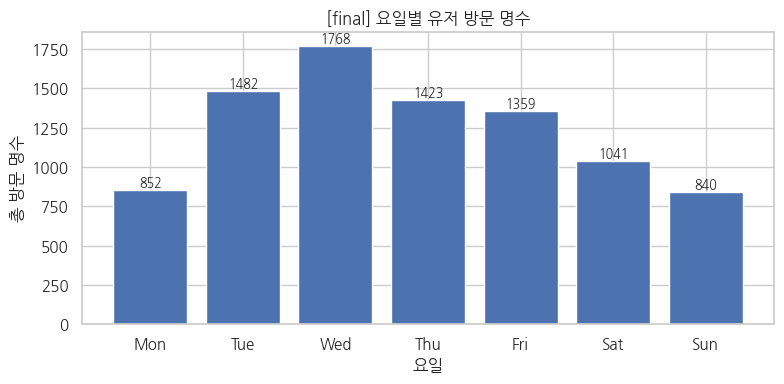

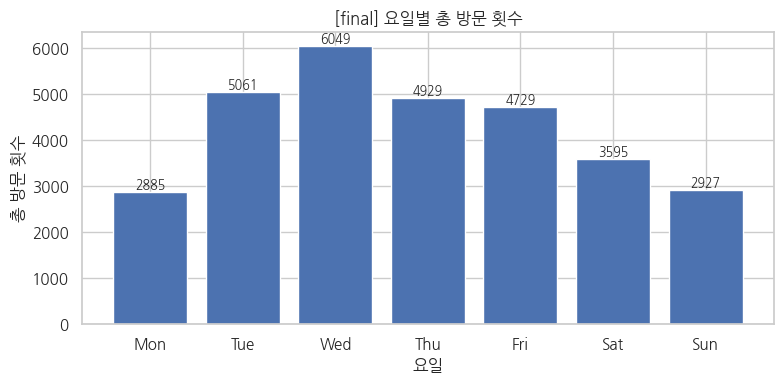

In [ ]:
def analyze_weekday_visits(df, label):
  print(f"요일별 방문 분포 분석 - {label}")

  days_df = reshape_days(df)

  # 요일별: 방문이 발생한 user-days 수, visit_cnt 총합
  weekday_stats = (
    days_df.groupby("weekday")
      .agg(
        user_days=("user_uuid", "nunique"),   # 해당 요일에 방문한 유저 수
        total_visits=("visit_cnt", "sum")     # 해당 요일 총 방문 횟수
      )
      .reset_index()
  )

  weekday_map = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
  weekday_stats["weekday_name"] = weekday_stats["weekday"].map(weekday_map)

  print("\n[표] 요일별 방문 통계 (user_days = 방문 유저 수, total_visits = 방문 횟수 합)")
  print(weekday_stats[["weekday", "weekday_name", "user_days", "total_visits"]])

  # barplot: 요일별 user_days
  weekday_stats = weekday_stats.sort_values("weekday")
  x = weekday_stats["weekday_name"]
  y = weekday_stats["user_days"]

  plt.figure(figsize=(8, 4))
  ax = plt.gca()
  ax.bar(x, y)
  annotate_bar(ax)
  ax.set_title(f"[{label}] 요일별 유저 방문 명수")
  ax.set_xlabel("요일")
  ax.set_ylabel("총 방문 명수")
  plt.tight_layout()
  plt.show()

  # barplot: 요일별 total_visits
  weekday_stats = weekday_stats.sort_values("weekday")
  x = weekday_stats["weekday_name"]
  y = weekday_stats["total_visits"]

  plt.figure(figsize=(8, 4))
  ax = plt.gca()
  ax.bar(x, y)
  annotate_bar(ax)
  ax.set_title(f"[{label}] 요일별 총 방문 횟수")
  ax.set_xlabel("요일")
  ax.set_ylabel("총 방문 횟수")
  plt.tight_layout()
  plt.show()

analyze_weekday_visits(df_final, "final")

####Ⅱ-ⅲ. Site별 유저 수, 방문 수

first_site_id 별 유저 수 및 방문 수 - final

[표] first_site_id 별 유저 수, 방문 수
   first_site_id  n_users  total_visits
0              1      756          3599
1              2     1003          2984
2              3     1216          8160
3              4      458          2172
4              5      550          3030
5              6     1162          6514
6             17      420          1810
7             47      291          1283
8             49      129           623


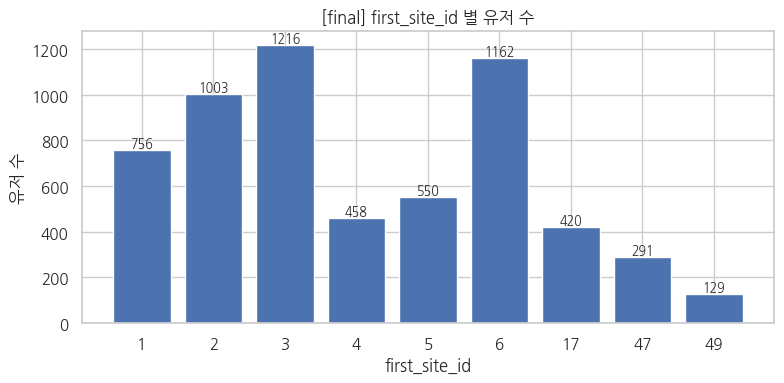

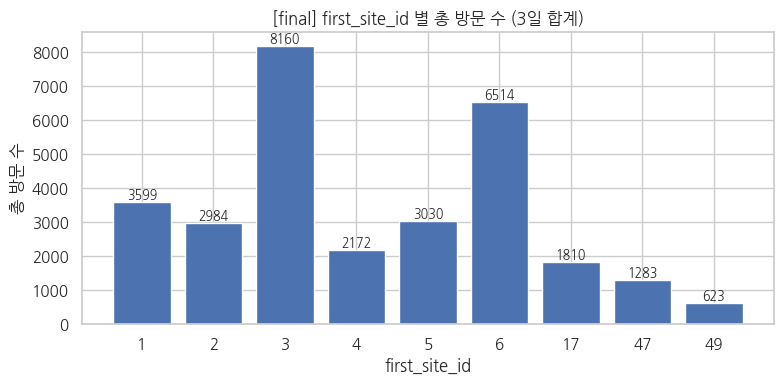

In [ ]:
def analyze_first_site_visits(df, label):
  print(f"first_site_id 별 유저 수 및 방문 수 - {label}")

  df = df.copy()
  df["total_visit_cnt"] = df["day1_visit_cnt"] + df["day2_visit_cnt"] + df["day3_visit_cnt"]

  site_stats = (
    df.groupby("first_site_id")
      .agg(
        n_users=("user_uuid", "nunique"),
        total_visits=("total_visit_cnt", "sum")
      )
      .reset_index()
      .sort_values("first_site_id")
  )

  print("\n[표] first_site_id 별 유저 수, 방문 수")
  print(site_stats)

  # barplot 1: 유저 수
  plt.figure(figsize=(8, 4))
  ax1 = plt.gca()
  ax1.bar(site_stats["first_site_id"].astype(str), site_stats["n_users"])
  annotate_bar(ax1)
  ax1.set_title(f"[{label}] first_site_id 별 유저 수")
  ax1.set_xlabel("first_site_id")
  ax1.set_ylabel("유저 수")
  plt.tight_layout()
  plt.show()

  # barplot 2: 방문 수
  plt.figure(figsize=(8, 4))
  ax2 = plt.gca()
  ax2.bar(site_stats["first_site_id"].astype(str), site_stats["total_visits"])
  annotate_bar(ax2)
  ax2.set_title(f"[{label}] first_site_id 별 총 방문 수 (3일 합계)")
  ax2.set_xlabel("first_site_id")
  ax2.set_ylabel("총 방문 수")
  plt.tight_layout()
  plt.show()


analyze_first_site_visits(df_final, "final")

 기존과 차이 발생
- 2번 site의 로그 개수가 눈에 띄게 상승 (200% 이상)
- 그에 따라 방문수도 많이 상승했지만, 다른 site들에서는 비슷함


###Ⅲ. 결제 전환율

####Ⅲ-ⅰ. 방문 일수별 결제 전환율 차이

방문 일수별 비율 및 전환율 - final

[표] 방문 일수별 유저 비율 및 전환율
   attended_days  n_users  payment_rate      ratio
0              1     3495     35.364807  58.395990
1              2     2112     43.371212  35.288221
2              3      378     45.767196   6.315789


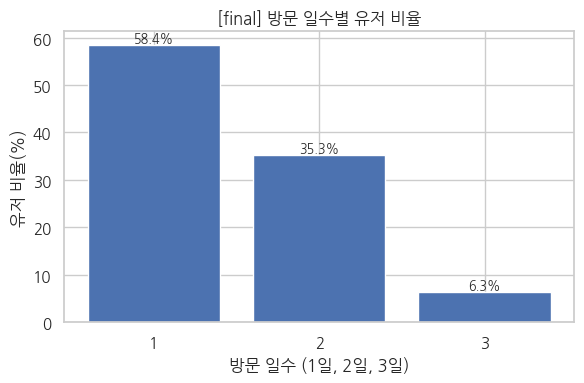

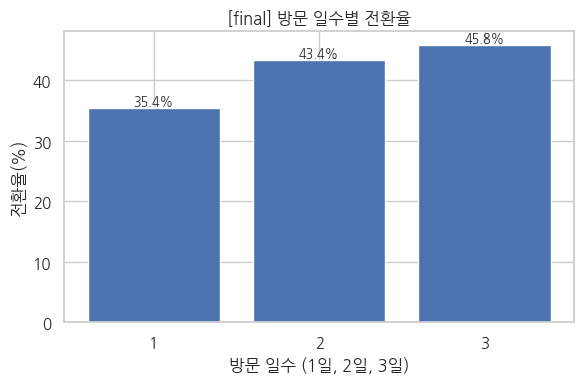

In [ ]:
def analyze_attended_patterns(df, label):
  print(f"방문 일수별 비율 및 전환율 - {label}")

  df = df.copy()
  df["attended_days"] = df["day1_attended"] + df["day2_attended"] + df["day3_attended"]
  total_users = df["user_uuid"].nunique()

  pattern_stats = (
    df.groupby("attended_days")
      .agg(
        n_users=("user_uuid", "nunique"),
        payment_rate=("is_payment", lambda x: x.mean() * 100)
      )
      .reset_index()
  )
  pattern_stats["ratio"] = pattern_stats["n_users"] / total_users * 100
  pattern_stats = pattern_stats.sort_values("attended_days")

  print("\n[표] 방문 일수별 유저 비율 및 전환율")
  print(pattern_stats)

  # barplot: 방문 일수별 유저 비율
  plt.figure(figsize=(6, 4))
  ax = plt.gca()
  ax.bar(pattern_stats["attended_days"].astype(str), pattern_stats["ratio"])
  for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height, f"{height:.1f}%", ha="center", va="bottom", fontsize=9)
  ax.set_title(f"[{label}] 방문 일수별 유저 비율")
  ax.set_xlabel("방문 일수 (1일, 2일, 3일)")
  ax.set_ylabel("유저 비율(%)")
  plt.tight_layout()
  plt.show()

  # barplot: 방문 일수별 전환율
  plt.figure(figsize=(6, 4))
  ax2 = plt.gca()
  ax2.bar(pattern_stats["attended_days"].astype(str), pattern_stats["payment_rate"])
  for p in ax2.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax2.text(x, height, f"{height:.1f}%", ha="center", va="bottom", fontsize=9)
  ax2.set_title(f"[{label}] 방문 일수별 전환율")
  ax2.set_xlabel("방문 일수 (1일, 2일, 3일)")
  ax2.set_ylabel("전환율(%)")
  plt.tight_layout()
  plt.show()

analyze_attended_patterns(df_final, "final")

차이 발생
- 2일차의 인원이 확 늘면서 비중이 많이 늘었고, 전환율도 계층 구조가 보이게 되었습니다. 3일 방문 인원도 적긴 하지만 기존의 3.9%보다 비중이 커져서 어느 정도 신뢰할 수 있습니다.

####Ⅲ-ⅱ. site_id별 변경 여부, 전환율


first_site_id 별 site 변경 여부, 전환율 - final

[표] first_site_id 별 변경 발생 수 및 전환율


first_site_id  n_users  n_changed_site  n_payment  changed_rate  \
0              1      756              63        312      8.333333   
1              2     1003              21        364      2.093719   
2              3     1216              35        513      2.878289   
3              4      458              11        186      2.401747   
4              5      550              15        250      2.727273   
5              6     1162              33        408      2.839931   
6             17      420              28        145      6.666667   
7             47      291               5         93      1.718213   
8             49      129               4         54      3.100775   

   payment_rate  
0     41.269841  
1     36.291127  
2     42.187500  
3     40.611354  
4     45.454545  
5     35.111876  
6     34.523810  
7     31.958763  
8     41.860465

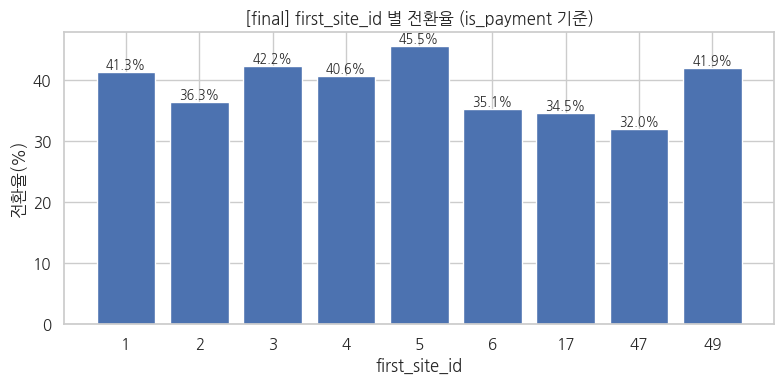

In [ ]:
def analyze_first_site_flags(df, label):
  print(f"first_site_id 별 site 변경 여부, 전환율 - {label}")

  site_flags = (
    df.groupby("first_site_id")
      .agg(
        n_users=("user_uuid", "nunique"),
        n_changed_site=("is_changed_site", "sum"),
        n_payment=("is_payment", "sum")
      )
      .reset_index()
  )

  site_flags["changed_rate"] = site_flags["n_changed_site"] / site_flags["n_users"] * 100
  site_flags["payment_rate"] = site_flags["n_payment"] / site_flags["n_users"] * 100
  site_flags = site_flags.sort_values("first_site_id")

  print("\n[표] first_site_id 별 변경 발생 수 및 전환율")
  display(site_flags)

  # barplot: first_site_id 별 전환율
  plt.figure(figsize=(8, 4))
  ax = plt.gca()
  ax.bar(site_flags["first_site_id"].astype(str), site_flags["payment_rate"])
  for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height, f"{height:.1f}%", ha="center", va="bottom", fontsize=9)
  ax.set_title(f"[{label}] first_site_id 별 전환율 (is_payment 기준)")
  ax.set_xlabel("first_site_id")
  ax.set_ylabel("전환율(%)")
  plt.tight_layout()
  plt.show()

analyze_first_site_flags(df_final, "final")

차이 발생
- 낮은 애들은 조금 올라오고 높은 애들은 조금 낮아진 경향이 있습니다.

###Ⅳ. 체류시간 별 잔존율


In [ ]:
def analyze_staytime_retention(df, label):
  print(f"체류시간 구간별 비율 및 잔존율 - {label}")

  df = prepare_stay_hours(df)

  for col in ["day1_stay_hours", "day2_stay_hours", "day3_stay_hours", "total_stay_hours"]:
    print(f"\n--- {col} 기준 체류시간 구간별 통계 ---")
    stats = staytime_bucket_stats(df, col)
    print(stats)

analyze_staytime_retention(df_final, "final")

체류시간 구간별 비율 및 잔존율 - final

--- day1_stay_hours 기준 체류시간 구간별 통계 ---

[체류시간 버킷 통계] day1_stay_hours
   staytime_bucket  n_users      ratio  payment_rate
0            (0,1)      718  11.996658     44.289694
1            [1,2)      724  12.096909     45.856354
10           [2,3)      818  13.667502     44.865526
14           [3,4)      840  14.035088     40.119048
15           [4,5)      689  11.512114     35.849057
16           [5,6)      660  11.027569     35.151515
17           [6,7)      516   8.621554     34.689922
18           [7,8)      397   6.633250     34.005038
19           [8,9)      284   4.745196     29.577465
20          [9,10)      152   2.539683     26.973684
2          [10,11)       79   1.319967     27.848101
3          [11,12)       50   0.835422     24.000000
4          [12,13)       26   0.434419     30.769231
5          [13,14)       15   0.250627     20.000000
6          [14,15)        6   0.100251     50.000000
7          [15,16)        3   0.050125     66.666667
8  

####Ⅳ-ⅰ. 차이 발생

1일차
- 0 ~ 4시간 그룹이 각각 전체의 15 ~ 16%를 차지하고 있었는데, 인원이 늘면서 조금 퍼지게 되었습니다. 11 ~ 14% 정도로 0\~6시간까지 퍼지게 되었고, 6\~8시간도 6~8%로 꽤 높게 기록되었습니다. (업무시간?)
- 이후 구간은 급격히 줄어들기 시작하며 11시간 이상은 극소수로 관측됩니다.
- 단, 전환율은 여전히 0~4시간이 40 ~ 45%로 안정적이고 이후는 4 ~ 8시간까지 30%를 기록합니다. 체류시간이 길수록 잔존율이 낮아진다는 관점은 변함없습니다.

2일차
- 0시간이 61%로 이전보다 비중이 8% 정도 줄었습니다. 하지만 여전히 과반수입니다.
- 1\~2시간 그룹의 잔존율이 65%로 매우 높습니다. 0\~5시간까지 전부 41\~65%로 잔존율이 높게 기록되었으나 과반수를 넘긴 것은 0~2시간 그룹만입니다.
- 이후는 전부 40% 미만을 기록하고 9시간 이상은 각 그룹의 인원이 100명이 채 되지 않습니다.

3일차
- 0시간이 91%로 2일차처럼 비중이 3% 정도 줄었습니다.
- 이외 그룹이 모두 100명을 넘기지 않기 때문에 해석에 주의가 필요합니다.
- 위 내용을 감안하고 본다면, 0~2시간 그룹의 잔존율이 과반수를 넘기기는 했습니다. 56 ~ 65%로 꽤 높게 기록되었지만, 표본이 너무 적다보니 이후 그룹들에서 계속 출렁이는 것을 확인했습니다.

total
- total로 보게 될 경우 체류시간 버킷 그룹 간 인원 분배가 잘 이루어진 것으로 보입니다. 가장 많은 비중을 차지한 그룹이 3~4시간으로 전체의 10%를 차지하고 있습니다.
- total로 볼 때 0~9시간까지는 전부 5% ~ 10%를 차지하고 있고, 이외 그룹들은 전부 0 ~ 3%를 차지하고 있습니다.  (0 ~ 9시간을 합산할 경우 전체의 70%)
- 그 중 0\~5시간 유저들이 각각 8~10%를 차지하고 있고, 전환율도 39 ~ 41% 정도로 안정적으로 보입니다.
- 이후로는 5\~9 시간 유저들도 꽤 많은 비중을 차지하고 있지만 해당 그룹들의 잔존율은 34~38% 정도로 낮게 기록되었습니다.
- 또한 16시간 이후 그룹들은 전부 100명이 채 안 되기 때문에 해석에 주의해야 합니다.



###Ⅴ. 계절별 stay_time 확인 (attend 1만)


[시즌별 체류시간 및 방문 수] - final

[표] 시즌별 visit_cnt 합계, stay_time(시간) 합계, 유저 수
   season  total_visit_cnt  total_stay_hours  n_users
1  spring             5235       6964.170000     1086
2  summer             8645      11771.992500     1665
0  autumn             8562      11259.925556     1786
3  winter             7733      10545.651667     1502


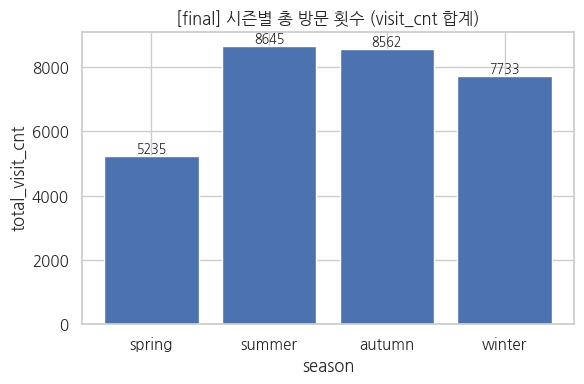

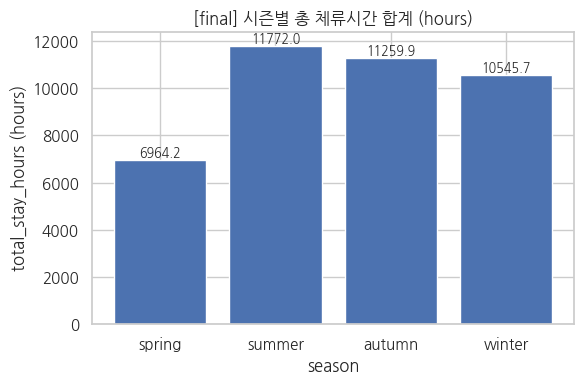

In [ ]:
def annotate_bar(ax, fmt="{:.0f}"):
  for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height, fmt.format(height), ha="center", va="bottom", fontsize=9)

def build_season_level_df(df):
  records = []

  for day in [1, 2, 3]:
    first_col = f"day{day}_first"
    visit_col = f"day{day}_visit_cnt"
    attended_col = f"day{day}_attended"
    stay_col = f"day{day}_staytime"

    # 해당 day를 실제로 방문한 유저만 사용
    sub = df[df[attended_col] == 1].copy()

    # staytime -> 시간 단위로 변환
    sub["stay_hours"] = pd.to_timedelta(sub[stay_col]).dt.total_seconds() / 3600.0

    # 날짜 → 월 → 시즌
    sub["date"] = pd.to_datetime(sub[first_col])
    sub["month"] = sub["date"].dt.month
    sub["season"] = sub["month"].apply(month_to_season)

    tmp = sub[["user_uuid", "first_site_id", "season", visit_col, "stay_hours"]].copy()
    tmp.rename(columns={visit_col: "visit_cnt"}, inplace=True)
    records.append(tmp)

  season_df = pd.concat(records, ignore_index=True)
  return season_df


def analyze_season_staytime(df, label):
  print(f"[시즌별 체류시간 및 방문 수] - {label}")

  season_df = build_season_level_df(df)

  # 시즌별 visit_cnt 합계, stay_hours 합계, 해당 시즌 방문한 유저 수
  season_stats = (
    season_df
    .groupby("season")
    .agg(
      total_visit_cnt=("visit_cnt", "sum"),
      total_stay_hours=("stay_hours", "sum"),
      n_users=("user_uuid", "nunique")
    )
    .reset_index()
  )

  # 시즌 순서를 고정하고 싶으면 카테고리 정렬
  season_order = ["spring", "summer", "autumn", "winter"]
  season_stats["season"] = pd.Categorical(season_stats["season"], categories=season_order, ordered=True)
  season_stats = season_stats.sort_values("season")

  print("\n[표] 시즌별 visit_cnt 합계, stay_time(시간) 합계, 유저 수")
  print(season_stats)

  # barplot 1: 시즌별 visit_cnt 합계
  plt.figure(figsize=(6, 4))
  ax1 = plt.gca()
  ax1.bar(season_stats["season"].astype(str), season_stats["total_visit_cnt"])
  annotate_bar(ax1, fmt="{:.0f}")
  ax1.set_title(f"[{label}] 시즌별 총 방문 횟수 (visit_cnt 합계)")
  ax1.set_xlabel("season")
  ax1.set_ylabel("total_visit_cnt")
  plt.tight_layout()
  plt.show()

  # barplot 2: 시즌별 stay_time(시간) 합계
  plt.figure(figsize=(6, 4))
  ax2 = plt.gca()
  ax2.bar(season_stats["season"].astype(str), season_stats["total_stay_hours"])
  annotate_bar(ax2, fmt="{:.1f}")
  ax2.set_title(f"[{label}] 시즌별 총 체류시간 합계 (hours)")
  ax2.set_xlabel("season")
  ax2.set_ylabel("total_stay_hours (hours)")
  plt.tight_layout()
  plt.show()


analyze_season_staytime(df_final, "final")

차이 발생
* 봄은 여전히 인원이 가장 적게 기록되지만, 여름의 visit_cnt, 체류시간이 많이 상승해서 2위 -> 1위까지 상승

###Ⅵ. 리드 타임


In [ ]:
df_trial_register = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/중급 프로젝트 2/raw_data/trial_register.csv")
df_trial_register.head(3)

trial_date                             user_uuid
0  2023-12-21  2b251333-8676-4c11-a736-dcf2350f8821
1  2023-12-21  e111619a-0975-451b-9a4a-bc8aea7b7b84
2  2023-12-21  4a184795-b056-4572-a874-644f68609ea3

In [ ]:
df_trial_register["trial_date"] = pd.to_datetime(df_trial_register["trial_date"])

# user_uuid별로 trial_date가 여러 번 있으면 "가장 이른 날짜"만 사용
df_trial_user = (
  df_trial_register
  .groupby("user_uuid", as_index=False)["trial_date"]
  .max()
)

# 매핑용 시리즈 생성: user_uuid -> trial_date
trial_date_map = df_trial_user.set_index("user_uuid")["trial_date"]

# df_noisedel, df_noise 각각에 lead_time_min 추가
for df, label in [(df_final, "final")]:
  # day1_first를 datetime으로 변환 (이미 datetime이어도 다시 변환해도 무방)
  df["day1_first_ts"] = pd.to_datetime(df["day1_first"])

  # trial_date 매핑 (trial_register에 없는 user_uuid는 NaT → lead_time_min은 NaN)
  df["trial_date"] = df["user_uuid"].map(trial_date_map)

  # lead_time_min 계산 (분 단위)
  df["lead_time_min"] = (df["day1_first_ts"] - df["trial_date"]).dt.total_seconds() / 60

  print(f"[INFO] {label} lead_time_min 생성 완료")
  print(df["lead_time_min"].describe())

[INFO] final lead_time_min 생성 완료
count    5985.000000
mean     2123.679091
std       963.682149
min         0.165370
25%      1162.541907
50%      2205.751513
75%      2541.103929
max      4300.070193
Name: lead_time_min, dtype: float64


In [ ]:
for df, label in [(df_final, "final")]:
  missing_cnt = df["lead_time_min"].isna().sum()
  total_cnt = len(df)
  print(f"[{label}] lead_time_min 결측치 개수: {missing_cnt} / {total_cnt} 행")

# 시간 단위 컬럼 생성 (분 -> 시간)
for df in [df_final]:
  df["lead_time_hour"] = df["lead_time_min"] / 60.0

# 시간 단위 리드타임 기술통계 (결측 제외)
def lead_time_hour_summary(df, label):
  s = df["lead_time_hour"].dropna()
  summary = {
    "count": s.count(),
    "mean": s.mean(),
    "median": s.median(),
    "q1_25": s.quantile(0.25),
    "q2_50": s.quantile(0.50),
    "q3_75": s.quantile(0.75),
    "min": s.min(),
    "max": s.max()
  }
  print(f"\n[lead_time_hour 기술통계] {label}")
  print(pd.Series(summary))

lead_time_hour_summary(df_final, "final")

[final] lead_time_min 결측치 개수: 0 / 5985 행

[lead_time_hour 기술통계] final
count     5985.000000
mean        35.394652
median      36.762525
q1_25       19.375698
q2_50       36.762525
q3_75       42.351732
min          0.002756
max         71.667837
dtype: float64



[리드타임 분포 및 전환율] final
    lead_time_hour  n_users     ratio  payment_rate
0                0        9  0.150376     55.555556
1                1        1  0.016708      0.000000
2                2        2  0.033417     50.000000
3                4        1  0.016708      0.000000
4                5        1  0.016708      0.000000
..             ...      ...       ...           ...
64              67       59  0.985798     44.067797
65              68       28  0.467836     60.714286
66              69       17  0.284043     52.941176
67              70        9  0.150376     66.666667
68              71        5  0.083542     20.000000

[69 rows x 4 columns]


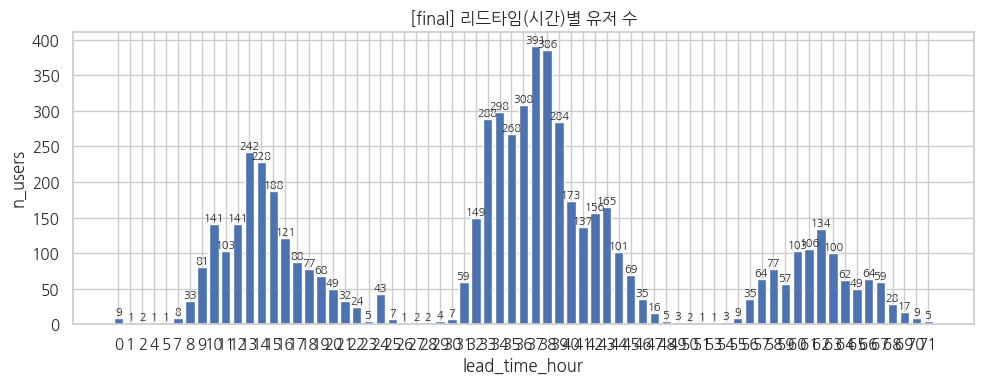

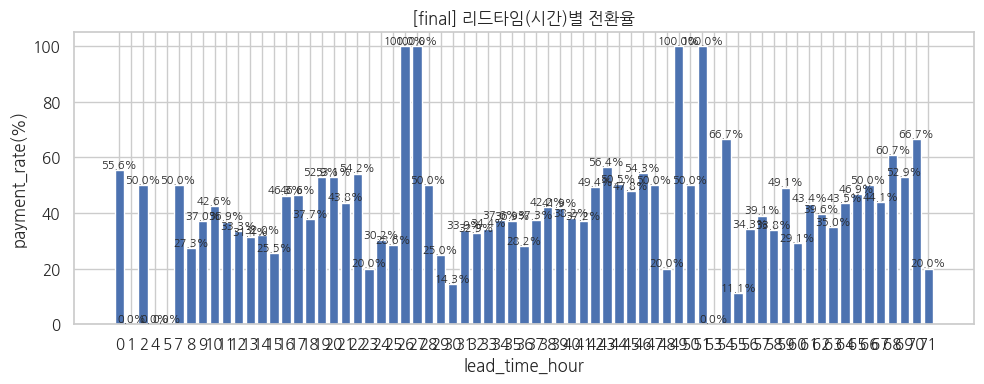

In [ ]:
def analyze_lead_time_by_hour(df, label, max_hour=None):
  # 리드타임이 존재하는 유저만 사용
  tmp = df[~df["lead_time_hour"].isna()].copy()
  total_users = tmp["user_uuid"].nunique()

  # 음수 리드타임이 있을 수도 있으니 그대로 floor
  tmp["lead_time_hour_floor"] = np.floor(tmp["lead_time_hour"]).astype(int)

  # max_hour 기준으로 상한 묶기
  if max_hour is not None:
    tmp["lead_time_hour_floor_clipped"] = tmp["lead_time_hour_floor"].clip(upper=max_hour)
    hour_col = "lead_time_hour_floor_clipped"
  else:
    hour_col = "lead_time_hour_floor"

  # 시간대별 통계
  stats = (
    tmp
    .groupby(hour_col)
    .agg(
      n_users=("user_uuid", "nunique"),
      payment_rate=("is_payment", lambda x: x.mean() * 100)
    )
    .reset_index()
    .rename(columns={hour_col: "lead_time_hour"})
  )

  stats["ratio"] = stats["n_users"] / total_users * 100
  stats = stats.sort_values("lead_time_hour")

  # max_hour 이상을 하나의 레이블로 표현하고 싶으면 문자열 처리
  if max_hour is not None:
    stats["lead_time_hour_label"] = stats["lead_time_hour"].astype(str)
    stats.loc[stats["lead_time_hour"] == max_hour, "lead_time_hour_label"] = f"{max_hour}+"
    x_labels = stats["lead_time_hour_label"]
  else:
    x_labels = stats["lead_time_hour"].astype(str)

  print(f"\n[리드타임 분포 및 전환율] {label}")
  print(stats[["lead_time_hour", "n_users", "ratio", "payment_rate"]])

  # barplot 1: 시간대별 유저 수
  plt.figure(figsize=(10, 4))
  ax1 = plt.gca()
  ax1.bar(x_labels, stats["n_users"])
  for p in ax1.patches:
    h = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax1.text(x, h, f"{h:.0f}", ha="center", va="bottom", fontsize=8)
  ax1.set_title(f"[{label}] 리드타임(시간)별 유저 수")
  ax1.set_xlabel("lead_time_hour")
  ax1.set_ylabel("n_users")
  plt.tight_layout()
  plt.show()

  # barplot 2: 시간대별 전환율
  plt.figure(figsize=(10, 4))
  ax2 = plt.gca()
  ax2.bar(x_labels, stats["payment_rate"])
  for p in ax2.patches:
    h = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax2.text(x, h, f"{h:.1f}%", ha="center", va="bottom", fontsize=8)
  ax2.set_title(f"[{label}] 리드타임(시간)별 전환율")
  ax2.set_xlabel("lead_time_hour")
  ax2.set_ylabel("payment_rate(%)")
  plt.tight_layout()
  plt.show()

  return stats


# 상한 72시간(3일)까지 시간 단위로 보고, 72시간 초과는 72+로 묶기
stats_lead_final = analyze_lead_time_by_hour(df_final, "final", max_hour=72)


In [ ]:
for df in [df_final]:
  df["lead_time_day"] = df["lead_time_min"] / (60.0 * 24.0)

# 리드타임(day) 기본 통계 (결측 제외)
def lead_time_day_summary(df, label):
  s = df["lead_time_day"].dropna()
  summary = {
    "count": s.count(),
    "mean": s.mean(),
    "median": s.median(),
    "q1_25": s.quantile(0.25),
    "q2_50": s.quantile(0.50),
    "q3_75": s.quantile(0.75),
    "min": s.min(),
    "max": s.max()
  }
  print(f"\n[lead_time_day 기술통계] {label}")
  print(pd.Series(summary))

lead_time_day_summary(df_final, "final")


[lead_time_day 기술통계] final
count     5985.000000
mean         1.474777
median       1.531772
q1_25        0.807321
q2_50        1.531772
q3_75        1.764656
min          0.000115
max          2.986160
dtype: float64



[리드타임(일) 분포 및 전환율] final
   lead_time_day  n_users      ratio  payment_rate
0              0     1643  27.451963     36.944614
1              1     3349  55.956558     39.205733
2              2      993  16.591479     40.785498


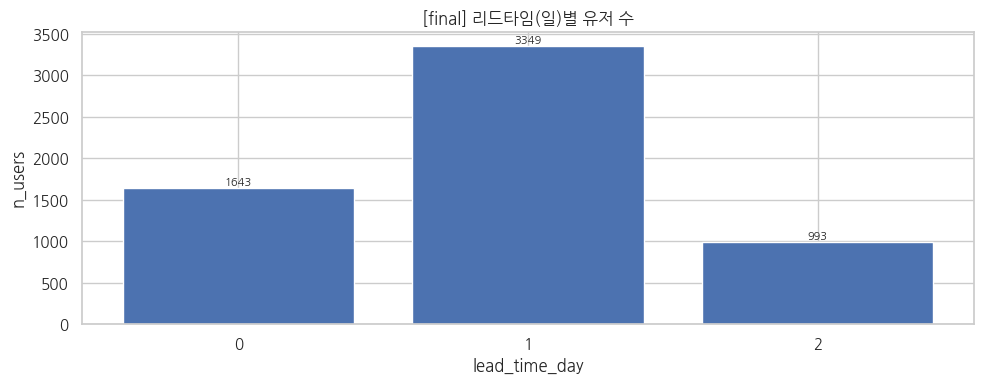

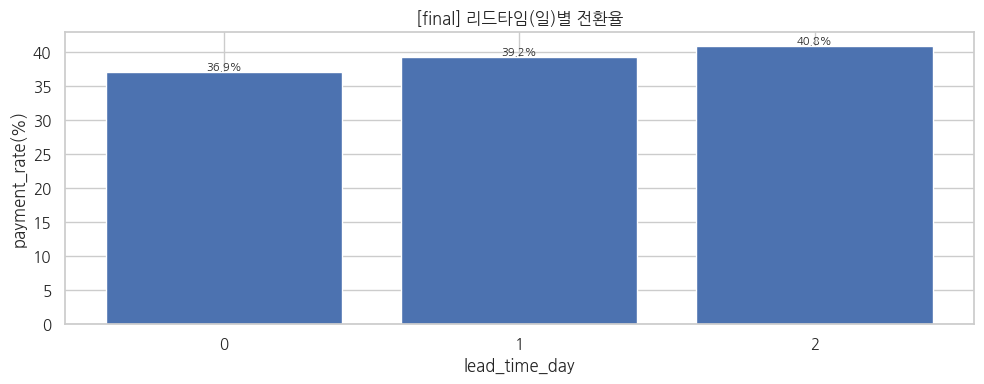

In [ ]:
def analyze_lead_time_by_day(df, label, max_day=None):
  tmp = df[~df["lead_time_day"].isna()].copy()
  total_users = tmp["user_uuid"].nunique()

  # 정수 일 단위로 내림 (예: 1.8일 -> 1일, 0.3일 -> 0일)
  tmp["lead_time_day_floor"] = np.floor(tmp["lead_time_day"]).astype(int)

  # 상한 묶기
  if max_day is not None:
    tmp["lead_time_day_floor_clipped"] = tmp["lead_time_day_floor"].clip(upper=max_day)
    day_col = "lead_time_day_floor_clipped"
  else:
    day_col = "lead_time_day_floor"

  stats = (
    tmp
    .groupby(day_col)
    .agg(
      n_users=("user_uuid", "nunique"),
      payment_rate=("is_payment", lambda x: x.mean() * 100)
    )
    .reset_index()
    .rename(columns={day_col: "lead_time_day"})
  )

  stats["ratio"] = stats["n_users"] / total_users * 100
  stats = stats.sort_values("lead_time_day")

  # 레이블: max_day 이상은 "max_day+"로 표시
  if max_day is not None:
    stats["lead_time_day_label"] = stats["lead_time_day"].astype(str)
    stats.loc[stats["lead_time_day"] == max_day, "lead_time_day_label"] = f"{max_day}+"
    x_labels = stats["lead_time_day_label"]
  else:
    x_labels = stats["lead_time_day"].astype(str)

  print(f"\n[리드타임(일) 분포 및 전환율] {label}")
  print(stats[["lead_time_day", "n_users", "ratio", "payment_rate"]])

  # barplot 1: 일(day)별 유저 수
  plt.figure(figsize=(10, 4))
  ax1 = plt.gca()
  ax1.bar(x_labels, stats["n_users"])
  for p in ax1.patches:
    h = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax1.text(x, h, f"{h:.0f}", ha="center", va="bottom", fontsize=8)
  ax1.set_title(f"[{label}] 리드타임(일)별 유저 수")
  ax1.set_xlabel("lead_time_day")
  ax1.set_ylabel("n_users")
  plt.tight_layout()
  plt.show()

  # barplot 2: 일(day)별 전환율
  plt.figure(figsize=(10, 4))
  ax2 = plt.gca()
  ax2.bar(x_labels, stats["payment_rate"])
  for p in ax2.patches:
    h = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax2.text(x, h, f"{h:.1f}%", ha="center", va="bottom", fontsize=8)
  ax2.set_title(f"[{label}] 리드타임(일)별 전환율")
  ax2.set_xlabel("lead_time_day")
  ax2.set_ylabel("payment_rate(%)")
  plt.tight_layout()
  plt.show()

  return stats


# 실행 예시: 7일까지는 개별 일, 7일 초과는 7+ 그룹으로 묶어서 보기
stats_lead_day_final = analyze_lead_time_by_day(df_final, "final", max_day=7)

차이
- 뚜렷한 차이가 없음 수치적으로는 차이가 조금 발생
- 0 그룹 (약 543명 상승) 1 그룹 (약 1032명 상승) 2 그룹 (약 233명 상승)

###Ⅶ 마스터 테이블 노이즈 버전

In [ ]:
final_master_dataset_noise= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀 프로젝트 3/final_master_dataset(noise).csv')
final_master_dataset_noise

user_uuid  first_site_id  \
0     000590dc-046f-462b-8225-4c81a97b7166              6   
1     000be14f-ba0f-4af6-bc2c-7b00dfcbc98c              3   
2     002606d9-38ca-48f3-910c-cbfada9a9109             17   
3     002a7570-90dd-4cab-b0aa-b0e40f7ef27a              5   
4     003e68d8-5f45-4549-b00d-3da0a10833ae              6   
...                                    ...            ...   
4172  ffb73a8f-3496-4268-84f1-b3bc2dc08d8c              6   
4173  ffb82bb5-0183-48f0-984e-0b69b2f12c6f              3   
4174  ffcb7950-d150-40ae-a6bf-f85f5c2b9702              2   
4175  ffce32ca-2efc-4485-b685-4b65811c2dcf              4   
4176  ffd287bc-2797-4788-82fa-6268c82e7fa9              6   

                      day1_first                   day1_last day1_staytime  \
0     2023-09-05 11:57:01.695334  2023-09-05 17:59:45.973499      05:56:57   
1     2021-09-30 16:31:14.861813  2021-09-30 20:25:41.850542      02:50:22   
2     2023-01-07 17:25:54.781175  2023-01-07 20:59:26.023706      03:31:29   
3     2021-09-08 16:37:24.456986  2021-09-08 22:25:10.197658      05:12:02   
4     2022-11-02 15:24:38.136761  2022-11-02 16:29:05.139665      01:04:27   
...                          ...                         ...           ...   
4172  2021-12-05 14:52:49.807813  2021-12-05 16:56:08.637719      02:03:18   
4173  2023-09-06 13:28:33.474752  2023-09-06 18:20:06.583092      04:47:12   
4174  2022-04-26 13:51:12.763210  2022-04-26 18:06:31.661452      04:12:34   
4175  2023-11-02 00:31:57.590241  2023-11-02 02:49:23.113461      02:17:25   
4176  2023-04-07 15:19:53.092779  2023-04-07 18:09:40.896455      02:41:12   

      day1_visit_cnt  day1_attended                  day2_first  \
0                  3              1  1900-01-01 00:00:00.000000   
1                  7              1  2021-10-01 19:30:20.894398   
2                  2              1  2023-01-08 15:57:20.084255   
3                  5              1  1900-01-01 00:00:00.000000   
4                  1              1  1900-01-01 00:00:00.000000   
...              ...            ...                         ...   
4172               1              1  1900-01-01 00:00:00.000000   
4173               2              1  1900-01-01 00:00:00.000000   
4174               2              1  2022-04-27 14:01:49.040076   
4175               1              1  2023-11-02 12:09:21.078294   
4176               4              1  2023-04-08 15:26:33.087593   

                       day2_last day2_staytime  day2_visit_cnt  day2_attended  \
0     1900-01-01 00:00:00.000000      00:00:00               0              0   
1     2021-10-01 22:08:58.909740      02:36:22               2              1   
2     2023-01-08 19:24:54.056668      03:25:34               2              1   
3     1900-01-01 00:00:00.000000      00:00:00               0              0   
4     1900-01-01 00:00:00.000000      00:00:00               0              0   
...                          ...           ...             ...            ...   
4172  1900-01-01 00:00:00.000000      00:00:00               0              0   
4173  1900-01-01 00:00:00.000000      00:00:00               0              0   
4174  2022-04-27 18:10:32.176612      04:00:59               3              1   
4175  2023-11-02 12:12:45.944963      00:03:24               1              1   
4176  2023-04-08 22:52:31.912488      06:35:03               6              1   

                      day3_first                   day3_last day3_staytime  \
0     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
1     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
2     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
3     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
4     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
...                          ...                         ...           ...   
4172  1900-01-01 00:00:00.000000  1900-

In [ ]:
final_master_dataset_noise.isnull().count()

user_uuid          4177
first_site_id      4177
day1_first         4177
day1_last          4177
day1_staytime      4177
day1_visit_cnt     4177
day1_attended      4177
day2_first         4177
day2_last          4177
day2_staytime      4177
day2_visit_cnt     4177
day2_attended      4177
day3_first         4177
day3_last          4177
day3_staytime      4177
day3_visit_cnt     4177
day3_attended      4177
is_changed_site    4177
is_payment         4177
dtype: int64

In [ ]:
final_master_dataset_noise.describe()

first_site_id  day1_visit_cnt  day1_attended  day2_visit_cnt  \
count    4177.000000     4177.000000         4177.0     4177.000000   
mean        7.291836        3.109409            1.0        1.123534   
std        11.447921        2.275399            0.0        2.116023   
min         1.000000        1.000000            1.0        0.000000   
25%         2.000000        1.000000            1.0        0.000000   
50%         3.000000        2.000000            1.0        0.000000   
75%         6.000000        4.000000            1.0        2.000000   
max        49.000000       18.000000            1.0       24.000000   

       day2_attended  day3_visit_cnt  day3_attended   is_payment  
count    4177.000000     4177.000000    4177.000000  4177.000000  
mean        0.335408        0.228154       0.067991     0.395020  
std         0.472189        1.049490       0.251761     0.488914  
min         0.000000        0.000000       0.000000     0.000000  
25%         0.000000        0.000000       0.000000     0.000000  
50%         0.000000        0.000000       0.000000     0.000000  
75%         1.000000        0.000000       0.000000     1.000000  
max         1.000000       17.000000       1.000000     1.000000

In [ ]:
final_master_dataset_noise1 = final_master_dataset_noise.copy()

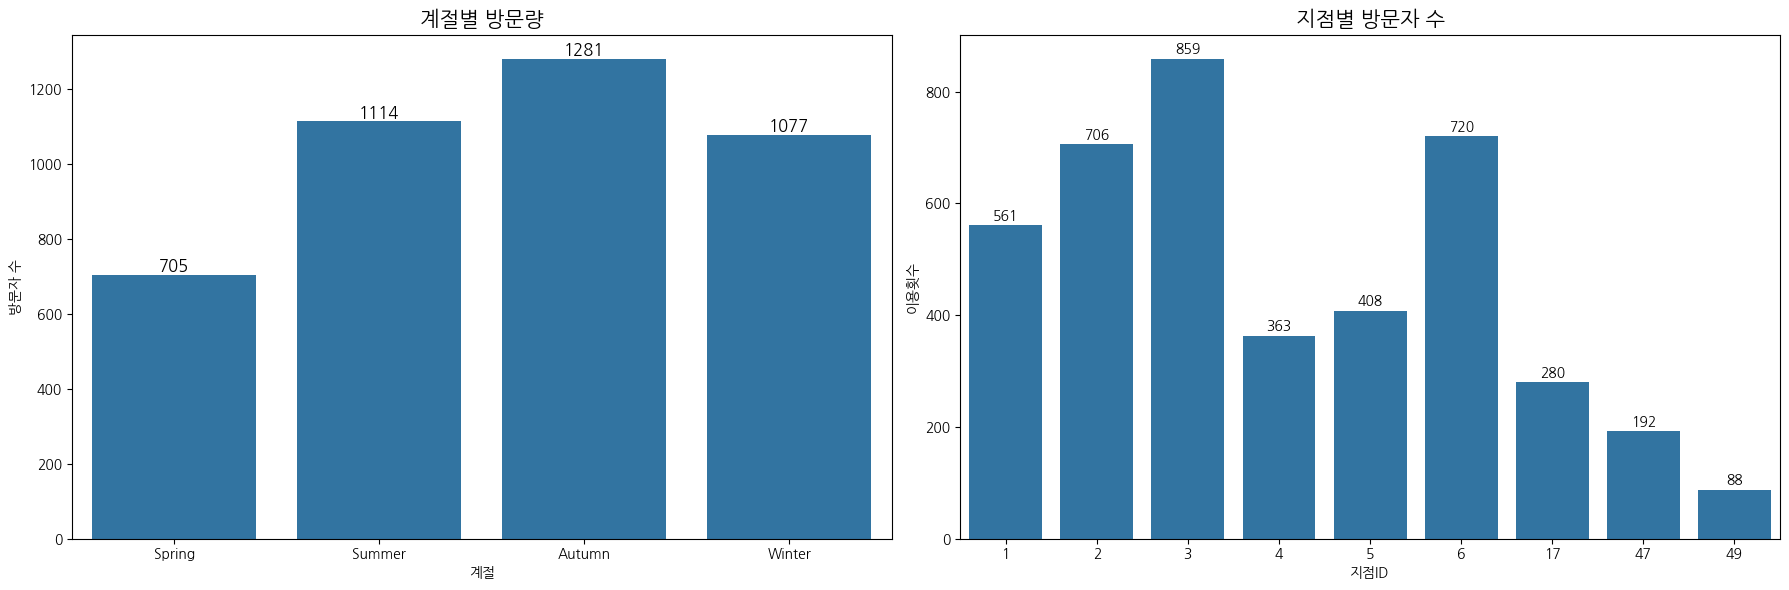


[계절별 방문자 수]
season
Spring     705
Summer    1114
Autumn    1281
Winter    1077
Name: count, dtype: int64


[지점별 방문자 수 Top 5]
first_site_id
3    859
6    720
2    706
1    561
5    408
Name: count, dtype: int64


In [ ]:
# day1_first를 날짜 형식으로 변환
final_master_dataset_noise1['visit_date'] = pd.to_datetime(final_master_dataset_noise1['day1_first'])

# 월 추출
final_master_dataset_noise1['month'] = final_master_dataset_noise1['visit_date'].dt.month

# 월을 기준으로 계절 매핑 함수 정의
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter' # 12, 1, 2월

# 계절 컬럼 생성
final_master_dataset_noise1['season'] = final_master_dataset_noise1['month'].apply(get_season)

# 데이터 집계
# 계절별 방문자 수
season_counts = final_master_dataset_noise1['season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter']) # 순서 고정

#지점별(Site ID) 방문자 수
site_counts = final_master_dataset_noise1['first_site_id'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(18, 6))

# [왼쪽 그래프] 계절별 방문자 수
plt.subplot(1, 2, 1)
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('계절별 방문량', fontsize=15)
plt.ylabel('방문자 수')
plt.xlabel('계절')
# 막대 위에 숫자 표시
for i, v in enumerate(season_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)

# [오른쪽 그래프] 지점별 방문자 수
plt.subplot(1, 2, 2)
sns.barplot(x=site_counts.index, y=site_counts.values)
plt.title('지점별 방문자 수', fontsize=15)
plt.ylabel('이용횟수')
plt.xlabel('지점ID')
# 막대 위에 숫자 표시
for i, v in enumerate(site_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 수치 데이터 출력 (표)
print("\n[계절별 방문자 수]")
print(season_counts)
print("\n" + "="*30)
print("\n[지점별 방문자 수 Top 5]")
print(site_counts.sort_values(ascending=False).head(5))

📍 지점 미변경(한 곳만 이용): 4055명 (97.1%)
🚀 지점 변경(여러 곳 이용): 122명 (2.9%)


/tmp/ipython-input-1172260914.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.index, y=conversion_rate.values, ax=axes[1], palette=['grey', 'coral'])
/tmp/ipython-input-1172260914.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['변경 안 함', '변경 함'])


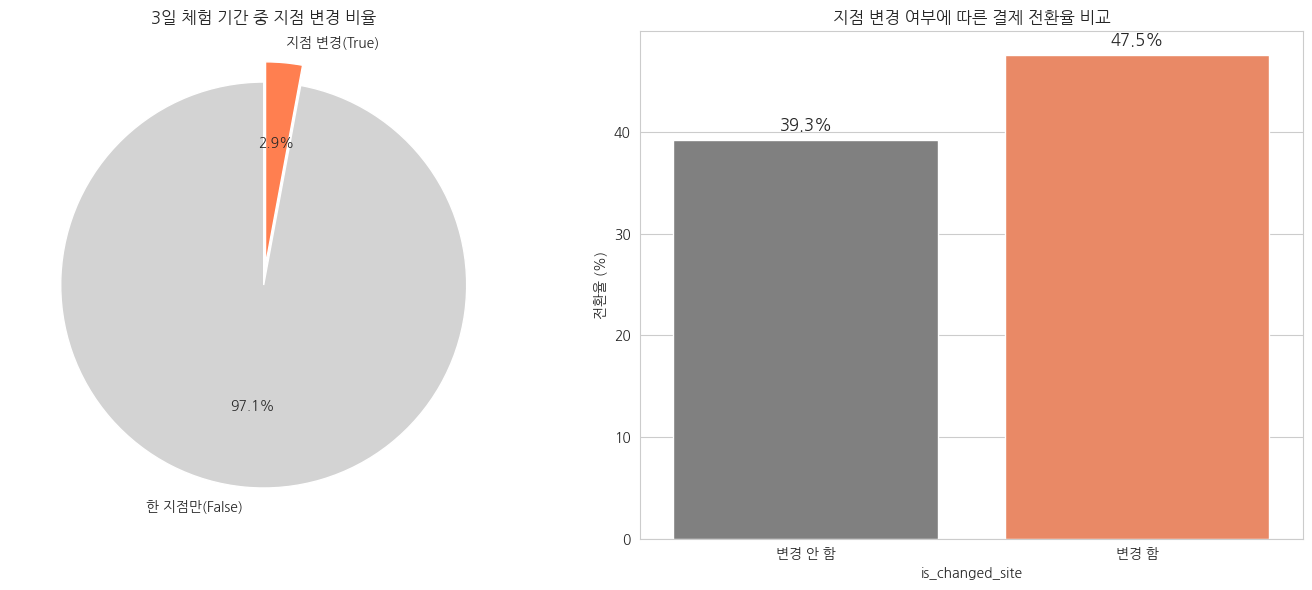

In [ ]:
# 기초 통계량 계산
change_counts = final_master_dataset_noise1['is_changed_site'].value_counts()
change_pct = final_master_dataset_noise1['is_changed_site'].value_counts(normalize=True) * 100

print(f" 지점 미변경(한 곳만 이용): {change_counts[False]}명 ({change_pct[False]:.1f}%)")
print(f" 지점 변경(여러 곳 이용): {change_counts[True]}명 ({change_pct[True]:.1f}%)")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# (1) 지점 변경 유저 비율 (Pie Chart)
axes[0].pie(change_counts, labels=['한 지점만(False)', '지점 변경(True)'], autopct='%1.1f%%',
            colors=['lightgray', 'coral'], startangle=90, explode=[0, 0.1])
axes[0].set_title('3일 체험 기간 중 지점 변경 비율')

# (2) 지점 변경 여부에 따른 결제 전환율 (Bar Chart)
# 결제 정보가 있다면 전환율 비교
if 'is_payment' in final_master_dataset_noise1.columns:
    conversion_rate = final_master_dataset_noise1.groupby('is_changed_site')['is_payment'].mean() * 100
    sns.barplot(x=conversion_rate.index, y=conversion_rate.values, ax=axes[1], palette=['grey', 'coral'])

    axes[1].set_title('지점 변경 여부에 따른 결제 전환율 비교')
    axes[1].set_ylabel('전환율 (%)')
    axes[1].set_xticklabels(['변경 안 함', '변경 함'])

    # 수치 표시
    for i, v in enumerate(conversion_rate.values):
        axes[1].text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

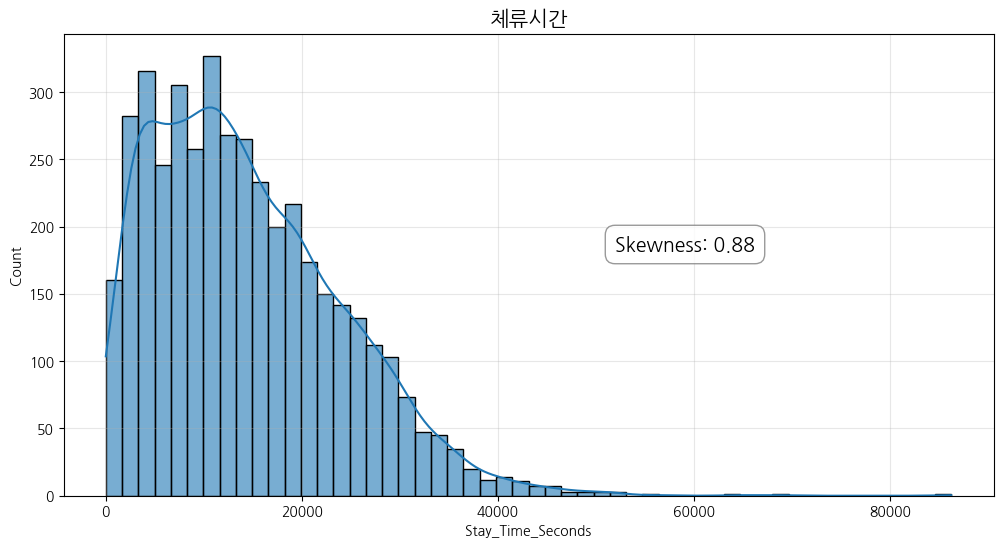


[체류시간(초) 요약 통계]
count     4177.000000
mean     14391.268853
std       9632.473693
min          9.000000
25%       6831.000000
50%      12865.000000
75%      20388.000000
max      86229.000000
Name: day1_stay_sec, dtype: float64


In [ ]:
# 시간 데이터 전처리 (초 단위로 변환)
def time_to_seconds(t_str):
    if pd.isna(t_str) or t_str == '00:00:00':
        return 0
    try:
        h, m, s = map(int, t_str.split(':'))
        return h * 3600 + m * 60 + s
    except:
        return 0

# 'day1_staytime'을 초(Seconds)로 변환
final_master_dataset_noise1['day1_stay_sec'] = final_master_dataset_noise1['day1_staytime'].apply(time_to_seconds)


plt.figure(figsize=(12, 6))

# sns.histplot: 데이터의 분포를 가장 잘 보여주는 그래프
# bins='auto': 데이터에 맞춰서 막대 개수를 자동으로 조절 (또는 숫자를 넣어서 조절 가능, 예: bins=100)
# kde=True: 부드러운 곡선을 추가해서 흐름을 보여줌
sns.histplot(data=final_master_dataset_noise1, x='day1_stay_sec', kde=True, alpha=0.6)

plt.title('체류시간', fontsize=15)
plt.xlabel('Stay_Time_Seconds')
plt.ylabel('Count')

# x축 범위를 데이터에 맞춰서 좀 더 타이트하게 잡고 싶으면 아래 주석을 푸세요
# plt.xlim(0, df['day1_stay_sec'].max())
# 왜도(Skewness) 계산
# pandas의 .skew() 함수로 간단하게 계산 가능합니다.
skew_val = final_master_dataset_noise1['day1_stay_sec'].skew()
plt.text(x=0.5, y=0.5,
         s=f'Skewness: {skew_val:.2f}',
         transform=ax.transAxes,
         fontsize=14,
         fontweight='bold',
         color='black',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'))
plt.grid(True, alpha=0.3)
plt.show()

# 통계치 확인
print("\n[체류시간(초) 요약 통계]")
print(final_master_dataset_noise1['day1_stay_sec'].describe())

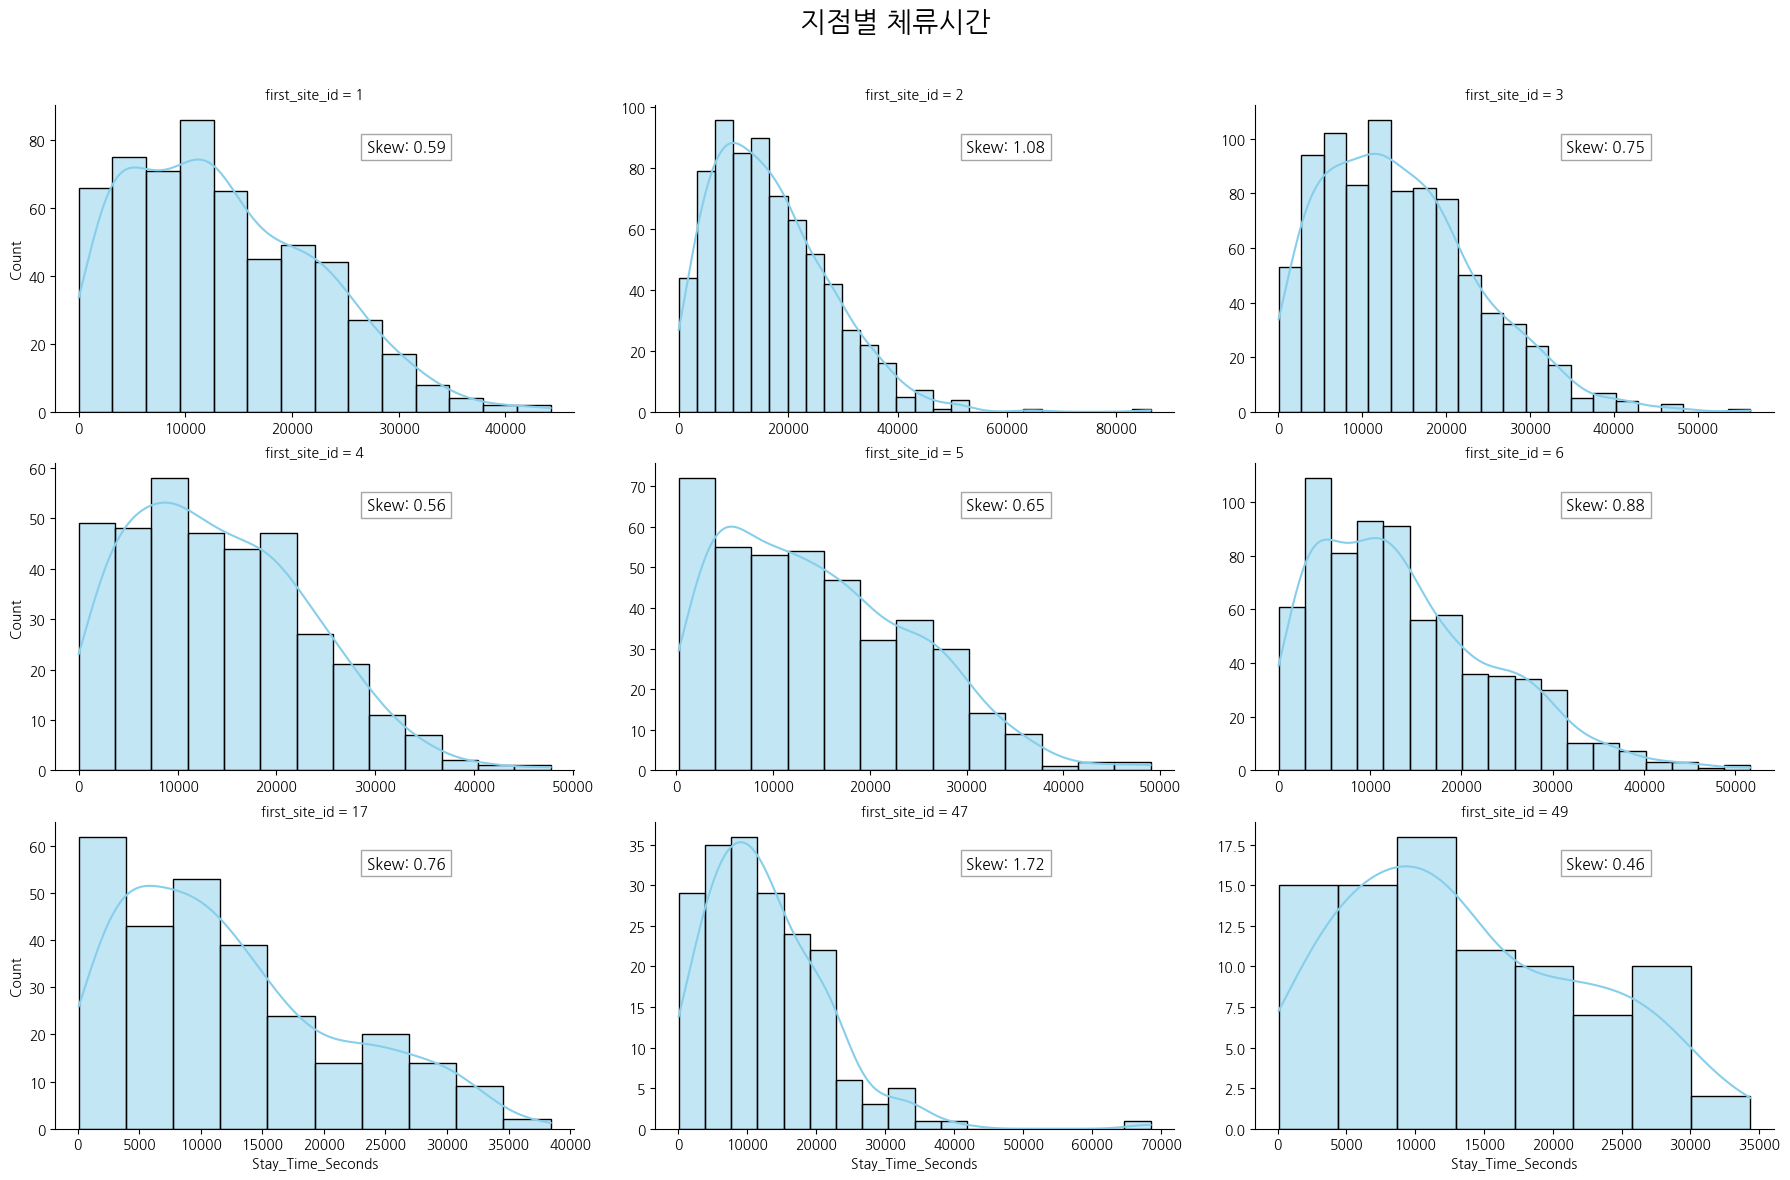

In [ ]:

# 데이터 필터링 (
top_sites = final_master_dataset_noise1['first_site_id'].value_counts().nlargest(9).index
df_top = final_master_dataset_noise1[final_master_dataset_noise1['first_site_id'].isin(top_sites)]

# 왜도 표시를 위한 사용자 정의 함수
def annotate_skewness(x, **kwargs):
    ax = plt.gca() # 현재 그려지고 있는 그래프 축 가져오기
    if len(x) > 0:
        skew_val = x.skew()
        # 그래프 우측 상단에 텍스트 넣기
        ax.text(0.6, 0.85, f'Skew: {skew_val:.2f}', transform=ax.transAxes,
                fontsize=11, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

# FacetGrid 그리기
g = sns.FacetGrid(df_top, col="first_site_id", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# (1) 히스토그램 + KDE 곡선 그리기
g.map(sns.histplot, "day1_stay_sec", kde=True, color='skyblue')

# (2) 왜도 텍스트 추가하기
g.map(annotate_skewness, "day1_stay_sec")

# 전체 제목 및 라벨 설정
g.set_axis_labels("Stay_Time_Seconds", "Count")
g.fig.subplots_adjust(top=0.9) # 제목 들어갈 공간 확보
g.fig.suptitle('지점별 체류시간', fontsize=20, fontweight='bold')

plt.show()

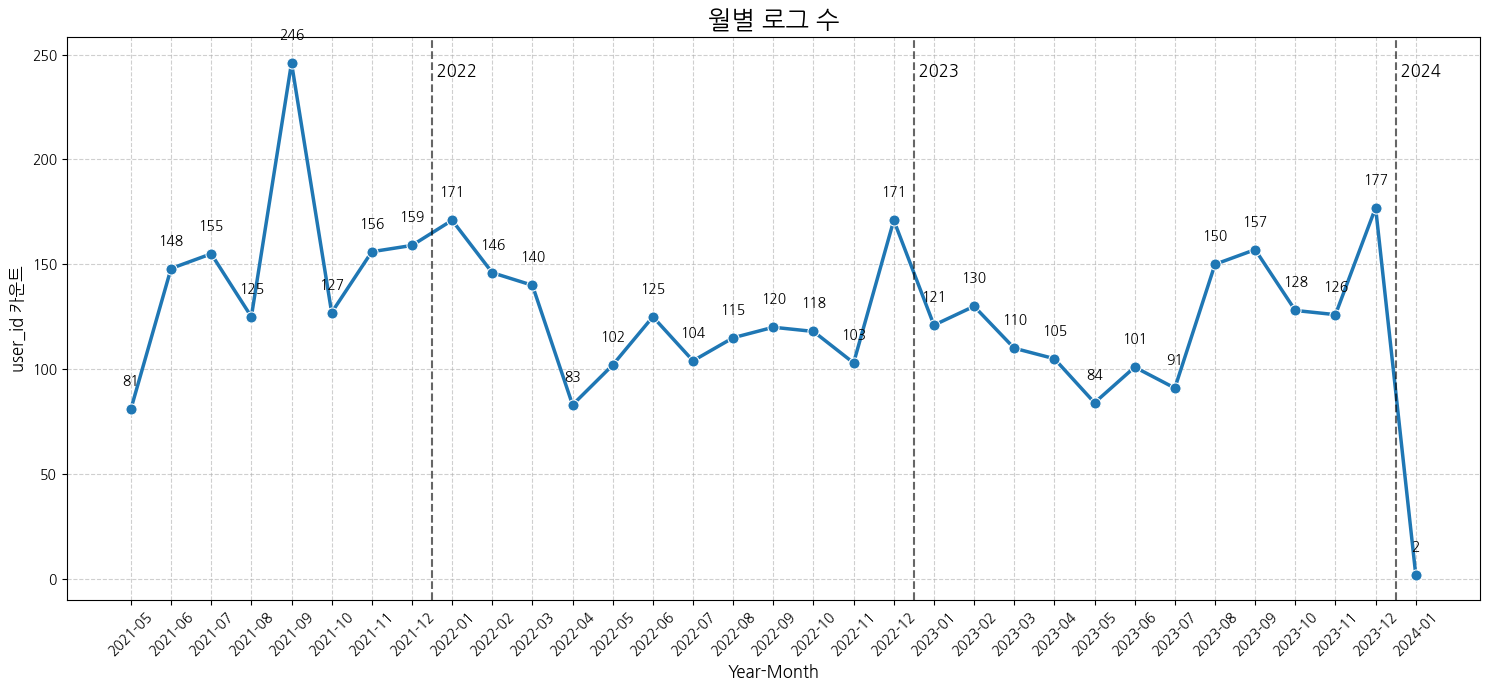


[연-월별 방문자 수]
year_month
2021-05     81
2021-06    148
2021-07    155
2021-08    125
2021-09    246
2021-10    127
2021-11    156
2021-12    159
2022-01    171
2022-02    146
2022-03    140
2022-04     83
2022-05    102
2022-06    125
2022-07    104
2022-08    115
2022-09    120
2022-10    118
2022-11    103
2022-12    171
2023-01    121
2023-02    130
2023-03    110
2023-04    105
2023-05     84
2023-06    101
2023-07     91
2023-08    150
2023-09    157
2023-10    128
2023-11    126
2023-12    177
2024-01      2
dtype: int64


In [ ]:
# 날짜 데이터 전처리
# 'day1_first' 컬럼을 날짜 형식(datetime)으로 변환합니다.
final_master_dataset_noise1['visit_date'] = pd.to_datetime(final_master_dataset_noise1['day1_first'])

# 1900년 같은 이상한 날짜가 섞여 있을 경우를 대비해 2000년 이후 데이터만
final_master_dataset_noise1 = final_master_dataset_noise1[final_master_dataset_noise1['visit_date'].dt.year > 2000]

# . '연-월' 컬럼 생성
final_master_dataset_noise1['year_month'] = final_master_dataset_noise1['visit_date'].dt.strftime('%Y-%m')

# 4. 데이터 집계 (월별 방문자 수 카운트)
monthly_counts = final_master_dataset_noise1.groupby('year_month').size().sort_index()


plt.figure(figsize=(15, 7))

# 선 그래프 그리기 (marker='o' : 데이터 위치에 동그라미 표시)
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values,
             marker='o',  linewidth=2.5, markersize=8)

plt.title('월별 로그 수', fontsize=18)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('user_id 카운트', fontsize=12)

# 연도 구분선 긋기
# X축 라벨(날짜 문자열)을 하나씩 확인하면서, '01월'인 지점을 찾습니다.
for i, date_str in enumerate(monthly_counts.index):
    if date_str.endswith('-01'): # 예: '2022-01' 처럼 1월로 끝나는 경우
        # x좌표 i에서 0.5를 뺀 위치(이전 달과 1월 사이)에 선을 긋습니다.
        plt.axvline(x=i - 0.5, color='black', linestyle='--', alpha=0.6)

        # 선 옆에 '202X년' 이라고 글씨도 써줍니다.
        year_label = date_str.split('-')[0] # '2022' 추출
        plt.text(x=i - 0.5, y=monthly_counts.max(), s=f' {year_label} ',
                 color='black', fontsize=12, fontweight='bold', ha='left', va='top')

# X축 라벨이 겹치지 않게 45도 회전
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# 각 점 위에 숫자 표시 (데이터 라벨링)
for x, y in zip(monthly_counts.index, monthly_counts.values):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 표로 데이터 확인
print("\n[연-월별 방문자 수]")
print(monthly_counts)

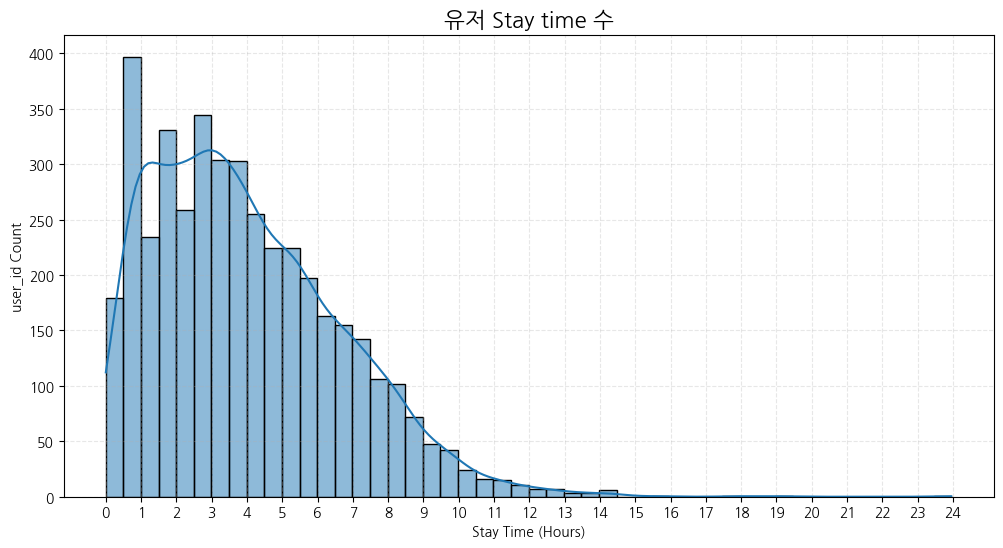


[시간 단위 체류시간 통계]
count    4177.00
mean        4.00
std         2.68
min         0.00
25%         1.90
50%         3.57
75%         5.66
max        23.95
Name: day1_stay_hour, dtype: float64


In [ ]:
# 시간 데이터 전처리 (시간 단위로 변환)
# 초(Seconds)로 바꾼 뒤 3600으로 나누어 '시간(Hours)' 실수형을 만듭니다.
def time_to_hours(t_str):
    if pd.isna(t_str) or t_str == '00:00:00':
        return 0
    try:
        h, m, s = map(int, t_str.split(':'))
        return h + (m / 60) + (s / 3600)
    except:
        return 0

final_master_dataset_noise1['day1_stay_hour'] = final_master_dataset_noise1['day1_staytime'].apply(time_to_hours)

# 왜도(Skewness) 계산
skew_val = final_master_dataset_noise1['day1_stay_hour'].skew()

# 히스토그램 그리기 (X축이 시간 단위)
plt.figure(figsize=(12, 6))

# binwidth=0.5 : 막대 하나를 '30분(0.5시간)' 간격으로 설정 (조절 가능)
ax = sns.histplot(data=final_master_dataset_noise1, x='day1_stay_hour', kde=True,
                  binwidth=0.5)

plt.title('유저 Stay time 수', fontsize=16)
plt.xlabel('Stay Time (Hours)') # X축 라벨 변경
plt.ylabel('user_id Count')

#  X축 눈금 설정 (0, 1, 2, 3... 시간 단위로 딱 떨어지게)
# 데이터의 최대 시간까지 1시간 간격으로 눈금을 찍습니다.
max_hour = int(df['day1_stay_hour'].max())
plt.xticks(range(0, max_hour + 2, 1))


plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 요약 통계 출력
print("\n[시간 단위 체류시간 통계]")
print(final_master_dataset_noise1['day1_stay_hour'].describe().round(2))

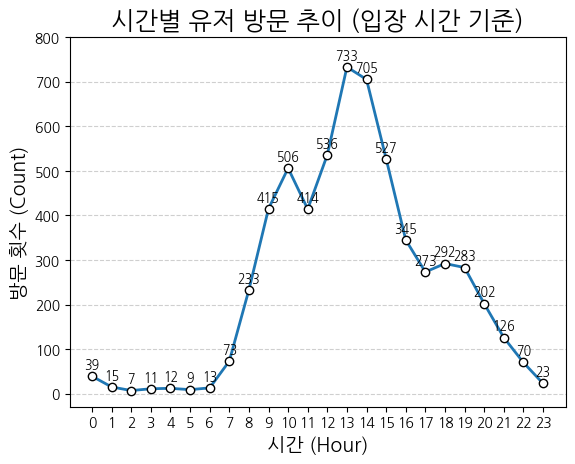

In [ ]:
# 입장 시간 데이터 통합
# 'day1_first', 'day2_first', 'day3_first' 열을 하나의 긴 시리즈로 통합합니다.
entry_times_raw = pd.concat([final_master_dataset_noise1['day1_first'], final_master_dataset_noise1['day2_first'], df['day3_first']])

# 유효한 시간 데이터만 추출 (1900-01-01은 방문이 없는 경우이므로 제외)
valid_times = entry_times_raw[entry_times_raw != '1900-01-01 00:00:00.000000']

# 시간대별 집계를 위해 datetime 형식으로 변환하고 '시간(Hour)' 추출
valid_times_dt = pd.to_datetime(valid_times)
hourly_data = valid_times_dt.dt.hour.value_counts().sort_index().reset_index()
hourly_data.columns = ['입장_시간', '방문_횟수']

# 시각화
# 모든 24시간을 포함하도록 0부터 23까지의 시간대 생성
all_hours = pd.DataFrame({'입장_시간': range(24)})
# 집계된 데이터와 병합 (방문이 없는 시간대는 0으로 채움)
hourly_visits = pd.merge(all_hours, hourly_data, on='입장_시간', how='left').fillna(0)
hourly_visits['방문_횟수'] = hourly_visits['방문_횟수'].astype(int)

# 라인 플롯 생성
plt.plot(
    hourly_visits['입장_시간'],
    hourly_visits['방문_횟수'],
    marker='o',
    linestyle='-',
    color='#1f77b4',
    linewidth=2,
    markeredgecolor='black',
    markerfacecolor='white',
    markersize=6
)

# 데이터 레이블 추가
for x, y in zip(hourly_visits['입장_시간'], hourly_visits['방문_횟수']):
    # 방문 횟수가 0이 아닌 경우에만 레이블 표시
    if y > 0:
        plt.text(x, y + (hourly_visits['방문_횟수'].max() * 0.015),
                 str(y),
                 ha='center',
                 va='bottom',
                 fontsize=9,
                 weight='bold',
                 color='black')

# 제목 및 축 레이블 설정
plt.title('시간별 유저 방문 추이 (입장 시간 기준)', fontsize=18, weight='bold')
plt.xlabel('시간 (Hour)', fontsize=14)
plt.ylabel('방문 횟수 (Count)', fontsize=14)

# X축 눈금 설정 (0시부터 23시까지 모두 표시)
plt.xticks(range(24))

# Y축 눈금 설정
max_count = hourly_visits['방문_횟수'].max()
plt.yticks(range(0, max_count + 100, 100))
# Y축 그리드 설정
plt.grid(axis='y', linestyle='--', alpha=0.6)

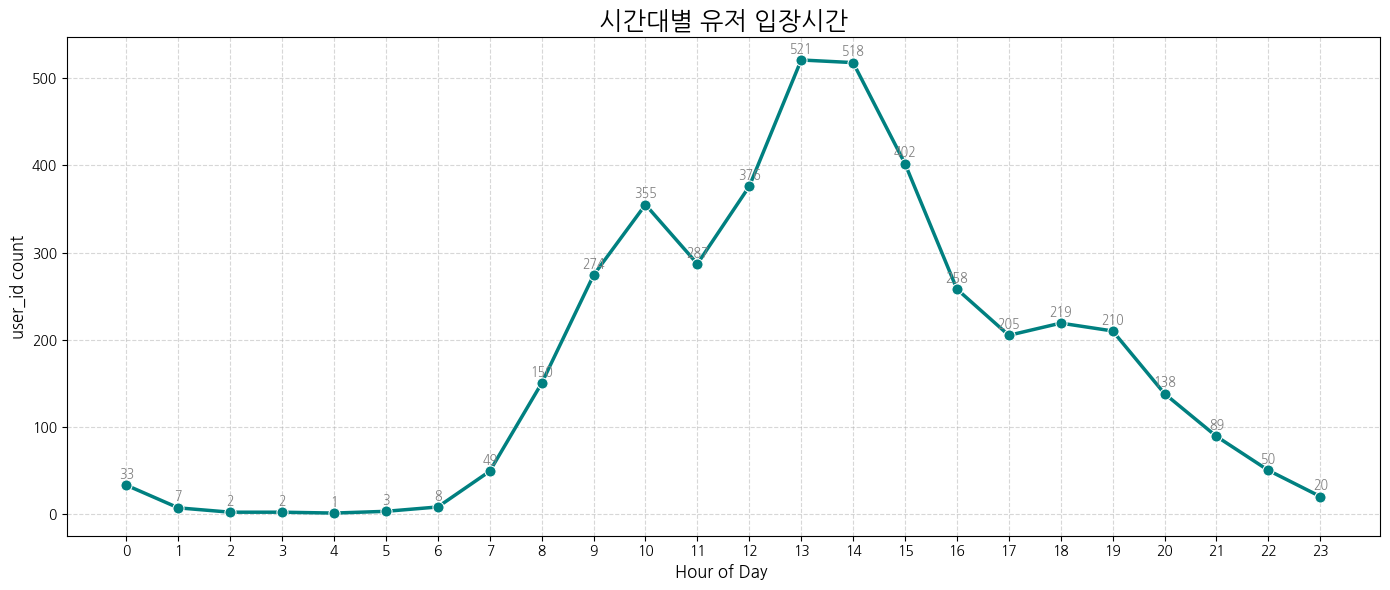


[시간대별 입장 인원 Top 5]
exit_hour
13    521
14    518
15    402
12    376
10    355
Name: count, dtype: int64


In [ ]:
# 시간 데이터 전처리
# day1_last(마지막 접속 시간)를 날짜 형식으로 변환
final_master_dataset_noise1['first_time'] = pd.to_datetime(final_master_dataset_noise1['day1_first'])

# 1900년 데이터(방문 기록 없음) 제거 (유효한 방문만 분석)
final_master_dataset_noise1 = final_master_dataset_noise1[final_master_dataset_noise1['first_time'].dt.year > 2000]

# '시(Hour)' 정보만 추출 (0 ~ 23)
final_master_dataset_noise1['exit_hour'] = final_master_dataset_noise1['first_time'].dt.hour

# 데이터 집계 (시간대별 퇴장 인원 카운트)
hourly_counts = final_master_dataset_noise1['exit_hour'].value_counts().sort_index()


plt.figure(figsize=(14, 6))

# (1) 꺾은선 그래프 그리기 (흐름을 보여주기 위함)
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values,
             marker='o', markersize=8, linewidth=2.5, color='teal')

# (2) 그래프 꾸미기
plt.title('시간대별 유저 입장시간', fontsize=18)
plt.xlabel('Hour of Day ', fontsize=12)
plt.ylabel('user_id count', fontsize=12)

# X축 눈금을 0시부터 23시까지 모두 표시
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

# (3) [핵심] 가장 퇴장이 많은 시간(Peak Time) 강조하기
peak_hour = hourly_counts.idxmax()      # 가장 카운트가 높은 시간
peak_count = hourly_counts.max()        # 그때의 인원 수

# # Peak 지점에 빨간색 점 찍기
# plt.plot(peak_hour, peak_count, marker='o', color='red', markersize=12, alpha=0.7)

# # Peak 지점에 텍스트 달기 (화살표 포함)
# plt.annotate(f'Peak: {peak_hour}h ({peak_count} users)',
#              xy=(peak_hour, peak_count),
#              xytext=(peak_hour, peak_count + 50),
#              arrowprops=dict(facecolor='red', shrink=0.05),
#              fontsize=12, fontweight='bold', color='red', ha='center')

# 나머지 점들 위에도 작게 숫자 표시
for x, y in zip(hourly_counts.index, hourly_counts.values):
    #if x != peak_hour: # 피크 타임은 이미 크게 표시했으므로 제외
        plt.text(x, y + 5, str(y), ha='center', va='bottom', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

# 5. 표로 데이터 확인
print("\n[시간대별 입장 인원 Top 5]")
print(hourly_counts.sort_values(ascending=False).head(5))

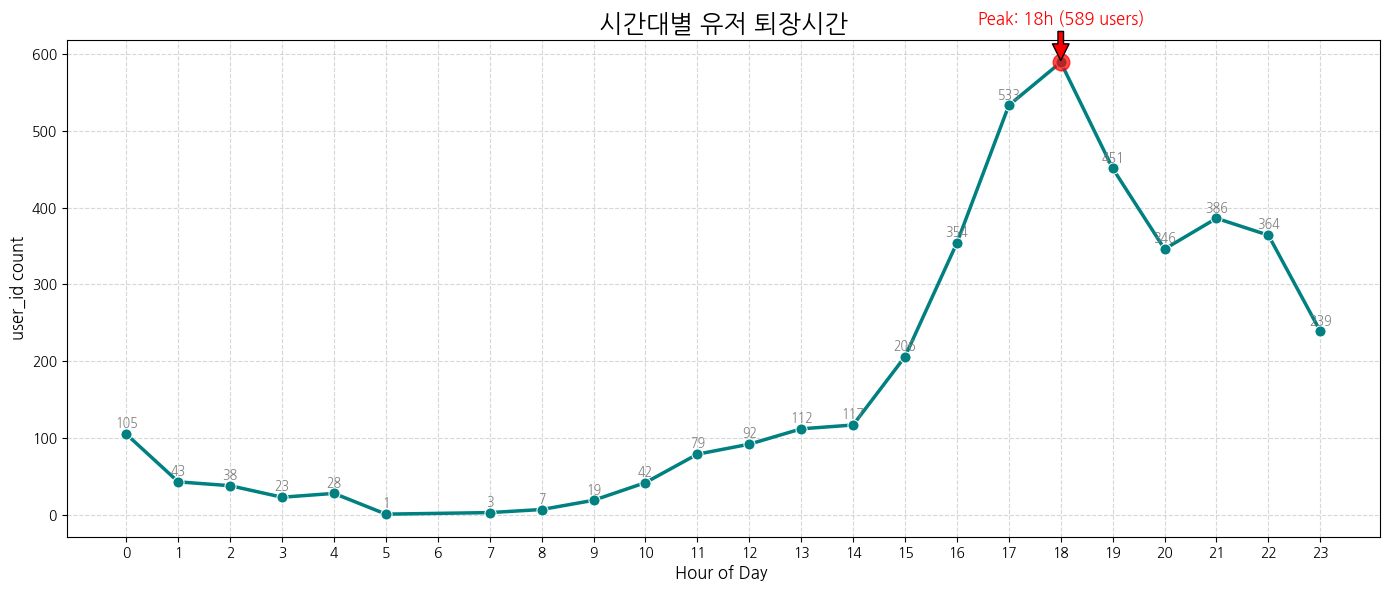


[시간대별 퇴장 인원 Top 5]
exit_hour
18    589
17    533
19    451
21    386
22    364
Name: count, dtype: int64


In [ ]:
# 시간 데이터 전처리
# day1_last(마지막 접속 시간)를 날짜 형식으로 변환
final_master_dataset_noise1['last_time'] = pd.to_datetime(final_master_dataset_noise1['day1_last'])

# 1900년 데이터(방문 기록 없음) 제거 (유효한 방문만 분석)
final_master_dataset_noise1 = final_master_dataset_noise1[final_master_dataset_noise1['last_time'].dt.year > 2000]

# '시(Hour)' 정보만 추출 (0 ~ 23)
final_master_dataset_noise1['exit_hour'] = final_master_dataset_noise1['last_time'].dt.hour

# 데이터 집계 (시간대별 퇴장 인원 카운트)
hourly_counts = final_master_dataset_noise1['exit_hour'].value_counts().sort_index()


plt.figure(figsize=(14, 6))

# (1) 꺾은선 그래프 그리기 (흐름을 보여주기 위함)
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values,
             marker='o', markersize=8, linewidth=2.5, color='teal')

# (2) 그래프 꾸미기
plt.title('시간대별 유저 퇴장시간', fontsize=18)
plt.xlabel('Hour of Day ', fontsize=12)
plt.ylabel('user_id count', fontsize=12)

# X축 눈금을 0시부터 23시까지 모두 표시
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

# (3) [핵심] 가장 퇴장이 많은 시간(Peak Time) 강조하기
peak_hour = hourly_counts.idxmax()      # 가장 카운트가 높은 시간
peak_count = hourly_counts.max()        # 그때의 인원 수

# Peak 지점에 빨간색 점 찍기
plt.plot(peak_hour, peak_count, marker='o', color='red', markersize=12, alpha=0.7)

# Peak 지점에 텍스트 달기 (화살표 포함)
plt.annotate(f'Peak: {peak_hour}h ({peak_count} users)',
             xy=(peak_hour, peak_count),
             xytext=(peak_hour, peak_count + 50),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, fontweight='bold', color='red', ha='center')

# 나머지 점들 위에도 작게 숫자 표시
for x, y in zip(hourly_counts.index, hourly_counts.values):
    if x != peak_hour: # 피크 타임은 이미 크게 표시했으므로 제외
        plt.text(x, y + 5, str(y), ha='center', va='bottom', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

# 표로 데이터 확인
print("\n[시간대별 퇴장 인원 Top 5]")
print(hourly_counts.sort_values(ascending=False).head(5))

###Ⅷ 마스터 테이블 노이즈 없는 버전

In [ ]:
final_master_dataset_noisedel= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀 프로젝트 3/final_master_dataset(noisedel).csv')
final_master_dataset_noisedel

user_uuid  first_site_id  \
0     000590dc-046f-462b-8225-4c81a97b7166              6   
1     000be14f-ba0f-4af6-bc2c-7b00dfcbc98c              3   
2     002606d9-38ca-48f3-910c-cbfada9a9109             17   
3     002a7570-90dd-4cab-b0aa-b0e40f7ef27a              5   
4     003e68d8-5f45-4549-b00d-3da0a10833ae              6   
...                                    ...            ...   
3681  ffb73a8f-3496-4268-84f1-b3bc2dc08d8c              6   
3682  ffb82bb5-0183-48f0-984e-0b69b2f12c6f              3   
3683  ffcb7950-d150-40ae-a6bf-f85f5c2b9702              2   
3684  ffce32ca-2efc-4485-b685-4b65811c2dcf              4   
3685  ffd287bc-2797-4788-82fa-6268c82e7fa9              6   

                      day1_first                   day1_last day1_staytime  \
0     2023-09-05 11:57:01.695334  2023-09-05 17:59:45.973499      05:56:57   
1     2021-09-30 16:31:14.861813  2021-09-30 20:25:41.850542      02:50:22   
2     2023-01-07 17:25:54.781175  2023-01-07 20:59:26.023706      03:31:29   
3     2021-09-08 16:37:24.456986  2021-09-08 22:25:10.197658      05:12:02   
4     2022-11-02 15:24:38.136761  2022-11-02 16:29:05.139665      01:04:27   
...                          ...                         ...           ...   
3681  2021-12-05 14:52:49.807813  2021-12-05 16:56:08.637719      02:03:18   
3682  2023-09-06 13:28:33.474752  2023-09-06 18:20:06.583092      04:47:12   
3683  2022-04-26 13:51:12.763210  2022-04-26 18:06:31.661452      04:12:34   
3684  2023-11-02 00:31:57.590241  2023-11-02 02:49:23.113461      02:17:25   
3685  2023-04-07 15:19:53.092779  2023-04-07 18:09:40.896455      02:41:12   

      day1_visit_cnt  day1_attended                  day2_first  \
0                  3              1  1900-01-01 00:00:00.000000   
1                  7              1  2021-10-01 19:30:20.894398   
2                  2              1  2023-01-08 15:57:20.084255   
3                  5              1  1900-01-01 00:00:00.000000   
4                  1              1  1900-01-01 00:00:00.000000   
...              ...            ...                         ...   
3681               1              1  1900-01-01 00:00:00.000000   
3682               2              1  1900-01-01 00:00:00.000000   
3683               2              1  2022-04-27 14:01:49.040076   
3684               1              1  2023-11-02 12:09:21.078294   
3685               4              1  2023-04-08 15:26:33.087593   

                       day2_last day2_staytime  day2_visit_cnt  day2_attended  \
0     1900-01-01 00:00:00.000000      00:00:00               0              0   
1     2021-10-01 22:08:58.909740      02:36:22               2              1   
2     2023-01-08 19:24:54.056668      03:25:34               2              1   
3     1900-01-01 00:00:00.000000      00:00:00               0              0   
4     1900-01-01 00:00:00.000000      00:00:00               0              0   
...                          ...           ...             ...            ...   
3681  1900-01-01 00:00:00.000000      00:00:00               0              0   
3682  1900-01-01 00:00:00.000000      00:00:00               0              0   
3683  2022-04-27 18:10:32.176612      04:00:59               3              1   
3684  2023-11-02 12:12:45.944963      00:03:24               1              1   
3685  2023-04-08 22:52:31.912488      06:35:03               6              1   

                      day3_first                   day3_last day3_staytime  \
0     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
1     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
2     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
3     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
4     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
...                          ...                         ...           ...   
3681  1900-01-01 00:00:00.000000  1900-

In [ ]:
final_master_dataset_noisedel.isnull().count()

user_uuid          3686
first_site_id      3686
day1_first         3686
day1_last          3686
day1_staytime      3686
day1_visit_cnt     3686
day1_attended      3686
day2_first         3686
day2_last          3686
day2_staytime      3686
day2_visit_cnt     3686
day2_attended      3686
day3_first         3686
day3_last          3686
day3_staytime      3686
day3_visit_cnt     3686
day3_attended      3686
is_changed_site    3686
is_payment         3686
dtype: int64

In [ ]:
final_master_dataset_noisedel1 = final_master_dataset_noisedel.copy()

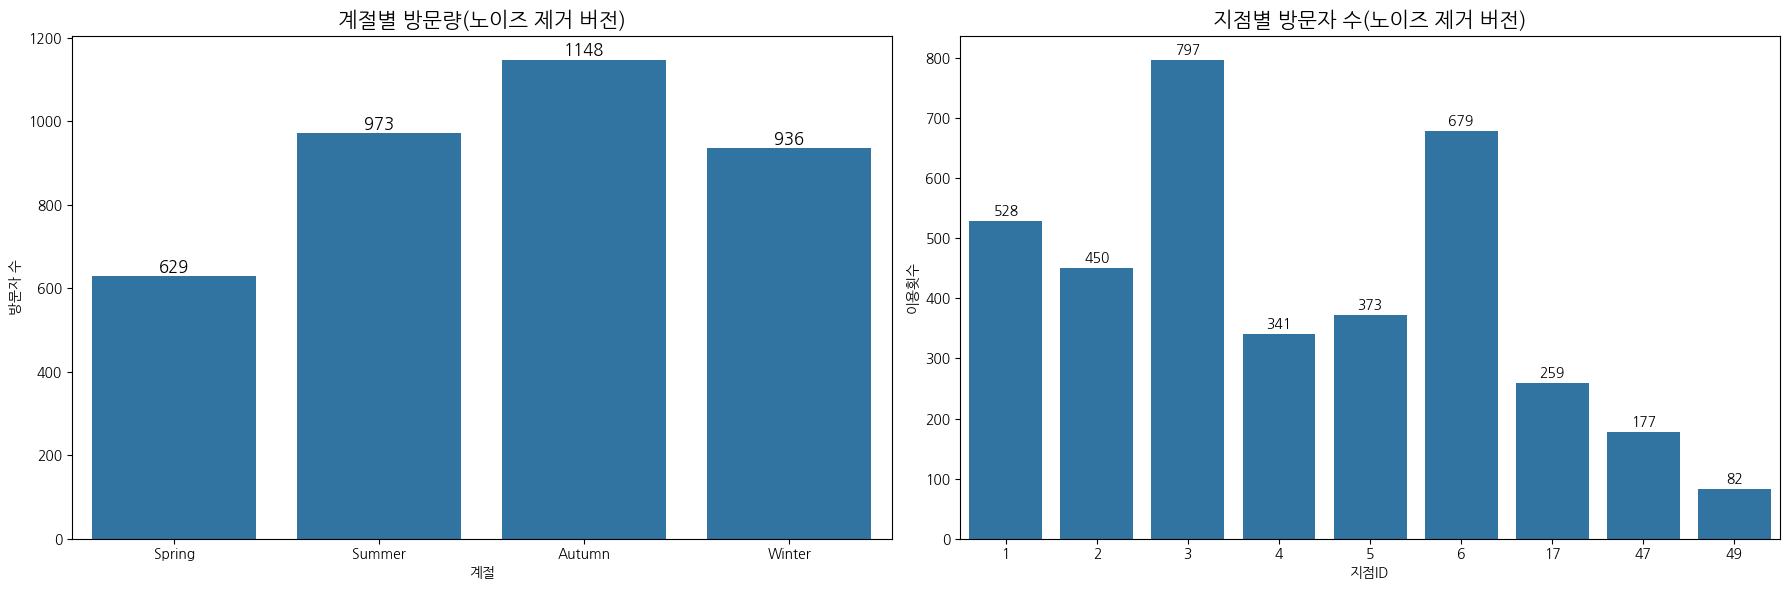


[계절별 방문자 수]
season
Spring     629
Summer     973
Autumn    1148
Winter     936
Name: count, dtype: int64


[지점별 방문자 수 Top 5]
first_site_id
3    797
6    679
1    528
2    450
5    373
Name: count, dtype: int64


In [ ]:
# 날짜 데이터 전처리 및 계절 분류
# day1_first를 날짜 형식으로 변환
final_master_dataset_noisedel1['visit_date'] = pd.to_datetime(final_master_dataset_noisedel1['day1_first'])

# 월(Month) 추출
final_master_dataset_noisedel1['month'] = final_master_dataset_noisedel1['visit_date'].dt.month

# 월을 기준으로 계절 매핑 함수 정의
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter' # 12, 1, 2월

# 계절 컬럼 생성
final_master_dataset_noisedel1['season'] = final_master_dataset_noisedel1['month'].apply(get_season)

# 데이터 집계
# (1) 계절별 방문자 수
season_counts = final_master_dataset_noisedel1['season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter']) # 순서 고정

# (2) 지점별(Site ID) 방문자 수 (상위 10개만 시각화하거나 전체를 볼 수 있음)
site_counts = final_master_dataset_noisedel1['first_site_id'].value_counts().sort_index()


plt.figure(figsize=(18, 6))

# [왼쪽 그래프] 계절별 방문자 수
plt.subplot(1, 2, 1)
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('계절별 방문량(노이즈 제거 버전)', fontsize=15)
plt.ylabel('방문자 수')
plt.xlabel('계절')
# 막대 위에 숫자 표시
for i, v in enumerate(season_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)

# [오른쪽 그래프] 지점별 방문자 수
plt.subplot(1, 2, 2)
sns.barplot(x=site_counts.index, y=site_counts.values)
plt.title('지점별 방문자 수(노이즈 제거 버전)', fontsize=15)
plt.ylabel('이용횟수')
plt.xlabel('지점ID')
# 막대 위에 숫자 표시
for i, v in enumerate(site_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 수치 데이터 출력 (표)
print("\n[계절별 방문자 수]")
print(season_counts)
print("\n" + "="*30)
print("\n[지점별 방문자 수 Top 5]")
print(site_counts.sort_values(ascending=False).head(5))

📍 지점 미변경(한 곳만 이용): 3582명 (97.2%)
🚀 지점 변경(여러 곳 이용): 104명 (2.8%)


/tmp/ipython-input-3991822909.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.index, y=conversion_rate.values, ax=axes[1], palette=['grey', 'coral'])
/tmp/ipython-input-3991822909.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['변경 안 함', '변경 함'])


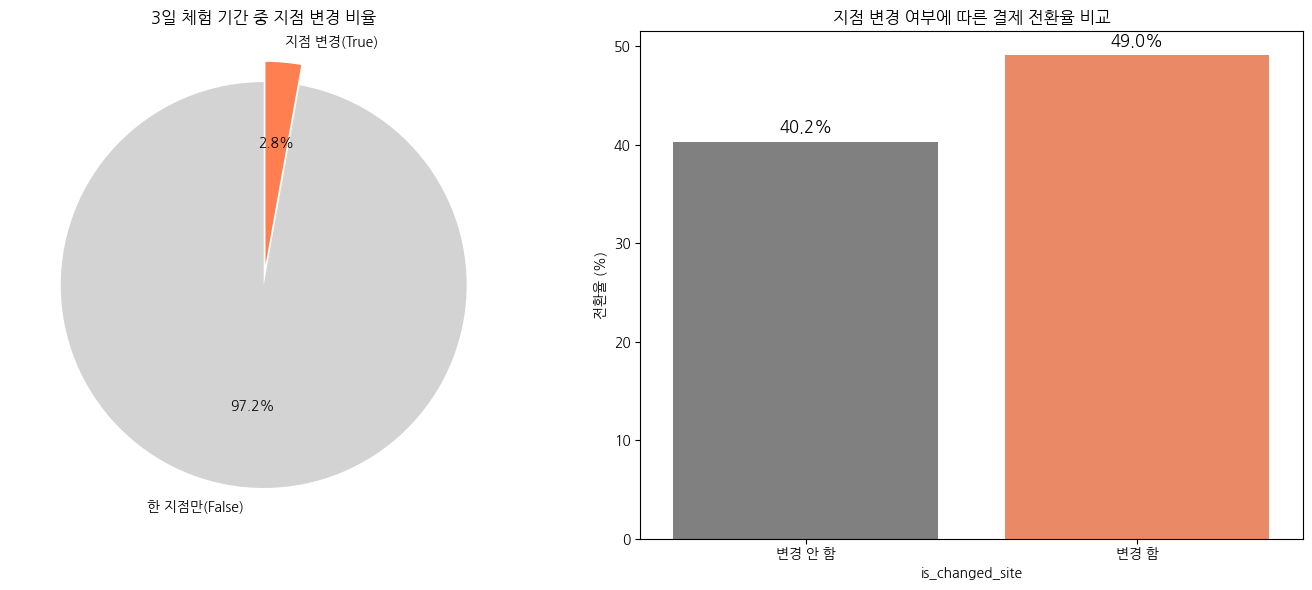

In [ ]:
# 기초 통계량 계산
change_counts = final_master_dataset_noisedel1['is_changed_site'].value_counts()
change_pct = final_master_dataset_noisedel1['is_changed_site'].value_counts(normalize=True) * 100

print(f" 지점 미변경(한 곳만 이용): {change_counts[False]}명 ({change_pct[False]:.1f}%)")
print(f" 지점 변경(여러 곳 이용): {change_counts[True]}명 ({change_pct[True]:.1f}%)")

# 3. 시각화 (비율 파이차트 & 전환율 막대그래프)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# (1) 지점 변경 유저 비율 (Pie Chart)
axes[0].pie(change_counts, labels=['한 지점만(False)', '지점 변경(True)'], autopct='%1.1f%%',
            colors=['lightgray', 'coral'], startangle=90, explode=[0, 0.1])
axes[0].set_title('3일 체험 기간 중 지점 변경 비율')

# (2) 지점 변경 여부에 따른 결제 전환율 (Bar Chart)
# 결제 정보가 있다면 전환율 비교
if 'is_payment' in final_master_dataset_noisedel1.columns:
    conversion_rate = final_master_dataset_noisedel1.groupby('is_changed_site')['is_payment'].mean() * 100
    sns.barplot(x=conversion_rate.index, y=conversion_rate.values, ax=axes[1], palette=['grey', 'coral'])

    axes[1].set_title('지점 변경 여부에 따른 결제 전환율 비교')
    axes[1].set_ylabel('전환율 (%)')
    axes[1].set_xticklabels(['변경 안 함', '변경 함'])

    # 수치 표시
    for i, v in enumerate(conversion_rate.values):
        axes[1].text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

 분석 대상(지점 변경을 한 결제 유저) 수: 51명
 이들의 평균 체류 시간: 7.2시간


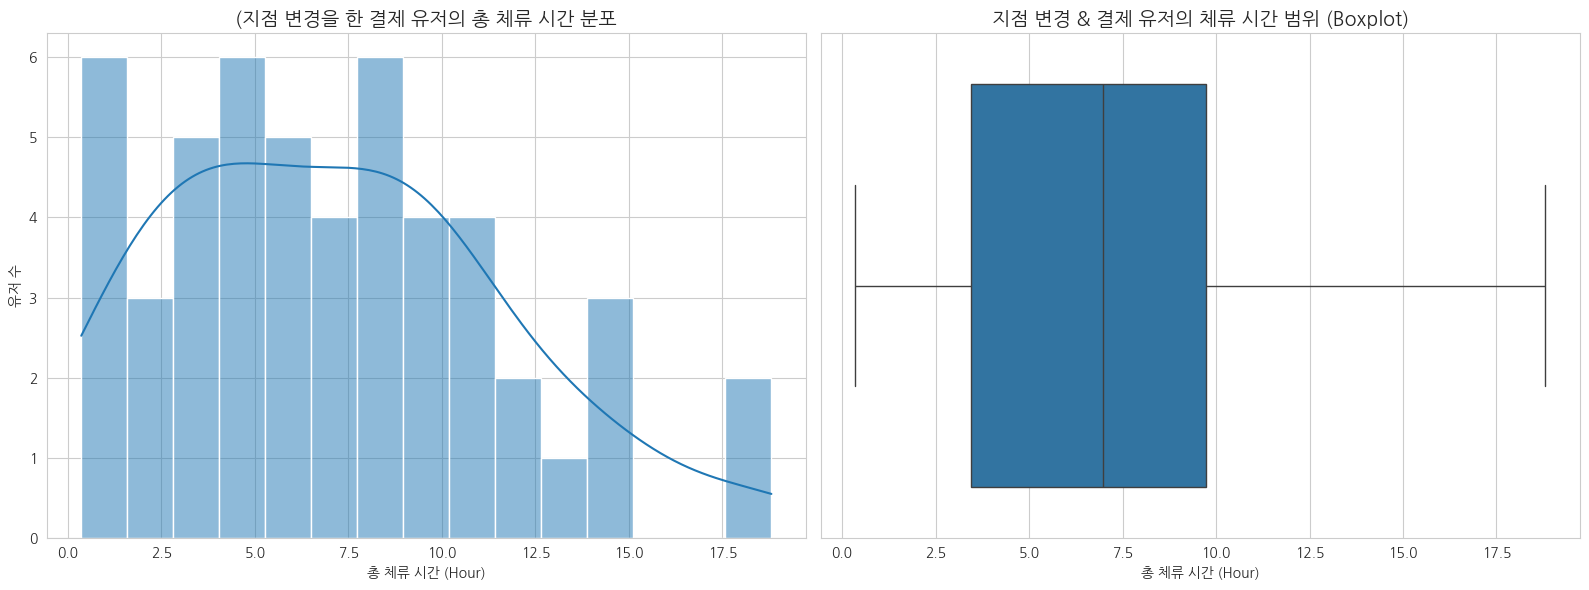


--- 상세 통계량 ---
count    51.000000
mean      7.154635
std       4.526030
min       0.356944
25%       3.441250
50%       6.966667
75%       9.732500
max      18.810556
Name: total_stay_hours, dtype: float64


In [ ]:
# [Step 2] 전처리: 체류시간 문자열 -> 시간(Timedelta) 변환 및 총 시간(Hour) 계산
time_cols = ['day1_staytime', 'day2_staytime', 'day3_staytime']
for col in time_cols:
    final_master_dataset_noisedel1[col] = pd.to_timedelta(final_master_dataset_noisedel1[col], errors='coerce')

# 3일치 체류시간 합계 계산 (결측치는 0으로 처리)
final_master_dataset_noisedel1['total_stay_hours'] = (
    final_master_dataset_noisedel1['day1_staytime'].fillna(pd.Timedelta(0)) +
    final_master_dataset_noisedel1['day2_staytime'].fillna(pd.Timedelta(0)) +
    final_master_dataset_noisedel1['day3_staytime'].fillna(pd.Timedelta(0))
).dt.total_seconds() / 3600  # 초 단위를 시간 단위로 변환

# [Step 3] 타겟 그룹 필터링 (핵심!)
# 조건: (1) 지점을 변경했고(is_changed_site == True) AND (2) 결제도 한(is_payment == 1) 유저
target_group = final_master_dataset_noisedel1[
    (final_master_dataset_noisedel1['is_changed_site'] == True) &
    (final_master_dataset_noisedel1['is_payment'] == 1)
]

print(f" 분석 대상(지점 변경을 한 결제 유저) 수: {len(target_group)}명")
print(f" 이들의 평균 체류 시간: {target_group['total_stay_hours'].mean():.1f}시간")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (1) 히스토그램 (전반적인 분포 형태)
sns.histplot(target_group['total_stay_hours'], bins=15, kde=True, ax=axes[0])
axes[0].set_title('(지점 변경을 한 결제 유저의 총 체류 시간 분포', fontsize=14)
axes[0].set_xlabel('총 체류 시간 (Hour)')
axes[0].set_ylabel('유저 수')

# (2) 박스플롯 (중앙값 및 이상치 확인)
sns.boxplot(x=target_group['total_stay_hours'], ax=axes[1])
axes[1].set_title('지점 변경 & 결제 유저의 체류 시간 범위 (Boxplot)', fontsize=14)
axes[1].set_xlabel('총 체류 시간 (Hour)')

plt.tight_layout()
plt.show()

# 통계 수치 상세 출력
print("\n--- 상세 통계량 ---")
print(target_group['total_stay_hours'].describe())

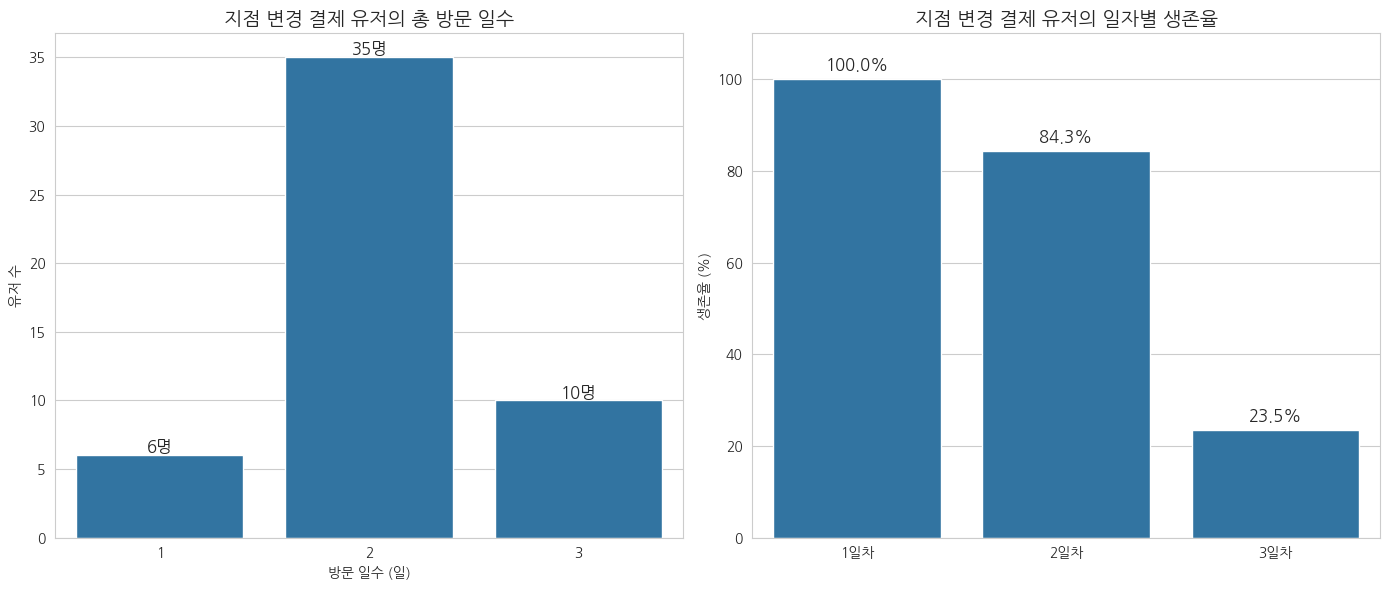

 타겟 유저 수: 51명
 2일차 재방문율: 84.3%


In [ ]:
# [Step 1] 데이터 로드 및 타겟 그룹 필터링
final_master = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀 프로젝트 3/final_master_dataset(noisedel).csv')

target_group = final_master[
    (final_master['is_changed_site'] == True) &
    (final_master['is_payment'] == 1)
].copy()

# [Step 2] 방문 일수 및 재방문율 계산
attended_cols = ['day1_attended', 'day2_attended', 'day3_attended']
target_group['visit_day_count'] = target_group[attended_cols].sum(axis=1)
retention_rates = target_group[attended_cols].mean() * 100


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# (1) 방문 일수 분포 (막대그래프)
sns.countplot(x='visit_day_count', data=target_group, ax=axes[0])
axes[0].set_title('지점 변경 결제 유저의 총 방문 일수', fontsize=14)
axes[0].set_xlabel('방문 일수 (일)')
axes[0].set_ylabel('유저 수')

# 숫자 표시
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}명', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

# (2) 일자별 재방문율 (Retention Rate)
sns.barplot(x=['1일차', '2일차', '3일차'], y=retention_rates.values, ax=axes[1])
axes[1].set_title('지점 변경 결제 유저의 일자별 생존율', fontsize=14)
axes[1].set_ylabel('생존율 (%)')
axes[1].set_ylim(0, 110)

# 퍼센트 표시
for i, v in enumerate(retention_rates.values):
    axes[1].text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f" 타겟 유저 수: {len(target_group)}명")
print(f" 2일차 재방문율: {retention_rates['day2_attended']:.1f}%")

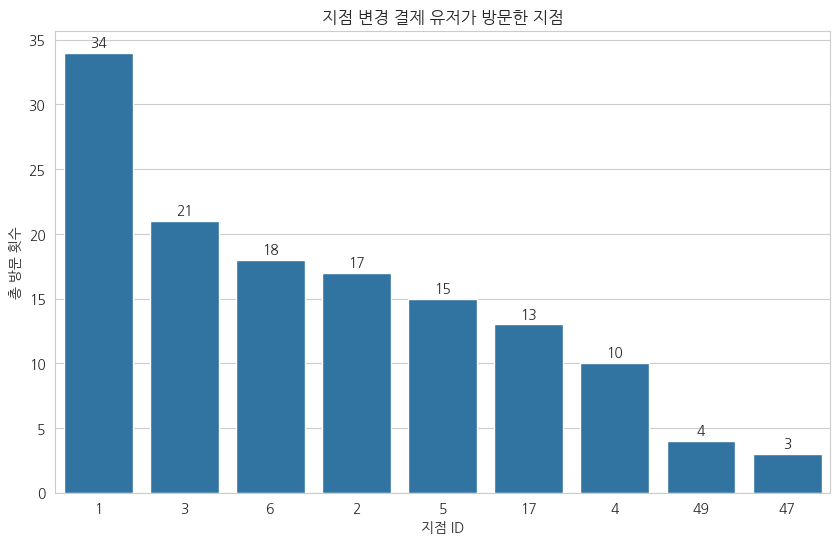


지점 변경 결제 유저의 주요 이동 경로 Top 5 ===
site_id
[1, 6]       5
[4, 1]       2
[3, 1, 2]    2
[3, 2]       2
[3, 1, 3]    2
Name: count, dtype: int64


In [ ]:
# [Step 1] 데이터 로드
df_master = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀 프로젝트 3/final_master_dataset(noisedel).csv')
df_visit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀 프로젝트 3/trial_visit_info.csv')

# [Step 2] 타겟 유저 추출 (지점변경 O + 결제 O)
target_users = df_master[
    (df_master['is_changed_site'] == True) &
    (df_master['is_payment'] == 1)
]['user_uuid'].unique()

# [Step 3] 타겟 유저의 방문 기록만 필터링
target_visits = df_visit[df_visit['user_uuid'].isin(target_users)].copy()

# 지점별 방문 횟수 카운트
site_counts = target_visits['site_id'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=site_counts.index, y=site_counts.values, order=site_counts.index)
plt.title('지점 변경 결제 유저가 방문한 지점')
plt.xlabel('지점 ID')
plt.ylabel('총 방문 횟수')

# 숫자 표시
for i, v in enumerate(site_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()

# [Bonus] 주요 이동 경로 텍스트 출력
# 날짜순 정렬 후 유저별 경로 리스트 생성
paths = target_visits.sort_values(['user_uuid', 'date']).groupby('user_uuid')['site_id'].apply(list)
print("\n지점 변경 결제 유저의 주요 이동 경로 Top 5 ===")
print(paths.astype(str).value_counts().head())

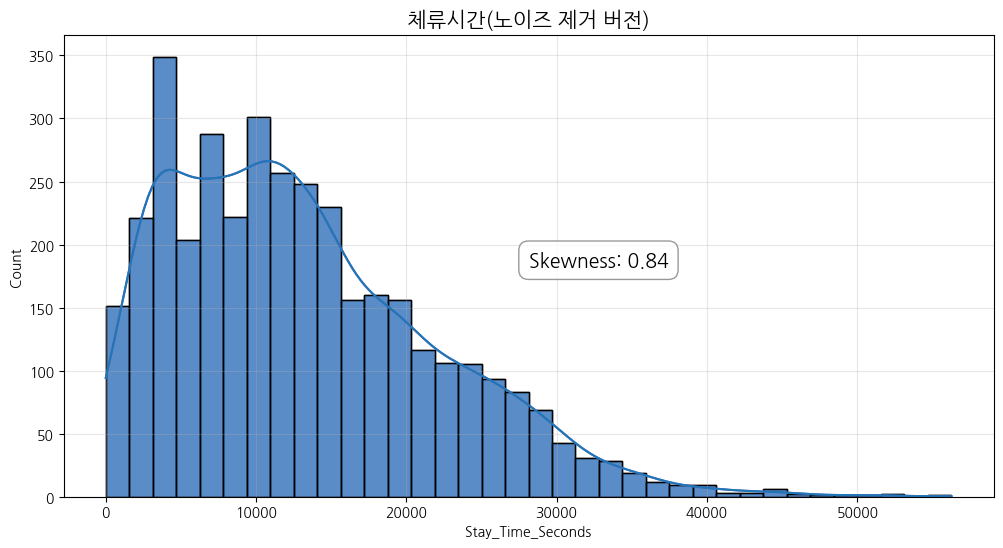


[체류시간(초) 요약 통계]
count     3686.000000
mean     13099.999729
std       8827.923920
min          9.000000
25%       6236.000000
50%      11573.500000
75%      18517.750000
max      56257.000000
Name: day1_stay_sec, dtype: float64


In [ ]:
# 2. 시간 데이터 전처리 (초 단위로 변환)
def time_to_seconds(t_str):
    if pd.isna(t_str) or t_str == '00:00:00':
        return 0
    try:
        h, m, s = map(int, t_str.split(':'))
        return h * 3600 + m * 60 + s
    except:
        return 0

# 'day1_staytime'을 초(Seconds)로 변환
final_master_dataset_noisedel1['day1_stay_sec'] = final_master_dataset_noisedel1['day1_staytime'].apply(time_to_seconds)

# 3. 분포 그래프 그리기 (Histogram + KDE)
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=final_master_dataset_noisedel1, x='day1_stay_sec', kde=True, color='slateblue')
# sns.histplot: 데이터의 분포를 가장 잘 보여주는 그래프
# bins='auto': 데이터에 맞춰서 막대 개수를 자동으로 조절 (또는 숫자를 넣어서 조절 가능, 예: bins=100)
# kde=True: 부드러운 곡선을 추가해서 흐름을 보여줌
sns.histplot(data=final_master_dataset_noisedel1, x='day1_stay_sec', kde=True, alpha=0.6)

plt.title('체류시간(노이즈 제거 버전)', fontsize=15)
plt.xlabel('Stay_Time_Seconds')
plt.ylabel('Count')

# x축 범위를 데이터에 맞춰서 좀 더 타이트하게 잡고 싶으면 아래 주석을 푸세요
# plt.xlim(0, df['day1_stay_sec'].max())
# 3. 왜도(Skewness) 계산
# pandas의 .skew() 함수로 간단하게 계산 가능합니다.
skew_val = final_master_dataset_noisedel1['day1_stay_sec'].skew()
plt.text(x=0.5, y=0.5,
         s=f'Skewness: {skew_val:.2f}',
         transform= ax.transAxes,
         fontsize=14,
         fontweight='bold',
         color='black',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'))
plt.grid(True, alpha=0.3)
plt.show()

# 4. (참고) 통계치 확인
print("\n[체류시간(초) 요약 통계]")
print(final_master_dataset_noisedel1['day1_stay_sec'].describe())

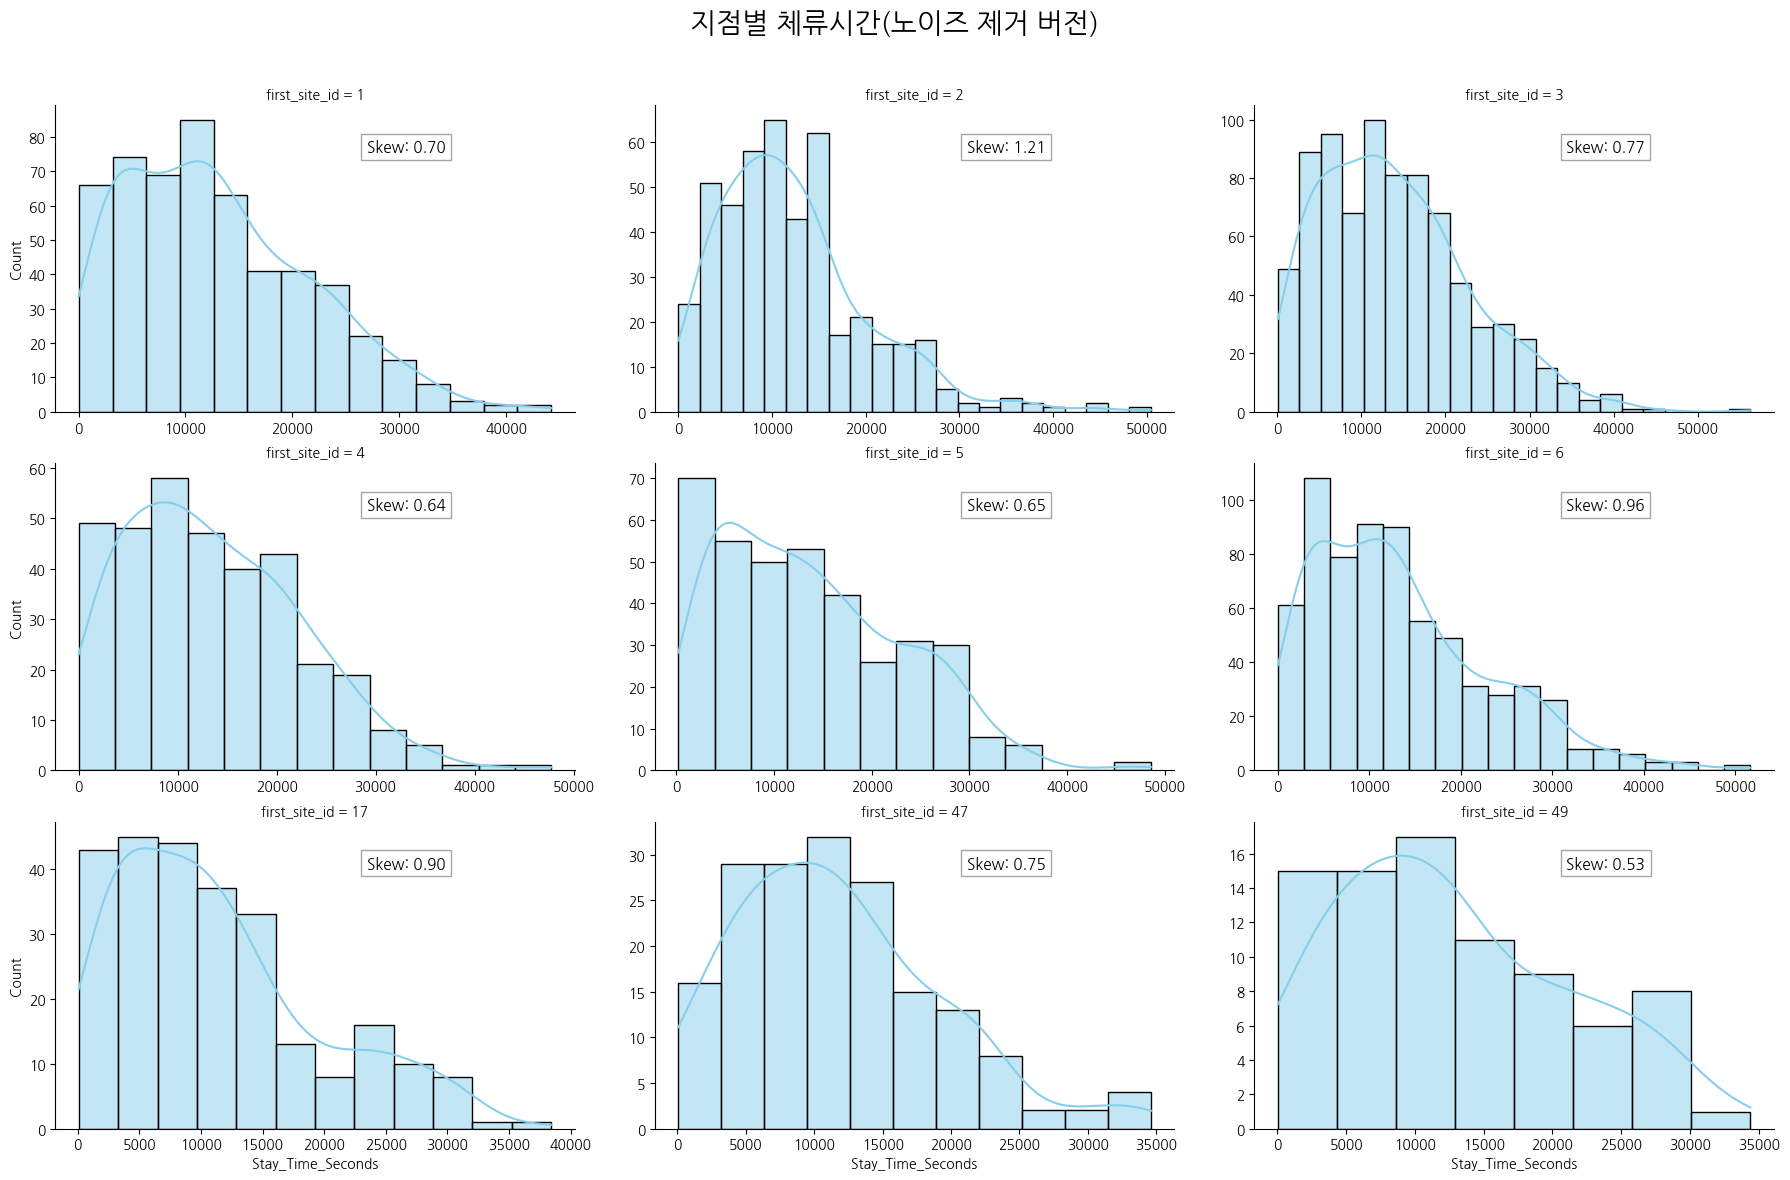

In [ ]:
# 3. 데이터 필터링 (방문자가 많은 상위 9개 지점만 선택)
# 모든 지점을 다 그리면 너무 작아서 안 보이므로, 데이터가 많은 Top 9만 그립니다.
top_sites = final_master_dataset_noisedel1['first_site_id'].value_counts().nlargest(9).index
df_top = final_master_dataset_noisedel1[final_master_dataset_noisedel1['first_site_id'].isin(top_sites)]

# 4. 왜도 표시를 위한 사용자 정의 함수
def annotate_skewness(x, **kwargs):
    ax = plt.gca() # 현재 그려지고 있는 그래프 축 가져오기
    if len(x) > 0:
        skew_val = x.skew()
        # 그래프 우측 상단에 텍스트 넣기
        ax.text(0.6, 0.85, f'Skew: {skew_val:.2f}', transform=ax.transAxes,
                fontsize=11, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

# 5. FacetGrid 그리기 (핵심: 지점별로 그래프 쪼개기)
# col="first_site_id": 지점 아이디별로 컬럼 나누기
# col_wrap=3: 한 줄에 3개씩 그리기
g = sns.FacetGrid(df_top, col="first_site_id", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# (1) 히스토그램 + KDE 곡선 그리기
g.map(sns.histplot, "day1_stay_sec", kde=True, color='skyblue')

# (2) 왜도 텍스트 추가하기
g.map(annotate_skewness, "day1_stay_sec")

# 6. 전체 제목 및 라벨 설정
g.set_axis_labels("Stay_Time_Seconds", "Count")
g.fig.subplots_adjust(top=0.9) # 제목 들어갈 공간 확보
g.fig.suptitle('지점별 체류시간(노이즈 제거 버전)', fontsize=20, fontweight='bold')

plt.show()

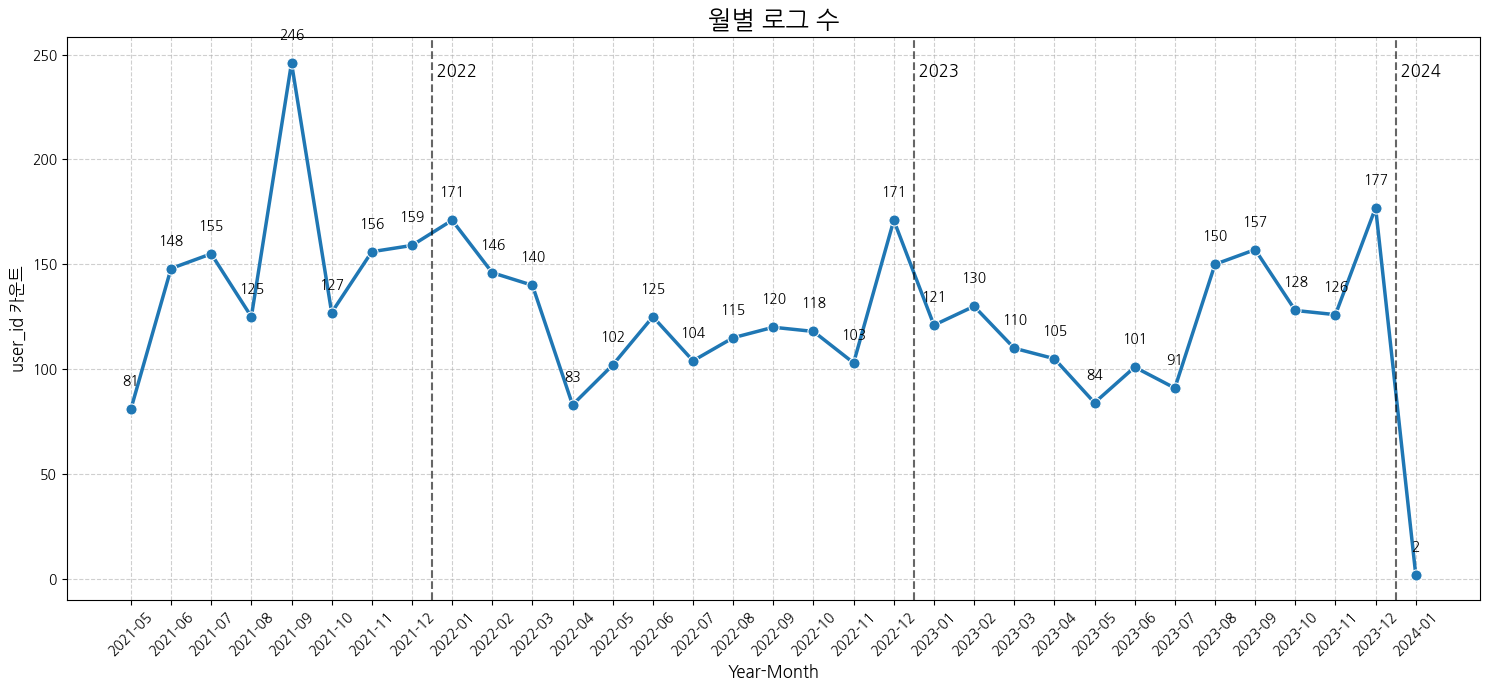


[연-월별 방문자 수]
year_month
2021-05     81
2021-06    148
2021-07    155
2021-08    125
2021-09    246
2021-10    127
2021-11    156
2021-12    159
2022-01    171
2022-02    146
2022-03    140
2022-04     83
2022-05    102
2022-06    125
2022-07    104
2022-08    115
2022-09    120
2022-10    118
2022-11    103
2022-12    171
2023-01    121
2023-02    130
2023-03    110
2023-04    105
2023-05     84
2023-06    101
2023-07     91
2023-08    150
2023-09    157
2023-10    128
2023-11    126
2023-12    177
2024-01      2
dtype: int64


In [ ]:
# 2. 날짜 데이터 전처리
# 'day1_first' 컬럼을 날짜 형식(datetime)으로 변환합니다.
final_master_dataset_noisedel1['visit_date'] = pd.to_datetime(final_master_dataset_noisedel1['day1_first'])

# 1900년 같은 이상한 날짜가 섞여 있을 경우를 대비해 2000년 이후 데이터만 남깁니다. (노이즈 제거)
final_master_dataset_noisedel1 = final_master_dataset_noisedel1[final_master_dataset_noisedel1['visit_date'].dt.year > 2000]

# 3. '연-월' 컬럼 생성
# 예: 2023-09-05 -> '2023-09' 형태로 변환
final_master_dataset_noisedel1['year_month'] = final_master_dataset_noisedel1['visit_date'].dt.strftime('%Y-%m')

# 4. 데이터 집계 (월별 방문자 수 카운트)
monthly_counts = final_master_dataset_noise1.groupby('year_month').size().sort_index()

# 5. 시각화 (Line Chart with Markers)
plt.figure(figsize=(15, 7))

# 선 그래프 그리기 (marker='o' : 데이터 위치에 동그라미 표시)
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values,
             marker='o',  linewidth=2.5, markersize=8)

plt.title('월별 로그 수', fontsize=18)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('user_id 카운트', fontsize=12)

# (2) 연도 구분선 긋기 (핵심 로직)
# X축 라벨(날짜 문자열)을 하나씩 확인하면서, '01월'인 지점을 찾습니다.
for i, date_str in enumerate(monthly_counts.index):
    if date_str.endswith('-01'): # 예: '2022-01' 처럼 1월로 끝나는 경우
        # x좌표 i에서 0.5를 뺀 위치(이전 달과 1월 사이)에 선을 긋습니다.
        plt.axvline(x=i - 0.5, color='black', linestyle='--', alpha=0.6)

        # 선 옆에 '202X년' 이라고 글씨도 써줍니다.
        year_label = date_str.split('-')[0] # '2022' 추출
        plt.text(x=i - 0.5, y=monthly_counts.max(), s=f' {year_label} ',
                 color='black', fontsize=12, fontweight='bold', ha='left', va='top')

# X축 라벨이 겹치지 않게 45도 회전
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# 각 점 위에 숫자 표시 (데이터 라벨링)
for x, y in zip(monthly_counts.index, monthly_counts.values):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 6. 표로 데이터 확인
print("\n[연-월별 방문자 수]")
print(monthly_counts)

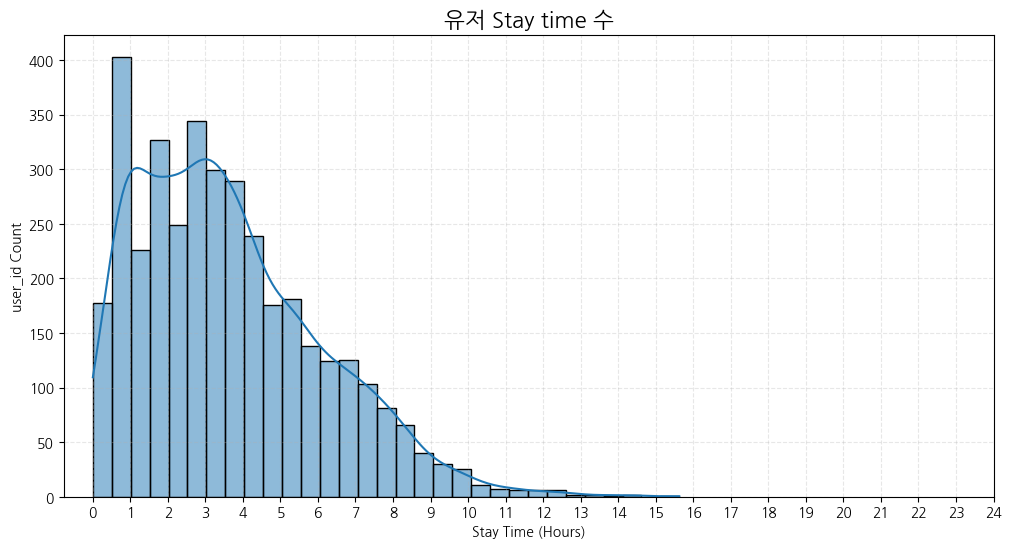


[시간 단위 체류시간 통계]
count    4177.00
mean        4.00
std         2.68
min         0.00
25%         1.90
50%         3.57
75%         5.66
max        23.95
Name: day1_stay_hour, dtype: float64


In [ ]:
# 2. 시간 데이터 전처리 (시간 단위로 변환)
# 초(Seconds)로 바꾼 뒤 3600으로 나누어 '시간(Hours)' 실수형을 만듭니다.
def time_to_hours(t_str):
    if pd.isna(t_str) or t_str == '00:00:00':
        return 0
    try:
        h, m, s = map(int, t_str.split(':'))
        return h + (m / 60) + (s / 3600)
    except:
        return 0

final_master_dataset_noisedel1['day1_stay_hour'] = final_master_dataset_noisedel1['day1_staytime'].apply(time_to_hours)

# 3. 왜도(Skewness) 계산
skew_val = final_master_dataset_noise1['day1_stay_hour'].skew()

# 4. 히스토그램 그리기 (X축이 시간 단위)
plt.figure(figsize=(12, 6))

# binwidth=0.5 : 막대 하나를 '30분(0.5시간)' 간격으로 설정 (조절 가능)
ax = sns.histplot(data=final_master_dataset_noisedel1, x='day1_stay_hour', kde=True,
                  binwidth=0.5)

plt.title('유저 Stay time 수', fontsize=16)
plt.xlabel('Stay Time (Hours)') # X축 라벨 변경
plt.ylabel('user_id Count')

# 5. X축 눈금 설정 (0, 1, 2, 3... 시간 단위로 딱 떨어지게)
# 데이터의 최대 시간까지 1시간 간격으로 눈금을 찍습니다.
max_hour = int(df['day1_stay_hour'].max())
plt.xticks(range(0, max_hour + 2, 1))


plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 7. 요약 통계 출력
print("\n[시간 단위 체류시간 통계]")
print(df['day1_stay_hour'].describe().round(2))

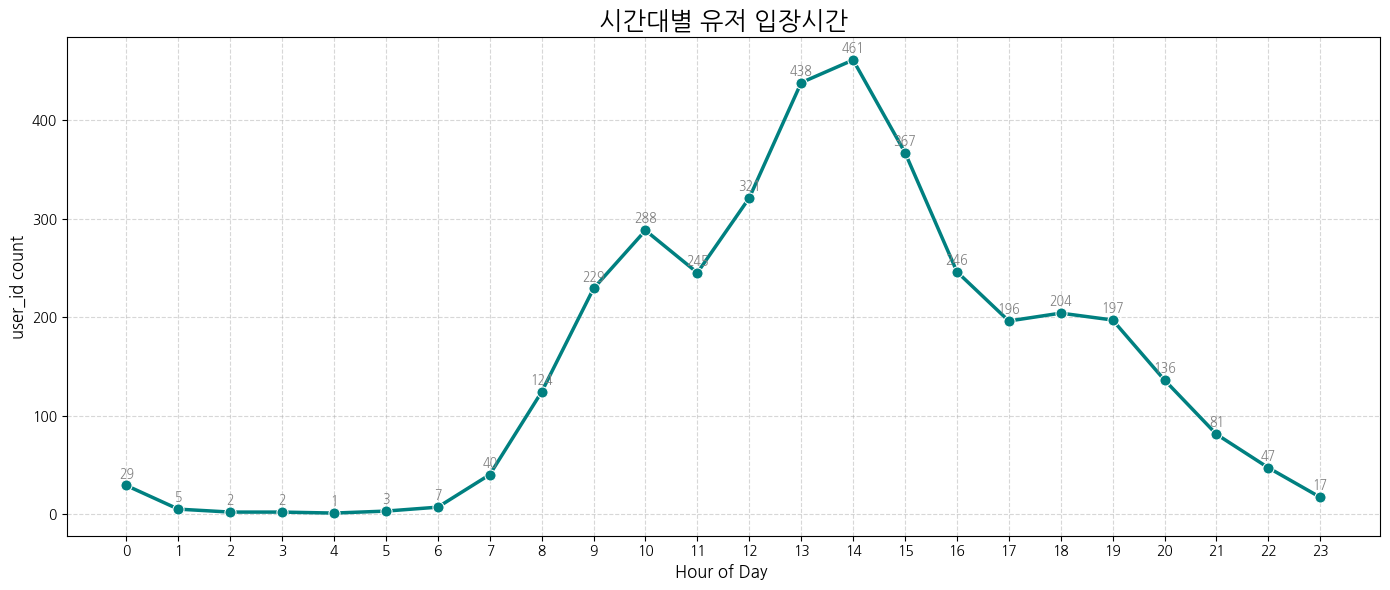


[시간대별 입장 인원 Top 5]
exit_hour
14    461
13    438
15    367
12    321
10    288
Name: count, dtype: int64


In [ ]:
# 2. 시간 데이터 전처리
# day1_last(마지막 접속 시간)를 날짜 형식으로 변환
final_master_dataset_noisedel1['first_time'] = pd.to_datetime(final_master_dataset_noisedel1['day1_first'])

# 1900년 데이터(방문 기록 없음) 제거 (유효한 방문만 분석)
final_master_dataset_noisedel1 = final_master_dataset_noisedel1[final_master_dataset_noisedel1['first_time'].dt.year > 2000]

# '시(Hour)' 정보만 추출 (0 ~ 23)
final_master_dataset_noisedel1['exit_hour'] = final_master_dataset_noisedel1['first_time'].dt.hour

# 3. 데이터 집계 (시간대별 퇴장 인원 카운트)
hourly_counts = final_master_dataset_noisedel1['exit_hour'].value_counts().sort_index()

# 4. 시각화
plt.figure(figsize=(14, 6))

# (1) 꺾은선 그래프 그리기 (흐름을 보여주기 위함)
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values,
             marker='o', markersize=8, linewidth=2.5, color='teal')

# (2) 그래프 꾸미기
plt.title('시간대별 유저 입장시간', fontsize=18)
plt.xlabel('Hour of Day ', fontsize=12)
plt.ylabel('user_id count', fontsize=12)

# X축 눈금을 0시부터 23시까지 모두 표시
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

# (3) [핵심] 가장 퇴장이 많은 시간(Peak Time) 강조하기
peak_hour = hourly_counts.idxmax()      # 가장 카운트가 높은 시간
peak_count = hourly_counts.max()        # 그때의 인원 수

# Peak 지점에 빨간색 점 찍기
#plt.plot(peak_hour, peak_count, marker='o', color='red', markersize=12, alpha=0.7)

# Peak 지점에 텍스트 달기 (화살표 포함)
# plt.annotate(f'Peak: {peak_hour}h ({peak_count} users)',
#              xy=(peak_hour, peak_count),
#              xytext=(peak_hour, peak_count + 50),
#              arrowprops=dict(facecolor='red', shrink=0.05),
#              fontsize=12, fontweight='bold', color='red', ha='center')

# 나머지 점들 위에도 작게 숫자 표시
for x, y in zip(hourly_counts.index, hourly_counts.values):
    #if x != peak_hour: # 피크 타임은 이미 크게 표시했으므로 제외
        plt.text(x, y + 5, str(y), ha='center', va='bottom', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

# 5. 표로 데이터 확인
print("\n[시간대별 입장 인원 Top 5]")
print(hourly_counts.sort_values(ascending=False).head(5))

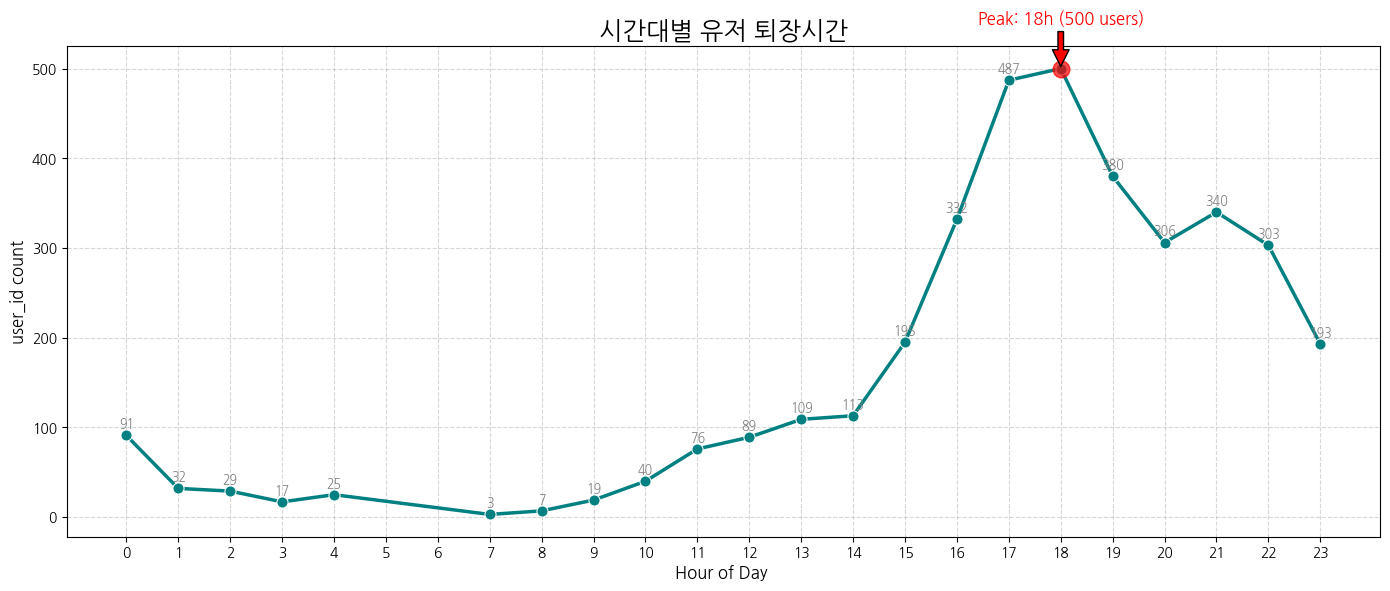


[시간대별 퇴장 인원 Top 5]
exit_hour
18    500
17    487
19    380
21    340
16    332
Name: count, dtype: int64


In [ ]:
# 2. 시간 데이터 전처리
# day1_last(마지막 접속 시간)를 날짜 형식으로 변환
final_master_dataset_noisedel1['last_time'] = pd.to_datetime(final_master_dataset_noisedel1['day1_last'])

# 1900년 데이터(방문 기록 없음) 제거 (유효한 방문만 분석)
final_master_dataset_noisedel1 = final_master_dataset_noisedel1[final_master_dataset_noisedel1['last_time'].dt.year > 2000]

# '시(Hour)' 정보만 추출 (0 ~ 23)
final_master_dataset_noisedel1['exit_hour'] = final_master_dataset_noisedel1['last_time'].dt.hour

# 3. 데이터 집계 (시간대별 퇴장 인원 카운트)
hourly_counts = final_master_dataset_noisedel1['exit_hour'].value_counts().sort_index()

# 4. 시각화
plt.figure(figsize=(14, 6))

# (1) 꺾은선 그래프 그리기 (흐름을 보여주기 위함)
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values,
             marker='o', markersize=8, linewidth=2.5, color='teal')

# (2) 그래프 꾸미기
plt.title('시간대별 유저 퇴장시간', fontsize=18)
plt.xlabel('Hour of Day ', fontsize=12)
plt.ylabel('user_id count', fontsize=12)

# X축 눈금을 0시부터 23시까지 모두 표시
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

# (3) [핵심] 가장 퇴장이 많은 시간(Peak Time) 강조하기
peak_hour = hourly_counts.idxmax()      # 가장 카운트가 높은 시간
peak_count = hourly_counts.max()        # 그때의 인원 수

# Peak 지점에 빨간색 점 찍기
plt.plot(peak_hour, peak_count, marker='o', color='red', markersize=12, alpha=0.7)

# Peak 지점에 텍스트 달기 (화살표 포함)
plt.annotate(f'Peak: {peak_hour}h ({peak_count} users)',
             xy=(peak_hour, peak_count),
             xytext=(peak_hour, peak_count + 50),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, fontweight='bold', color='red', ha='center')

# 나머지 점들 위에도 작게 숫자 표시
for x, y in zip(hourly_counts.index, hourly_counts.values):
    if x != peak_hour: # 피크 타임은 이미 크게 표시했으므로 제외
        plt.text(x, y + 5, str(y), ha='center', va='bottom', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

# 5. 표로 데이터 확인
print("\n[시간대별 퇴장 인원 Top 5]")
print(hourly_counts.sort_values(ascending=False).head(5))

###Ⅸ 마스터 테이블 전처리 수정버전

In [ ]:
user_master_modi= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀 프로젝트 3/user_master(전처리수정).csv')
user_master_modi

user_uuid  first_site_id  \
0     000590dc-046f-462b-8225-4c81a97b7166              6   
1     000be14f-ba0f-4af6-bc2c-7b00dfcbc98c              3   
2     0018e22d-a2cc-4e06-bca2-d6a041770f3b              6   
3     002606d9-38ca-48f3-910c-cbfada9a9109             17   
4     002a7570-90dd-4cab-b0aa-b0e40f7ef27a              5   
...                                    ...            ...   
5980  ffc79669-ed11-4cde-86d4-8ec232ac7b14              1   
5981  ffcb7950-d150-40ae-a6bf-f85f5c2b9702              2   
5982  ffce32ca-2efc-4485-b685-4b65811c2dcf              4   
5983  ffd287bc-2797-4788-82fa-6268c82e7fa9              6   
5984  fffbf2b3-7853-4c07-bd2a-aae686ac9013              6   

                      day1_first                   day1_last day1_staytime  \
0     2023-09-05 11:57:01.695334  2023-09-05 17:59:45.973499      05:56:57   
1     2021-09-30 16:31:14.861813  2021-09-30 20:25:41.850542      02:50:22   
2     2023-11-15 09:44:08.498847  2023-11-15 21:47:13.500699      11:55:00   
3     2023-01-07 17:25:54.781175  2023-01-07 20:59:26.023706      03:31:29   
4     2021-09-08 16:37:24.456986  2021-09-08 22:25:10.197658      05:12:02   
...                          ...                         ...           ...   
5980  2021-05-29 18:53:52.554015  2021-05-29 23:23:16.641187      03:59:00   
5981  2022-04-26 13:51:12.763210  2022-04-26 18:06:31.661452      04:12:34   
5982  2023-11-02 00:31:57.590241  2023-11-02 02:49:23.113461      02:17:25   
5983  2023-04-07 15:19:53.092779  2023-04-07 18:09:40.896455      02:41:12   
5984  2022-01-13 13:20:42.874402  2022-01-13 15:20:47.601947      01:56:16   

      day1_visit_cnt  day1_attended                  day2_first  \
0                  3              1  1900-01-01 00:00:00.000000   
1                  7              1  2021-10-01 19:30:20.894398   
2                  6              1  2023-11-16 09:04:41.565727   
3                  2              1  2023-01-08 15:57:20.084255   
4                  5              1  1900-01-01 00:00:00.000000   
...              ...            ...                         ...   
5980               4              1  1900-01-01 00:00:00.000000   
5981               2              1  2022-04-27 14:01:49.040076   
5982               1              1  2023-11-02 12:09:21.078294   
5983               4              1  2023-04-08 15:26:33.087593   
5984               3              1  1900-01-01 00:00:00.000000   

                       day2_last day2_staytime  day2_visit_cnt  day2_attended  \
0     1900-01-01 00:00:00.000000      00:00:00               0              0   
1     2021-10-01 22:08:58.909740      02:36:22               2              1   
2     2023-11-16 18:39:26.886181      09:34:32               2              1   
3     2023-01-08 19:24:54.056668      03:25:34               2              1   
4     1900-01-01 00:00:00.000000      00:00:00               0              0   
...                          ...           ...             ...            ...   
5980  1900-01-01 00:00:00.000000      00:00:00               0              0   
5981  2022-04-27 18:10:32.176612      04:00:59               3              1   
5982  2023-11-02 12:12:45.944963      00:03:24               1              1   
5983  2023-04-08 22:52:31.912488      06:35:03               6              1   
5984  1900-01-01 00:00:00.000000      00:00:00               0              0   

                      day3_first                   day3_last day3_staytime  \
0     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
1     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
2     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
3     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
4     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
...                          ...                         ...           ...   
5980  1900-01-01 00:00:00.000000  1900-

In [ ]:
trial_payment= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀 프로젝트 3/trial_payment.csv')
trial_payment

is_payment                             user_uuid
0              0  2b251333-8676-4c11-a736-dcf2350f8821
1              0  e111619a-0975-451b-9a4a-bc8aea7b7b84
2              1  4a184795-b056-4572-a874-644f68609ea3
3              0  2ba8ab19-2d40-4423-ad04-f0f9ca814871
4              0  1d49ba36-6c23-405b-9514-aa7f4aeceff0
...          ...                                   ...
9654           0  d7599df4-1e5a-4f5e-97ce-c42047bfd87c
9655           0  43263092-3b28-4817-9fa9-4205ad3097fe
9656           0  51a40f33-1027-4544-9b95-45bca7c104fb
9657           0  3e649531-bf5b-4b99-84e5-ca3e0e647d0c
9658           0  b7633cc2-bde9-4dff-9c8f-33dac3c976c2

[9659 rows x 2 columns]

In [ ]:
user_master_modify = pd.merge(user_master_modi,trial_payment, on='user_uuid', how='left')

In [ ]:
user_master_modify

user_uuid  first_site_id  \
0     000590dc-046f-462b-8225-4c81a97b7166              6   
1     000be14f-ba0f-4af6-bc2c-7b00dfcbc98c              3   
2     0018e22d-a2cc-4e06-bca2-d6a041770f3b              6   
3     002606d9-38ca-48f3-910c-cbfada9a9109             17   
4     002a7570-90dd-4cab-b0aa-b0e40f7ef27a              5   
...                                    ...            ...   
6005  ffc79669-ed11-4cde-86d4-8ec232ac7b14              1   
6006  ffcb7950-d150-40ae-a6bf-f85f5c2b9702              2   
6007  ffce32ca-2efc-4485-b685-4b65811c2dcf              4   
6008  ffd287bc-2797-4788-82fa-6268c82e7fa9              6   
6009  fffbf2b3-7853-4c07-bd2a-aae686ac9013              6   

                      day1_first                   day1_last day1_staytime  \
0     2023-09-05 11:57:01.695334  2023-09-05 17:59:45.973499      05:56:57   
1     2021-09-30 16:31:14.861813  2021-09-30 20:25:41.850542      02:50:22   
2     2023-11-15 09:44:08.498847  2023-11-15 21:47:13.500699      11:55:00   
3     2023-01-07 17:25:54.781175  2023-01-07 20:59:26.023706      03:31:29   
4     2021-09-08 16:37:24.456986  2021-09-08 22:25:10.197658      05:12:02   
...                          ...                         ...           ...   
6005  2021-05-29 18:53:52.554015  2021-05-29 23:23:16.641187      03:59:00   
6006  2022-04-26 13:51:12.763210  2022-04-26 18:06:31.661452      04:12:34   
6007  2023-11-02 00:31:57.590241  2023-11-02 02:49:23.113461      02:17:25   
6008  2023-04-07 15:19:53.092779  2023-04-07 18:09:40.896455      02:41:12   
6009  2022-01-13 13:20:42.874402  2022-01-13 15:20:47.601947      01:56:16   

      day1_visit_cnt  day1_attended                  day2_first  \
0                  3              1  1900-01-01 00:00:00.000000   
1                  7              1  2021-10-01 19:30:20.894398   
2                  6              1  2023-11-16 09:04:41.565727   
3                  2              1  2023-01-08 15:57:20.084255   
4                  5              1  1900-01-01 00:00:00.000000   
...              ...            ...                         ...   
6005               4              1  1900-01-01 00:00:00.000000   
6006               2              1  2022-04-27 14:01:49.040076   
6007               1              1  2023-11-02 12:09:21.078294   
6008               4              1  2023-04-08 15:26:33.087593   
6009               3              1  1900-01-01 00:00:00.000000   

                       day2_last day2_staytime  day2_visit_cnt  day2_attended  \
0     1900-01-01 00:00:00.000000      00:00:00               0              0   
1     2021-10-01 22:08:58.909740      02:36:22               2              1   
2     2023-11-16 18:39:26.886181      09:34:32               2              1   
3     2023-01-08 19:24:54.056668      03:25:34               2              1   
4     1900-01-01 00:00:00.000000      00:00:00               0              0   
...                          ...           ...             ...            ...   
6005  1900-01-01 00:00:00.000000      00:00:00               0              0   
6006  2022-04-27 18:10:32.176612      04:00:59               3              1   
6007  2023-11-02 12:12:45.944963      00:03:24               1              1   
6008  2023-04-08 22:52:31.912488      06:35:03               6              1   
6009  1900-01-01 00:00:00.000000      00:00:00               0              0   

                      day3_first                   day3_last day3_staytime  \
0     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
1     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
2     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
3     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
4     1900-01-01 00:00:00.000000  1900-01-01 00:00:00.000000      00:00:00   
...                          ...                         ...           ...   
6005  1900-01-01 00:00:00.000000  1900-

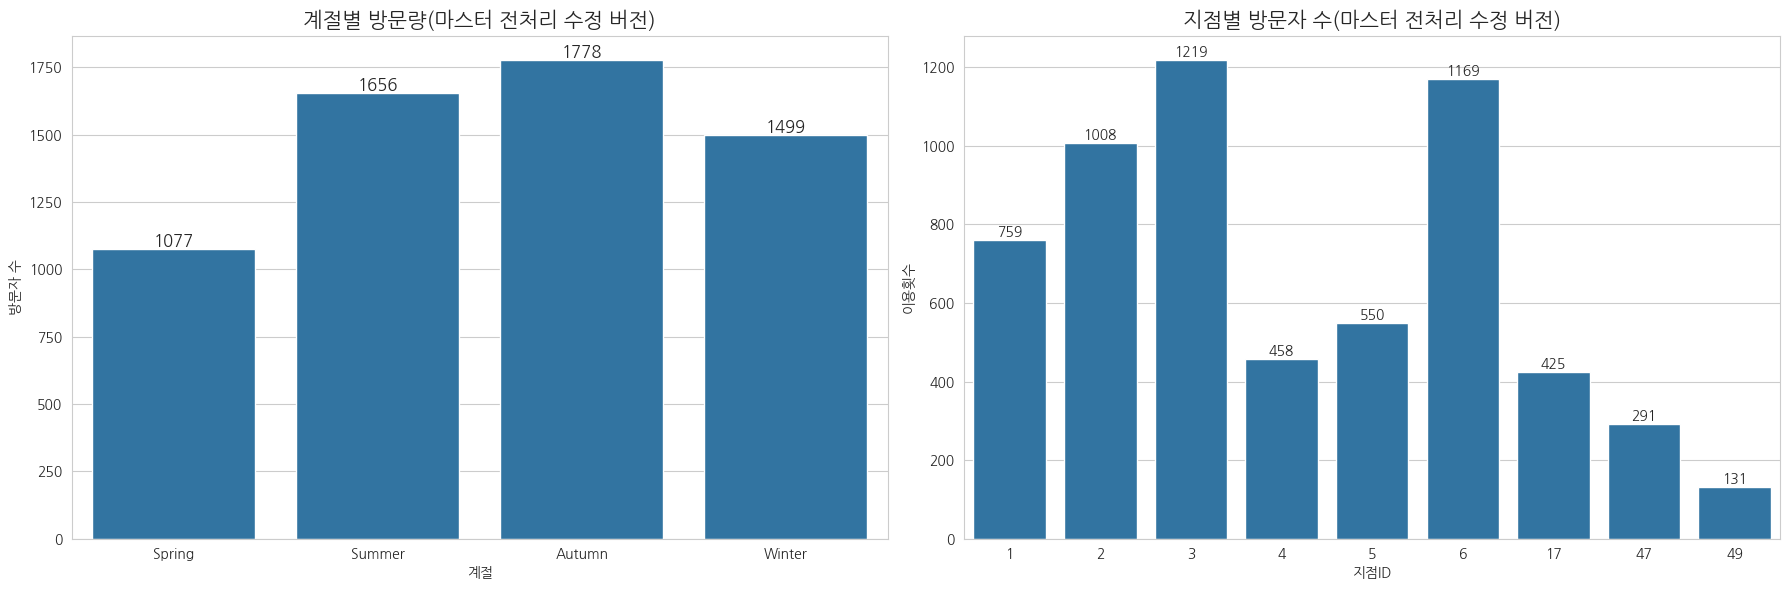


[계절별 방문자 수]
season
Spring    1077
Summer    1656
Autumn    1778
Winter    1499
Name: count, dtype: int64


[지점별 방문자 수 Top 5]
first_site_id
3    1219
6    1169
2    1008
1     759
5     550
Name: count, dtype: int64


In [ ]:
# 2. 날짜 데이터 전처리 및 계절 분류
# day1_first를 날짜 형식으로 변환
user_master_modify['visit_date'] = pd.to_datetime(user_master_modify['day1_first'])

# 월(Month) 추출
user_master_modify['month'] = user_master_modify['visit_date'].dt.month

# 월을 기준으로 계절 매핑 함수 정의
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter' # 12, 1, 2월

# 계절 컬럼 생성
user_master_modify['season'] = user_master_modify['month'].apply(get_season)

# 3. 데이터 집계
# (1) 계절별 방문자 수
season_counts = user_master_modify['season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter']) # 순서 고정

# (2) 지점별(Site ID) 방문자 수 (상위 10개만 시각화하거나 전체를 볼 수 있음)
site_counts = user_master_modify['first_site_id'].value_counts().sort_index()

# 4. 시각화
plt.figure(figsize=(18, 6))

# [왼쪽 그래프] 계절별 방문자 수
plt.subplot(1, 2, 1)
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('계절별 방문량(마스터 전처리 수정 버전)', fontsize=15)
plt.ylabel('방문자 수')
plt.xlabel('계절')
# 막대 위에 숫자 표시
for i, v in enumerate(season_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)

# [오른쪽 그래프] 지점별 방문자 수
plt.subplot(1, 2, 2)
sns.barplot(x=site_counts.index, y=site_counts.values)
plt.title('지점별 방문자 수(마스터 전처리 수정 버전)', fontsize=15)
plt.ylabel('이용횟수')
plt.xlabel('지점ID')
# 막대 위에 숫자 표시
for i, v in enumerate(site_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 5. 수치 데이터 출력 (표)
print("\n[계절별 방문자 수]")
print(season_counts)
print("\n" + "="*30)
print("\n[지점별 방문자 수 Top 5]")
print(site_counts.sort_values(ascending=False).head(5))

📍 지점 미변경(한 곳만 이용): 5794명 (96.4%)
🚀 지점 변경(여러 곳 이용): 216명 (3.6%)


/tmp/ipython-input-1540118108.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.index, y=conversion_rate.values, ax=axes[1], palette=['grey', 'coral'])
/tmp/ipython-input-1540118108.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['변경 안 함', '변경 함'])


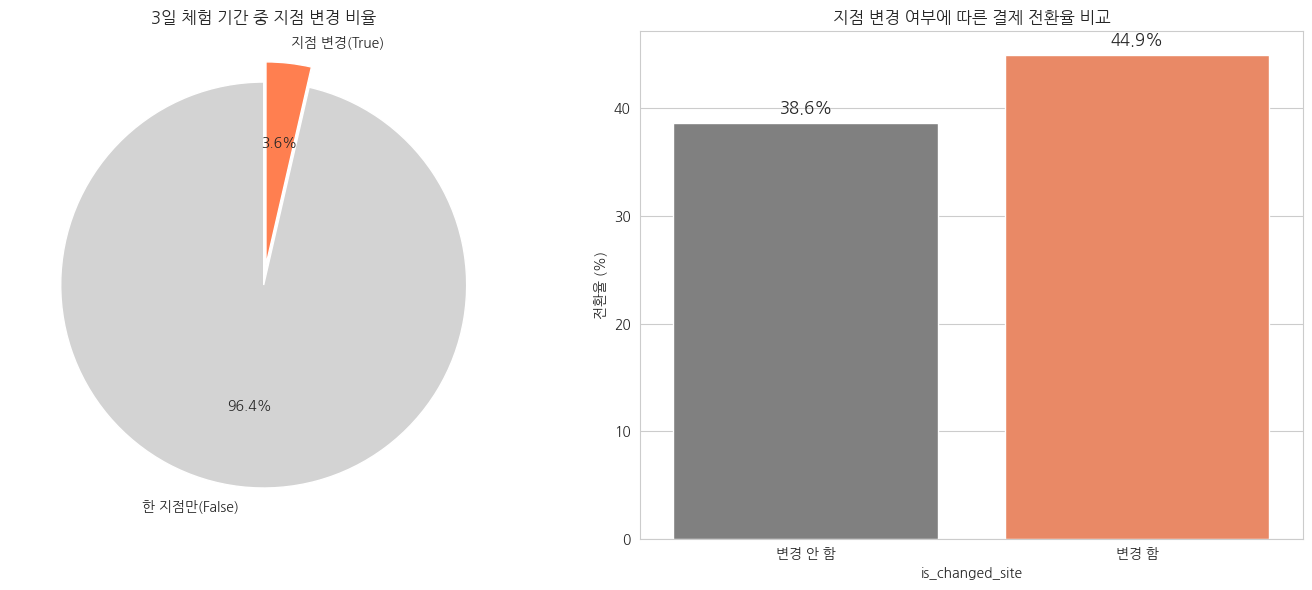

In [ ]:
# 2. 기초 통계량 계산
change_counts = user_master_modify['is_changed_site'].value_counts()
change_pct = user_master_modify['is_changed_site'].value_counts(normalize=True) * 100

print(f"📍 지점 미변경(한 곳만 이용): {change_counts[False]}명 ({change_pct[False]:.1f}%)")
print(f"🚀 지점 변경(여러 곳 이용): {change_counts[True]}명 ({change_pct[True]:.1f}%)")

# 3. 시각화 (비율 파이차트 & 전환율 막대그래프)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# (1) 지점 변경 유저 비율 (Pie Chart)
axes[0].pie(change_counts, labels=['한 지점만(False)', '지점 변경(True)'], autopct='%1.1f%%',
            colors=['lightgray', 'coral'], startangle=90, explode=[0, 0.1])
axes[0].set_title('3일 체험 기간 중 지점 변경 비율')

# (2) 지점 변경 여부에 따른 결제 전환율 (Bar Chart)
# 결제 정보가 있다면 전환율 비교
if 'is_payment' in user_master_modify.columns:
    conversion_rate = user_master_modify.groupby('is_changed_site')['is_payment'].mean() * 100
    sns.barplot(x=conversion_rate.index, y=conversion_rate.values, ax=axes[1], palette=['grey', 'coral'])

    axes[1].set_title('지점 변경 여부에 따른 결제 전환율 비교')
    axes[1].set_ylabel('전환율 (%)')
    axes[1].set_xticklabels(['변경 안 함', '변경 함'])

    # 수치 표시
    for i, v in enumerate(conversion_rate.values):
        axes[1].text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

 분석 대상(지점 변경을 한 결제 유저) 수: 97명
 이들의 평균 체류 시간: 2.3시간


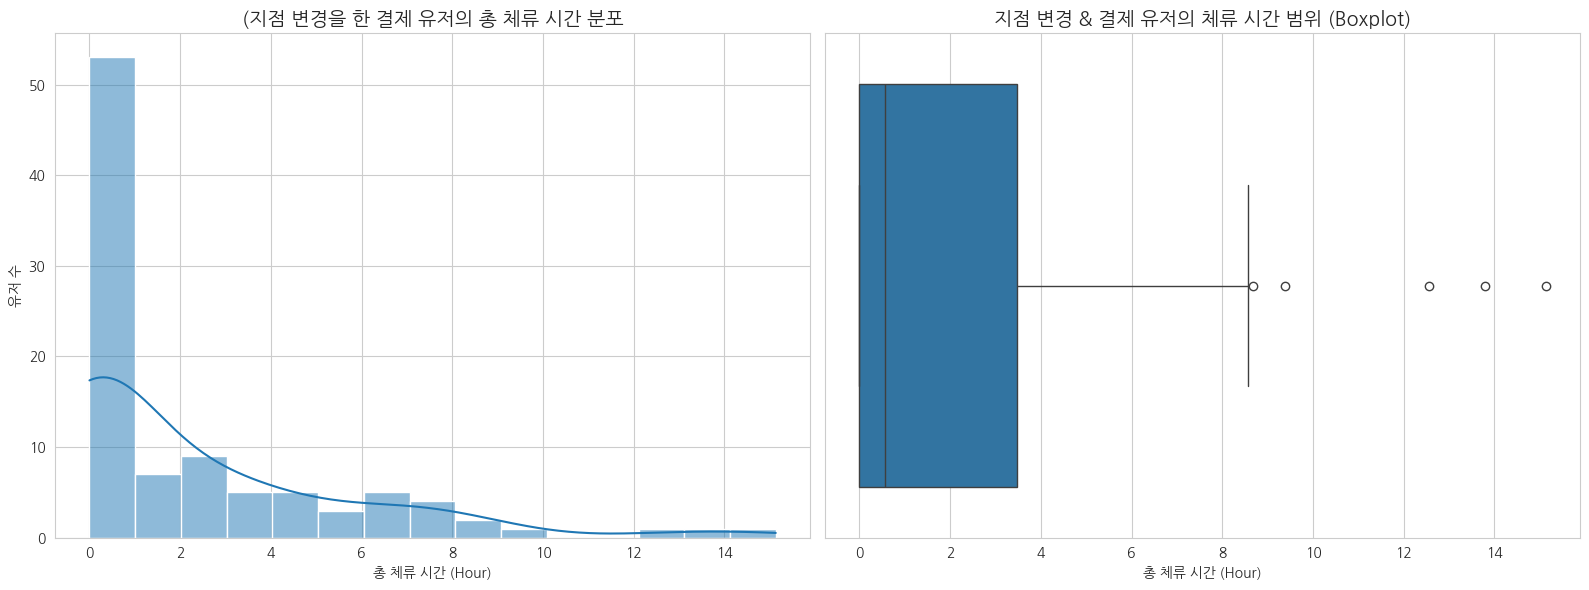


--- 상세 통계량 ---
count    97.000000
mean      2.311962
std       3.326271
min       0.000000
25%       0.000000
50%       0.567500
75%       3.467500
max      15.130833
Name: total_stay_hours, dtype: float64


In [ ]:
# [Step 2] 전처리: 체류시간 문자열 -> 시간(Timedelta) 변환 및 총 시간(Hour) 계산
time_cols = ['day1_staytime', 'day2_staytime', 'day3_staytime']
for col in time_cols:
    user_master_modify[col] = pd.to_timedelta(final_master_dataset_noisedel1[col], errors='coerce')

# 3일치 체류시간 합계 계산 (결측치는 0으로 처리)
user_master_modify['total_stay_hours'] = (
    user_master_modify['day1_staytime'].fillna(pd.Timedelta(0)) +
    user_master_modify['day2_staytime'].fillna(pd.Timedelta(0)) +
    user_master_modify['day3_staytime'].fillna(pd.Timedelta(0))
).dt.total_seconds() / 3600  # 초 단위를 시간 단위로 변환

# [Step 3] 타겟 그룹 필터링 (핵심!)
# 조건: (1) 지점을 변경했고(is_changed_site == True) AND (2) 결제도 한(is_payment == 1) 유저
target_group = user_master_modify[
    (user_master_modify['is_changed_site'] == True) &
    (user_master_modify['is_payment'] == 1)
]

print(f" 분석 대상(지점 변경을 한 결제 유저) 수: {len(target_group)}명")
print(f" 이들의 평균 체류 시간: {target_group['total_stay_hours'].mean():.1f}시간")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (1) 히스토그램 (전반적인 분포 형태)
sns.histplot(target_group['total_stay_hours'], bins=15, kde=True, ax=axes[0])
axes[0].set_title('지점 변경을 한 결제 유저의 총 체류 시간 분포', fontsize=14)
axes[0].set_xlabel('총 체류 시간 (Hour)')
axes[0].set_ylabel('유저 수')

# (2) 박스플롯 (중앙값 및 이상치 확인)
sns.boxplot(x=target_group['total_stay_hours'], ax=axes[1])
axes[1].set_title('지점 변경 & 결제 유저의 체류 시간 범위 (Boxplot)', fontsize=14)
axes[1].set_xlabel('총 체류 시간 (Hour)')

plt.tight_layout()
plt.show()

# 통계 수치 상세 출력
print("\n--- 상세 통계량 ---")
print(target_group['total_stay_hours'].describe())

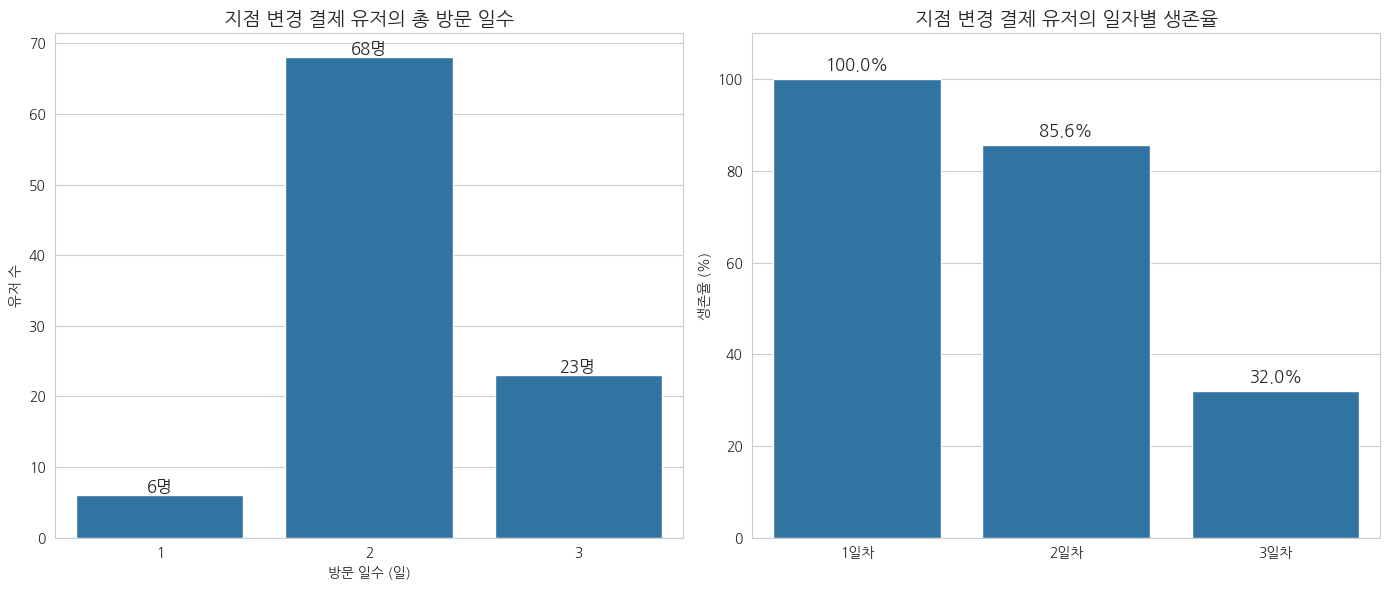

 타겟 유저 수: 97명
 2일차 재방문율: 85.6%


In [ ]:
# [Step 1] 데이터 로드 및 타겟 그룹 필터링
final_master = user_master_modify.copy()

target_group = final_master[
    (final_master['is_changed_site'] == True) &
    (final_master['is_payment'] == 1)
].copy()

# [Step 2] 방문 일수 및 재방문율 계산
attended_cols = ['day1_attended', 'day2_attended', 'day3_attended']
target_group['visit_day_count'] = target_group[attended_cols].sum(axis=1)
retention_rates = target_group[attended_cols].mean() * 100


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# (1) 방문 일수 분포 (막대그래프)
sns.countplot(x='visit_day_count', data=target_group, ax=axes[0])
axes[0].set_title('지점 변경 결제 유저의 총 방문 일수', fontsize=14)
axes[0].set_xlabel('방문 일수 (일)')
axes[0].set_ylabel('유저 수')

# 숫자 표시
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}명', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

# (2) 일자별 재방문율 (Retention Rate)
sns.barplot(x=['1일차', '2일차', '3일차'], y=retention_rates.values, ax=axes[1])
axes[1].set_title('지점 변경 결제 유저의 일자별 생존율', fontsize=14)
axes[1].set_ylabel('생존율 (%)')
axes[1].set_ylim(0, 110)

# 퍼센트 표시
for i, v in enumerate(retention_rates.values):
    axes[1].text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f" 타겟 유저 수: {len(target_group)}명")
print(f" 2일차 재방문율: {retention_rates['day2_attended']:.1f}%")

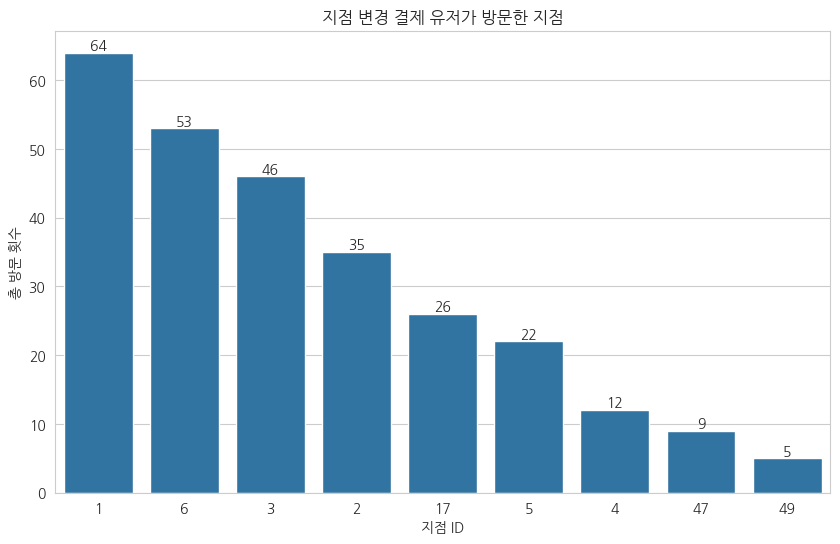


지점 변경 결제 유저의 주요 이동 경로 Top 5 ===
site_id
[1, 6]       6
[1, 6, 6]    3
[4, 1]       2
[6, 3]       2
[5, 1, 5]    2
Name: count, dtype: int64


In [ ]:
# [Step 1] 데이터 로드
df_master = user_master_modify.copy()
df_visit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀 프로젝트 3/trial_visit_info.csv')

# [Step 2] 타겟 유저 추출 (지점변경 O + 결제 O)
target_users = df_master[
    (df_master['is_changed_site'] == True) &
    (df_master['is_payment'] == 1)
]['user_uuid'].unique()

# [Step 3] 타겟 유저의 방문 기록만 필터링
target_visits = df_visit[df_visit['user_uuid'].isin(target_users)].copy()

# 지점별 방문 횟수 카운트
site_counts = target_visits['site_id'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=site_counts.index, y=site_counts.values, order=site_counts.index)
plt.title('지점 변경 결제 유저가 방문한 지점')
plt.xlabel('지점 ID')
plt.ylabel('총 방문 횟수')

# 숫자 표시
for i, v in enumerate(site_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()

# [Bonus] 주요 이동 경로 텍스트 출력
# 날짜순 정렬 후 유저별 경로 리스트 생성
paths = target_visits.sort_values(['user_uuid', 'date']).groupby('user_uuid')['site_id'].apply(list)
print("\n지점 변경 결제 유저의 주요 이동 경로 Top 5 ===")
print(paths.astype(str).value_counts().head())

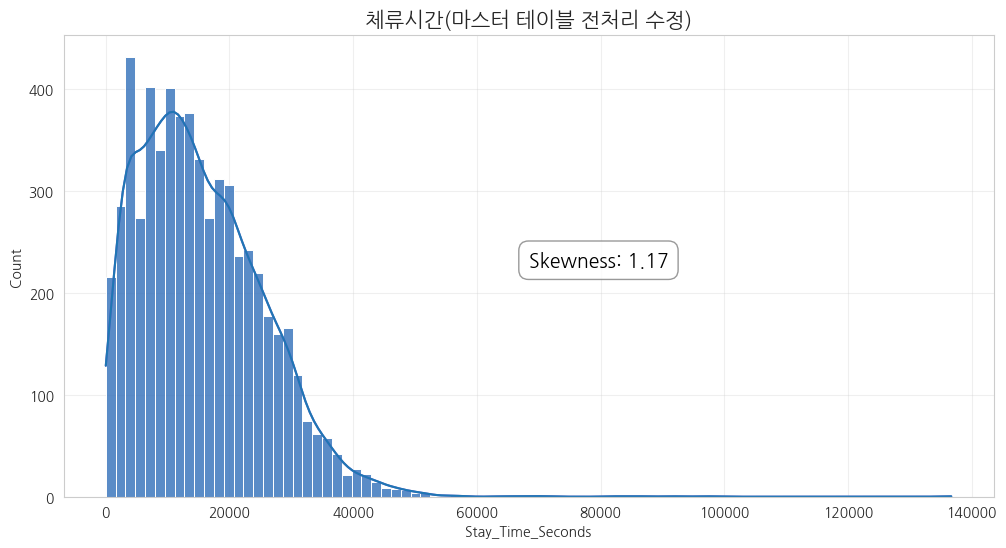


[체류시간(초) 요약 통계]
count      6010.000000
mean      15440.724792
std       10197.156118
min           9.000000
25%        7423.500000
50%       13969.000000
75%       21893.500000
max      136707.000000
Name: day1_stay_sec, dtype: float64


In [ ]:
# 2. 시간 데이터 전처리 (초 단위로 변환)
def time_to_seconds(t_str):
    if pd.isna(t_str) or t_str == '00:00:00':
        return 0
    try:
        h, m, s = map(int, t_str.split(':'))
        return h * 3600 + m * 60 + s
    except:
        return 0

# 'day1_staytime'을 초(Seconds)로 변환
user_master_modify['day1_stay_sec'] = user_master_modify['day1_staytime'].apply(time_to_seconds)

# 3. 분포 그래프 그리기 (Histogram + KDE)
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=user_master_modify, x='day1_stay_sec', kde=True, color='slateblue')
# sns.histplot: 데이터의 분포를 가장 잘 보여주는 그래프
# bins='auto': 데이터에 맞춰서 막대 개수를 자동으로 조절 (또는 숫자를 넣어서 조절 가능, 예: bins=100)
# kde=True: 부드러운 곡선을 추가해서 흐름을 보여줌
sns.histplot(data=user_master_modify, x='day1_stay_sec', kde=True, alpha=0.6)

plt.title('체류시간(마스터 테이블 전처리 수정)', fontsize=15)
plt.xlabel('Stay_Time_Seconds')
plt.ylabel('Count')

# x축 범위를 데이터에 맞춰서 좀 더 타이트하게 잡고 싶으면 아래 주석을 푸세요
# plt.xlim(0, df['day1_stay_sec'].max())
# 3. 왜도(Skewness) 계산
# pandas의 .skew() 함수로 간단하게 계산 가능합니다.
skew_val = user_master_modify['day1_stay_sec'].skew()
plt.text(x=0.5, y=0.5,
         s=f'Skewness: {skew_val:.2f}',
         transform= ax.transAxes,
         fontsize=14,
         fontweight='bold',
         color='black',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'))
plt.grid(True, alpha=0.3)
plt.show()

# 4. (참고) 통계치 확인
print("\n[체류시간(초) 요약 통계]")
print(user_master_modify['day1_stay_sec'].describe())

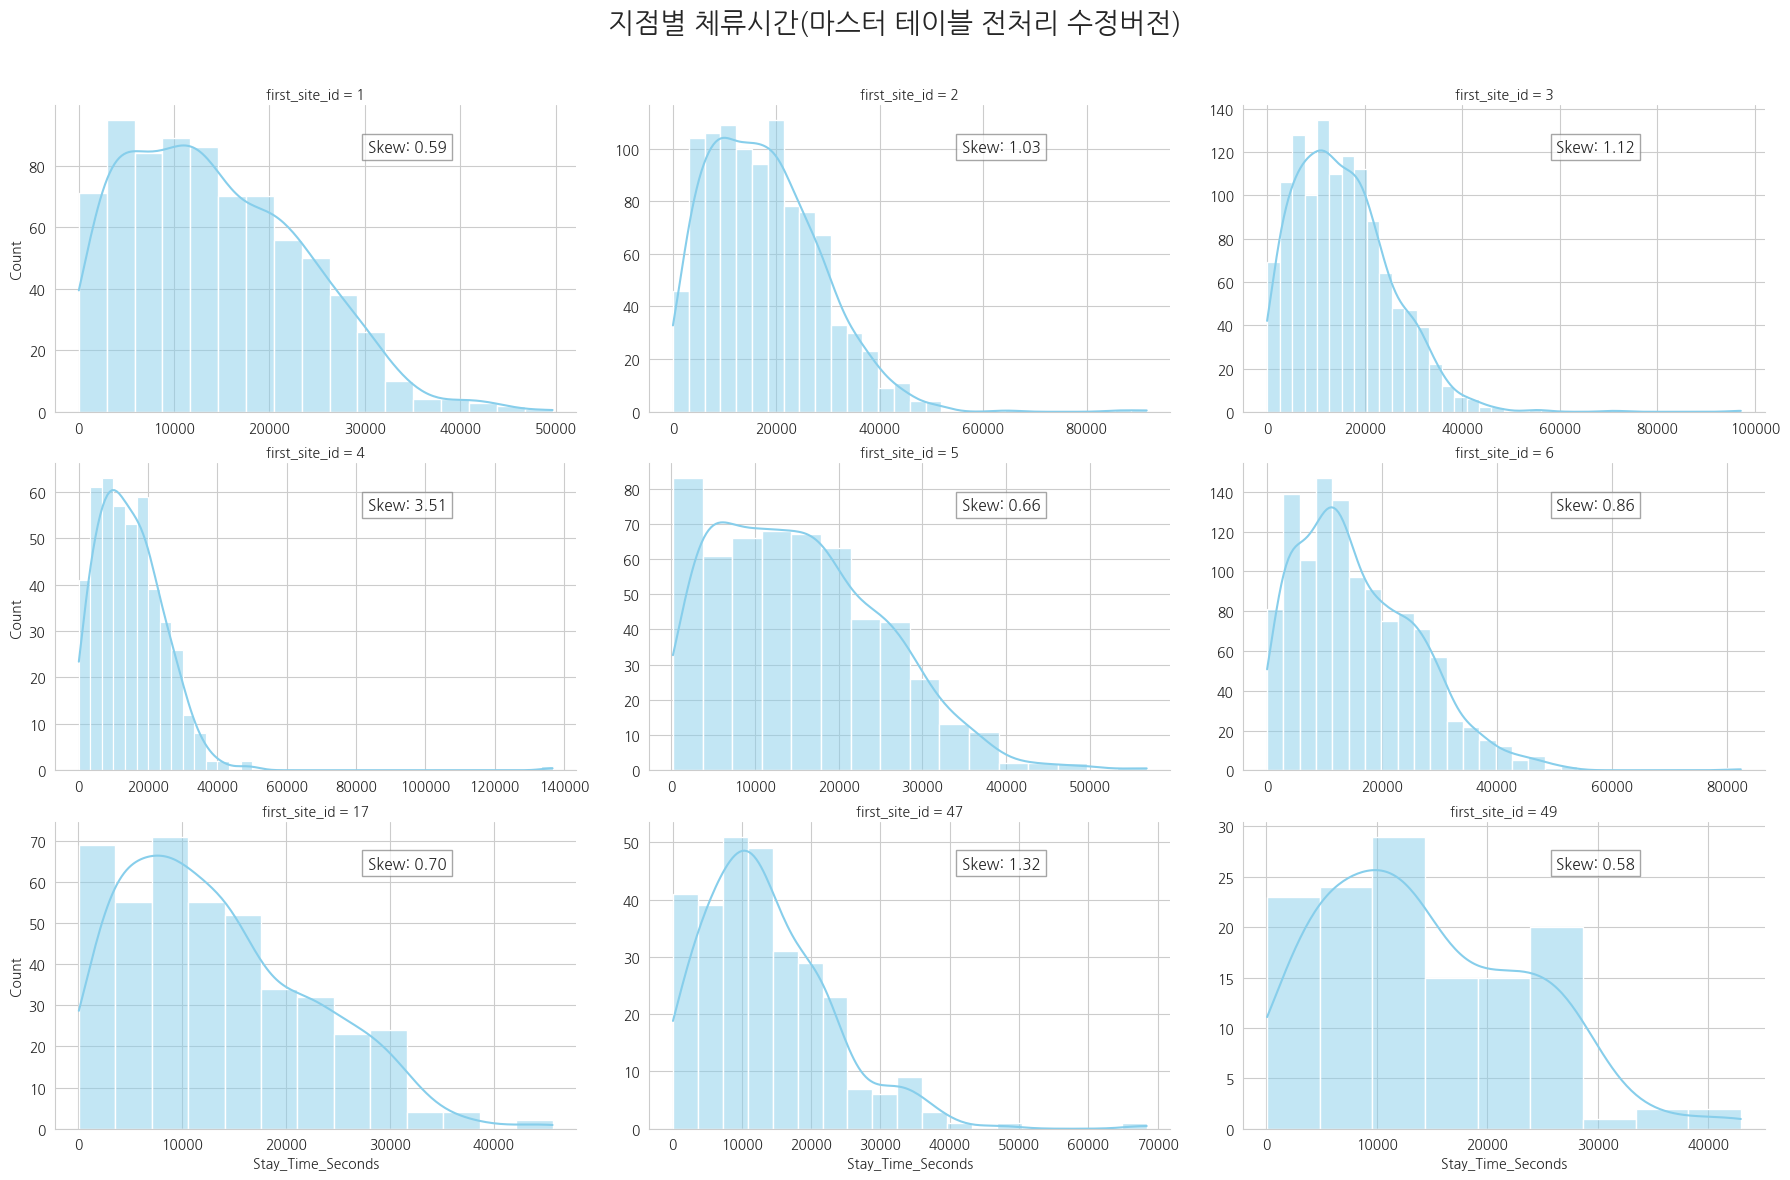

In [ ]:
# 3. 데이터 필터링 (방문자가 많은 상위 9개 지점만 선택)
# 모든 지점을 다 그리면 너무 작아서 안 보이므로, 데이터가 많은 Top 9만 그립니다.
top_sites = user_master_modify['first_site_id'].value_counts().nlargest(9).index
df_top = user_master_modify[user_master_modify['first_site_id'].isin(top_sites)]

# 4. 왜도 표시를 위한 사용자 정의 함수
def annotate_skewness(x, **kwargs):
    ax = plt.gca() # 현재 그려지고 있는 그래프 축 가져오기
    if len(x) > 0:
        skew_val = x.skew()
        # 그래프 우측 상단에 텍스트 넣기
        ax.text(0.6, 0.85, f'Skew: {skew_val:.2f}', transform=ax.transAxes,
                fontsize=11, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

# 5. FacetGrid 그리기 (핵심: 지점별로 그래프 쪼개기)
# col="first_site_id": 지점 아이디별로 컬럼 나누기
# col_wrap=3: 한 줄에 3개씩 그리기
g = sns.FacetGrid(df_top, col="first_site_id", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# (1) 히스토그램 + KDE 곡선 그리기
g.map(sns.histplot, "day1_stay_sec", kde=True, color='skyblue')

# (2) 왜도 텍스트 추가하기
g.map(annotate_skewness, "day1_stay_sec")

# 6. 전체 제목 및 라벨 설정
g.set_axis_labels("Stay_Time_Seconds", "Count")
g.fig.subplots_adjust(top=0.9) # 제목 들어갈 공간 확보
g.fig.suptitle('지점별 체류시간(마스터 테이블 전처리 수정버전)', fontsize=20, fontweight='bold')

plt.show()

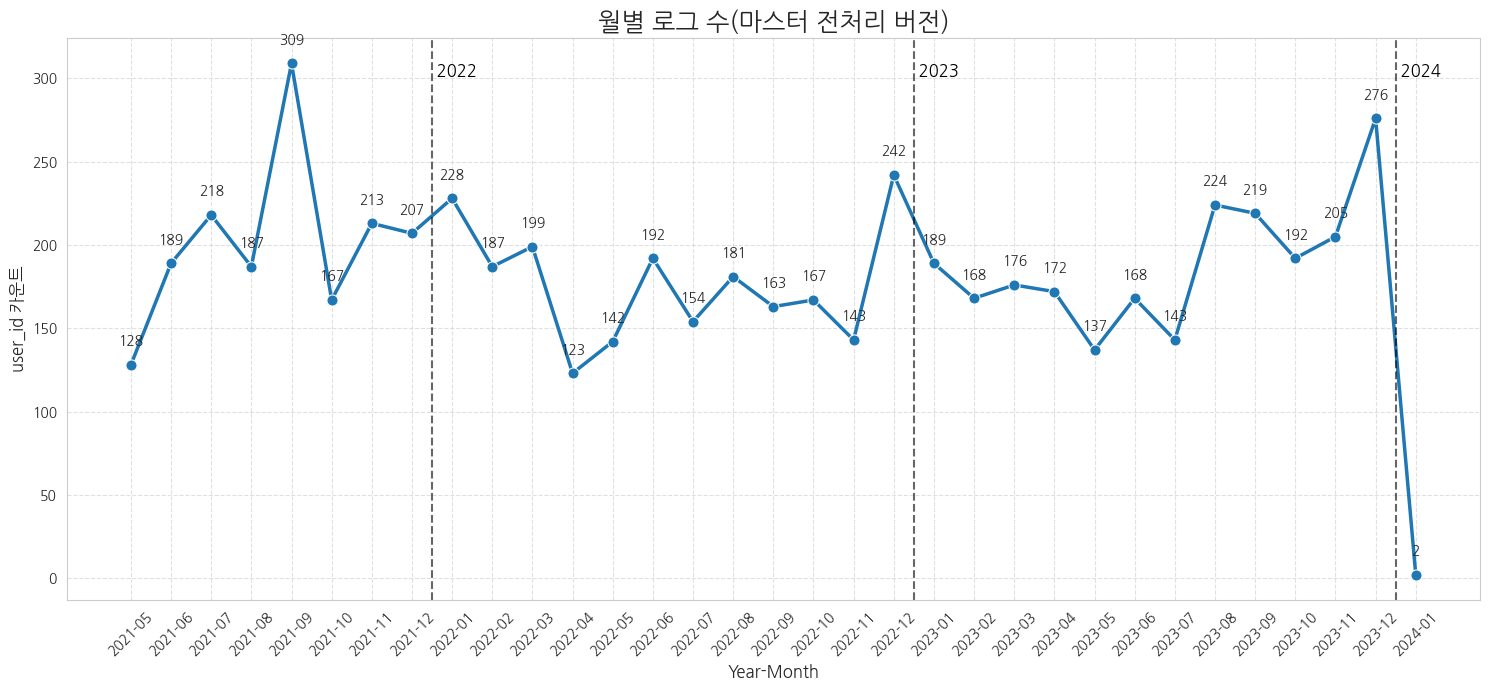


[연-월별 방문자 수]
year_month
2021-05    128
2021-06    189
2021-07    218
2021-08    187
2021-09    309
2021-10    167
2021-11    213
2021-12    207
2022-01    228
2022-02    187
2022-03    199
2022-04    123
2022-05    142
2022-06    192
2022-07    154
2022-08    181
2022-09    163
2022-10    167
2022-11    143
2022-12    242
2023-01    189
2023-02    168
2023-03    176
2023-04    172
2023-05    137
2023-06    168
2023-07    143
2023-08    224
2023-09    219
2023-10    192
2023-11    205
2023-12    276
2024-01      2
dtype: int64


In [ ]:
# 2. 날짜 데이터 전처리
# 'day1_first' 컬럼을 날짜 형식(datetime)으로 변환합니다.
user_master_modify['visit_date'] = pd.to_datetime(user_master_modify['day1_first'])

# 1900년 같은 이상한 날짜가 섞여 있을 경우를 대비해 2000년 이후 데이터만 남깁니다. (노이즈 제거)
user_master_modify = user_master_modify[user_master_modify['visit_date'].dt.year > 2000]

# 3. '연-월' 컬럼 생성
# 예: 2023-09-05 -> '2023-09' 형태로 변환
user_master_modify['year_month'] = user_master_modify['visit_date'].dt.strftime('%Y-%m')

# 4. 데이터 집계 (월별 방문자 수 카운트)
monthly_counts = user_master_modify.groupby('year_month').size().sort_index()

# 5. 시각화 (Line Chart with Markers)
plt.figure(figsize=(15, 7))

# 선 그래프 그리기 (marker='o' : 데이터 위치에 동그라미 표시)
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values,
             marker='o',  linewidth=2.5, markersize=8)

plt.title('월별 로그 수(마스터 전처리 버전)', fontsize=18)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('user_id 카운트', fontsize=12)

# (2) 연도 구분선 긋기 (핵심 로직)
# X축 라벨(날짜 문자열)을 하나씩 확인하면서, '01월'인 지점을 찾습니다.
for i, date_str in enumerate(monthly_counts.index):
    if date_str.endswith('-01'): # 예: '2022-01' 처럼 1월로 끝나는 경우
        # x좌표 i에서 0.5를 뺀 위치(이전 달과 1월 사이)에 선을 긋습니다.
        plt.axvline(x=i - 0.5, color='black', linestyle='--', alpha=0.6)

        # 선 옆에 '202X년' 이라고 글씨도 써줍니다.
        year_label = date_str.split('-')[0] # '2022' 추출
        plt.text(x=i - 0.5, y=monthly_counts.max(), s=f' {year_label} ',
                 color='black', fontsize=12, fontweight='bold', ha='left', va='top')

# X축 라벨이 겹치지 않게 45도 회전
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# 각 점 위에 숫자 표시 (데이터 라벨링)
for x, y in zip(monthly_counts.index, monthly_counts.values):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 6. 표로 데이터 확인
print("\n[연-월별 방문자 수]")
print(monthly_counts)

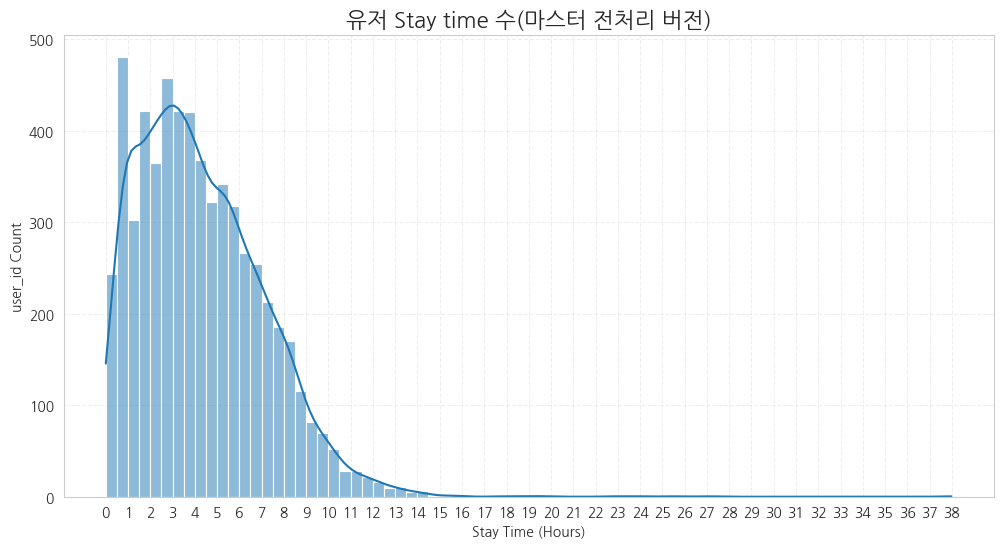


[시간 단위 체류시간 통계]
count    6010.00
mean        4.29
std         2.83
min         0.00
25%         2.06
50%         3.88
75%         6.08
max        37.97
Name: day1_stay_hour, dtype: float64


In [ ]:
df_masters = user_master_modify.copy()
# 2. 시간 데이터 전처리 (시간 단위로 변환)
# 초(Seconds)로 바꾼 뒤 3600으로 나누어 '시간(Hours)' 실수형을 만듭니다.
def time_to_hours(t_str):
    if pd.isna(t_str) or t_str == '00:00:00':
        return 0
    try:
        h, m, s = map(int, t_str.split(':'))
        return h + (m / 60) + (s / 3600)
    except:
        return 0

df_masters['day1_stay_hour'] = df_masters['day1_staytime'].apply(time_to_hours)

# 3. 왜도(Skewness) 계산
skew_val = df_masters['day1_stay_hour'].skew()

# 4. 히스토그램 그리기 (X축이 시간 단위)
plt.figure(figsize=(12, 6))

# binwidth=0.5 : 막대 하나를 '30분(0.5시간)' 간격으로 설정 (조절 가능)
ax = sns.histplot(data=df_masters, x='day1_stay_hour', kde=True,
                  binwidth=0.5)

plt.title('유저 Stay time 수(마스터 전처리 버전)', fontsize=16)
plt.xlabel('Stay Time (Hours)') # X축 라벨 변경
plt.ylabel('user_id Count')

# 5. X축 눈금 설정 (0, 1, 2, 3... 시간 단위로 딱 떨어지게)
# 데이터의 최대 시간까지 1시간 간격으로 눈금을 찍습니다.
max_hour = int(df_masters['day1_stay_hour'].max())
plt.xticks(range(0, max_hour + 2, 1))


plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 7. 요약 통계 출력
print("\n[시간 단위 체류시간 통계]")
print(df_masters['day1_stay_hour'].describe().round(2))

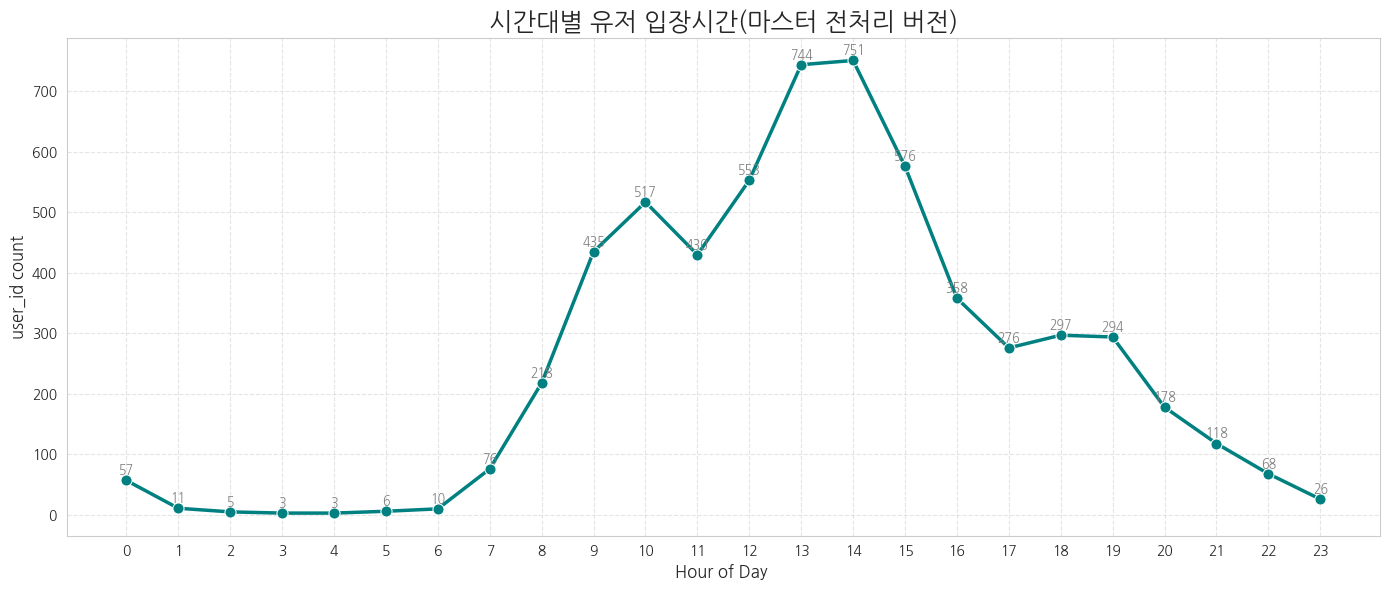


[시간대별 입장 인원 Top 5]
exit_hour
14    751
13    744
15    576
12    553
10    517
Name: count, dtype: int64


In [ ]:
# 2. 시간 데이터 전처리
# day1_last(마지막 접속 시간)를 날짜 형식으로 변환
user_master_modify['first_time'] = pd.to_datetime(user_master_modify['day1_first'])

# 1900년 데이터(방문 기록 없음) 제거 (유효한 방문만 분석)
user_master_modify = user_master_modify[user_master_modify['first_time'].dt.year > 2000]

# '시(Hour)' 정보만 추출 (0 ~ 23)
user_master_modify['exit_hour'] = user_master_modify['first_time'].dt.hour

# 3. 데이터 집계 (시간대별 퇴장 인원 카운트)
hourly_counts = user_master_modify['exit_hour'].value_counts().sort_index()

# 4. 시각화
plt.figure(figsize=(14, 6))

# (1) 꺾은선 그래프 그리기 (흐름을 보여주기 위함)
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values,
             marker='o', markersize=8, linewidth=2.5, color='teal')

# (2) 그래프 꾸미기
plt.title('시간대별 유저 입장시간(마스터 전처리 버전)', fontsize=18)
plt.xlabel('Hour of Day ', fontsize=12)
plt.ylabel('user_id count', fontsize=12)

# X축 눈금을 0시부터 23시까지 모두 표시
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

# (3) [핵심] 가장 퇴장이 많은 시간(Peak Time) 강조하기
peak_hour = hourly_counts.idxmax()      # 가장 카운트가 높은 시간
peak_count = hourly_counts.max()        # 그때의 인원 수

# Peak 지점에 빨간색 점 찍기
#plt.plot(peak_hour, peak_count, marker='o', color='red', markersize=12, alpha=0.7)

# Peak 지점에 텍스트 달기 (화살표 포함)
# plt.annotate(f'Peak: {peak_hour}h ({peak_count} users)',
#              xy=(peak_hour, peak_count),
#              xytext=(peak_hour, peak_count + 50),
#              arrowprops=dict(facecolor='red', shrink=0.05),
#              fontsize=12, fontweight='bold', color='red', ha='center')

# 나머지 점들 위에도 작게 숫자 표시
for x, y in zip(hourly_counts.index, hourly_counts.values):
    #if x != peak_hour: # 피크 타임은 이미 크게 표시했으므로 제외
        plt.text(x, y + 5, str(y), ha='center', va='bottom', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

# 5. 표로 데이터 확인
print("\n[시간대별 입장 인원 Top 5]")
print(hourly_counts.sort_values(ascending=False).head(5))

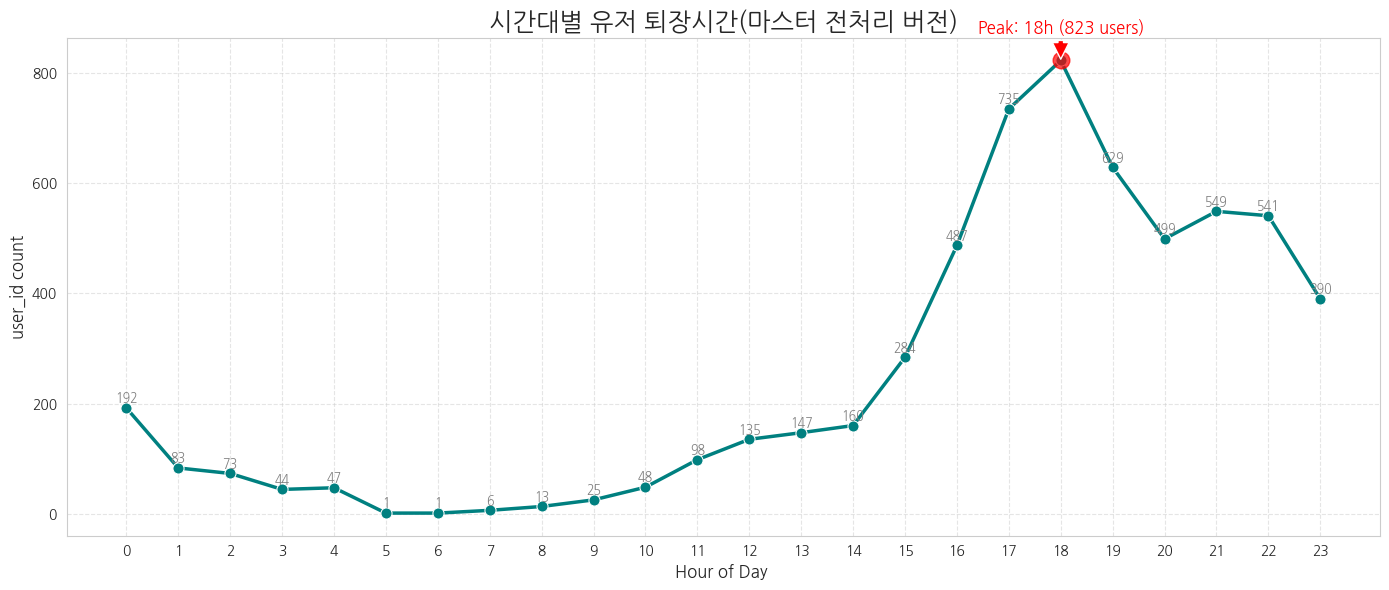


[시간대별 퇴장 인원 Top 5]
exit_hour
18    823
17    735
19    629
21    549
22    541
Name: count, dtype: int64


In [ ]:
# 2. 시간 데이터 전처리
# day1_last(마지막 접속 시간)를 날짜 형식으로 변환
user_master_modify['last_time'] = pd.to_datetime(user_master_modify['day1_last'])

# 1900년 데이터(방문 기록 없음) 제거 (유효한 방문만 분석)
user_master_modify = user_master_modify[user_master_modify['last_time'].dt.year > 2000]

# '시(Hour)' 정보만 추출 (0 ~ 23)
user_master_modify['exit_hour'] = user_master_modify['last_time'].dt.hour

# 3. 데이터 집계 (시간대별 퇴장 인원 카운트)
hourly_counts = user_master_modify['exit_hour'].value_counts().sort_index()

# 4. 시각화
plt.figure(figsize=(14, 6))

# (1) 꺾은선 그래프 그리기 (흐름을 보여주기 위함)
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values,
             marker='o', markersize=8, linewidth=2.5, color='teal')

# (2) 그래프 꾸미기
plt.title('시간대별 유저 퇴장시간(마스터 전처리 버전)', fontsize=18)
plt.xlabel('Hour of Day ', fontsize=12)
plt.ylabel('user_id count', fontsize=12)

# X축 눈금을 0시부터 23시까지 모두 표시
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

# (3) [핵심] 가장 퇴장이 많은 시간(Peak Time) 강조하기
peak_hour = hourly_counts.idxmax()      # 가장 카운트가 높은 시간
peak_count = hourly_counts.max()        # 그때의 인원 수

# Peak 지점에 빨간색 점 찍기
plt.plot(peak_hour, peak_count, marker='o', color='red', markersize=12, alpha=0.7)

# Peak 지점에 텍스트 달기 (화살표 포함)
plt.annotate(f'Peak: {peak_hour}h ({peak_count} users)',
             xy=(peak_hour, peak_count),
             xytext=(peak_hour, peak_count + 50),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, fontweight='bold', color='red', ha='center')

# 나머지 점들 위에도 작게 숫자 표시
for x, y in zip(hourly_counts.index, hourly_counts.values):
    if x != peak_hour: # 피크 타임은 이미 크게 표시했으므로 제외
        plt.text(x, y + 5, str(y), ha='center', va='bottom', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

# 5. 표로 데이터 확인
print("\n[시간대별 퇴장 인원 Top 5]")
print(hourly_counts.sort_values(ascending=False).head(5))

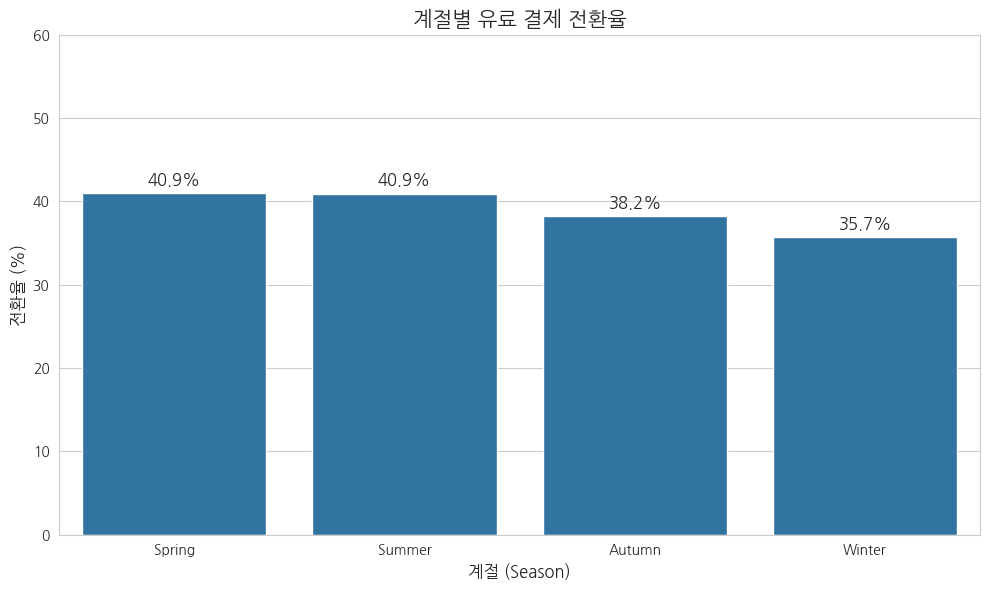

=== 계절별 유료 전환율 (%) ===
season
Spring    40.947075
Summer    40.942029
Autumn    38.188976
Winter    35.690460
Name: is_payment, dtype: float64

=== 계절별 방문 유저 수 ===
season
Spring    1077
Summer    1656
Autumn    1778
Winter    1499
Name: count, dtype: int64


In [ ]:

final_master = user_master_modify.copy()


# [Step 2] 전처리: 날짜에서 '계절(Season)' 정보 추출
# 1. 날짜형으로 변환 (에러 방지)
final_master['day1_first'] = pd.to_datetime(final_master['day1_first'], errors='coerce')

# 2. 월(Month)을 계절로 매핑하는 함수 정의
def get_season(date):
    if pd.isnull(date):
        return None
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'  # 봄
    elif month in [6, 7, 8]:
        return 'Summer'  # 여름
    elif month in [9, 10, 11]:
        return 'Autumn'  # 가을
    else:
        return 'Winter'  # 겨울 (12, 1, 2월)

# 3. 함수 적용 -> 'season' 컬럼 생성
final_master['season'] = final_master['day1_first'].apply(get_season)

# [Step 3] 계절별 전환율 계산
# 보고서 흐름에 맞게 봄 -> 겨울 순서로 정렬
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
conversion_rate = final_master.groupby('season')['is_payment'].mean().reindex(season_order) * 100


plt.figure(figsize=(10, 6))

# 그래프 그리기 (Set2 팔레트로 부드러운 색감 적용)
ax = sns.barplot(x=conversion_rate.index, y=conversion_rate.values)

# 제목 및 라벨 설정
plt.title('계절별 유료 결제 전환율', fontsize=15, fontweight='bold')
plt.xlabel('계절 (Season)', fontsize=12)
plt.ylabel('전환율 (%)', fontsize=12)
plt.ylim(0, 60) # y축 높이 조절 (여유 있게)

# 막대 위에 정확한 수치(%) 표시
for i, v in enumerate(conversion_rate.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# [Bonus] 실제 수치 확인
print("=== 계절별 유료 전환율 (%) ===")
print(conversion_rate)
print("\n=== 계절별 방문 유저 수 ===")
print(final_master['season'].value_counts().reindex(season_order))

## 모델링

###Ⅰ. 베이스 모델 만들기(로지스틱 회귀)

In [ ]:
# 드라이브 경로 지정(이거 알맞게 설정해주시면, 실행하는데에 문제없을겁니다!)
file_path = '/content/drive/MyDrive/DA_09_파트3_3팀 프로젝트/csv/edit_data/'

In [ ]:
# 최종 전처리 완료된 데이터 불러오기
master_raw = pd.read_csv(file_path + 'user_master(전처리수정).csv')
master_df = master_raw.copy()

####Ⅰ-ⅰ. 베이스 마스터 테이블 생성

In [ ]:
# 깨끗한 데이터로드
master_df = master_raw.copy()
# 데이터 타입 수정
time_cols = ['day1_first', 'day1_last', 'day2_first', 'day2_last', 'day3_first', 'day3_last']
time_delta_cols = ['day1_staytime', 'day2_staytime','day3_staytime',]

for col in time_cols:
  master_df[col] = pd.to_datetime(master_df[col], format='mixed', errors='coerce')

for col in time_delta_cols:
  master_df[col] = pd.to_timedelta(master_df[col])

for col in time_delta_cols:
  master_df[col] = master_df[col].dt.total_seconds() / 60 # 분 단위로 환산

In [ ]:
master_df.drop(time_cols, axis=1, inplace=True)

In [ ]:
master_df = pd.get_dummies(master_df, columns=['first_site_id'], drop_first=True)

In [ ]:
# bool_cols 전부 0,1로 전환
bool_cols = ['is_payment', 'is_changed_site', 'first_site_id_2',	'first_site_id_3',	'first_site_id_4',	'first_site_id_5',	'first_site_id_6',	'first_site_id_17',	'first_site_id_47',	'first_site_id_49']
for col in bool_cols:
 master_df[col] = master_df[col].astype(int)


user_uuid  day1_staytime  day1_visit_cnt  \
0  000590dc-046f-462b-8225-4c81a97b7166     356.950000               3   
1  000be14f-ba0f-4af6-bc2c-7b00dfcbc98c     170.366667               7   
2  0018e22d-a2cc-4e06-bca2-d6a041770f3b     715.000000               6   
3  002606d9-38ca-48f3-910c-cbfada9a9109     211.483333               2   
4  002a7570-90dd-4cab-b0aa-b0e40f7ef27a     312.033333               5   

   day1_attended  day2_staytime  day2_visit_cnt  day2_attended  day3_staytime  \
0              1       0.000000               0              0            0.0   
1              1     156.366667               2              1            0.0   
2              1     574.533333               2              1            0.0   
3              1     205.566667               2              1            0.0   
4              1       0.000000               0              0            0.0   

   day3_visit_cnt  day3_attended  is_changed_site  is_payment  \
0               0              0                0           0   
1               0              0                0           1   
2               0              0                0           0   
3               0              0                0           0   
4               0              0                0           1   

   first_site_id_2  first_site_id_3  first_site_id_4  first_site_id_5  \
0                0                0                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                1   

   first_site_id_6  first_site_id_17  first_site_id_47  first_site_id_49  
0                1                 0                 0                 0  
1                0                 0                 0                 0  
2                1                 0                 0                 0  
3                0                 1                 0                 0  
4                0                 0                 0                 0

In [ ]:
# 컬럼 순서 정렬
master_df_order = ['user_uuid', 'day1_staytime', 'day1_visit_cnt', 'day1_attended',
       'day2_staytime', 'day2_visit_cnt', 'day2_attended', 'day3_staytime',
       'day3_visit_cnt', 'day3_attended', 'is_changed_site', 'first_site_id_2',
       'first_site_id_3', 'first_site_id_4', 'first_site_id_5',
       'first_site_id_6', 'first_site_id_17', 'first_site_id_47', 'first_site_id_49', 'is_payment']

In [ ]:
master_df = master_df[master_df_order]

In [ ]:
# base_master_df.csv 저장
# master_df.to_csv('/content/drive/MyDrive/DA_09_파트3_3팀 프로젝트/csv/edit_data/base_master_df.csv', index=False)

####Ⅰ-ⅱ. 모델링 진행(로지스틱 회귀)

In [ ]:
base_master_df_raw = pd.read_csv('/content/drive/MyDrive/DA_09_파트3_3팀 프로젝트/csv/edit_data/base_master_df.csv')
base_master_df = base_master_df_raw.copy()

In [ ]:
# user_uuid, is_payment 분리
X = base_master_df.drop(['user_uuid','is_payment'], axis=1)
y = base_master_df['is_payment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # stratify=y 추가: y의 클래스 비율을 유지하며 분할
)

In [ ]:
scaler = StandardScaler()
num_cols = ['day1_staytime', 'day2_staytime', 'day3_staytime']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

Accuracy: 0.6198830409356725
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.91      0.75       732
           1       0.54      0.16      0.25       465

    accuracy                           0.62      1197
   macro avg       0.58      0.54      0.50      1197
weighted avg       0.59      0.62      0.55      1197



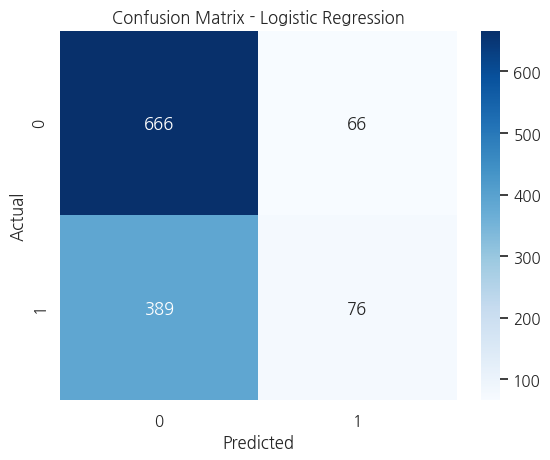

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_lr = lr_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix 저장
cm_lr = confusion_matrix(y_test, y_pred_lr)

# 피쳐 중요도 저장
importance = abs(lr_model.coef_)
importance_df = pd.DataFrame({"feature": X.columns, "importance": importance[0]})
importance_df_sorted = importance_df.sort_values("importance", ascending=False)  # 막대가 아래에서 위로 정렬되게

# 예측 확률 가져오기 (양성 클래스 확률)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # fpr, tpr 가져오기
auc_score = roc_auc_score(y_test, y_pred_proba) # roc-auc 가져오기

/tmp/ipython-input-3303620732.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


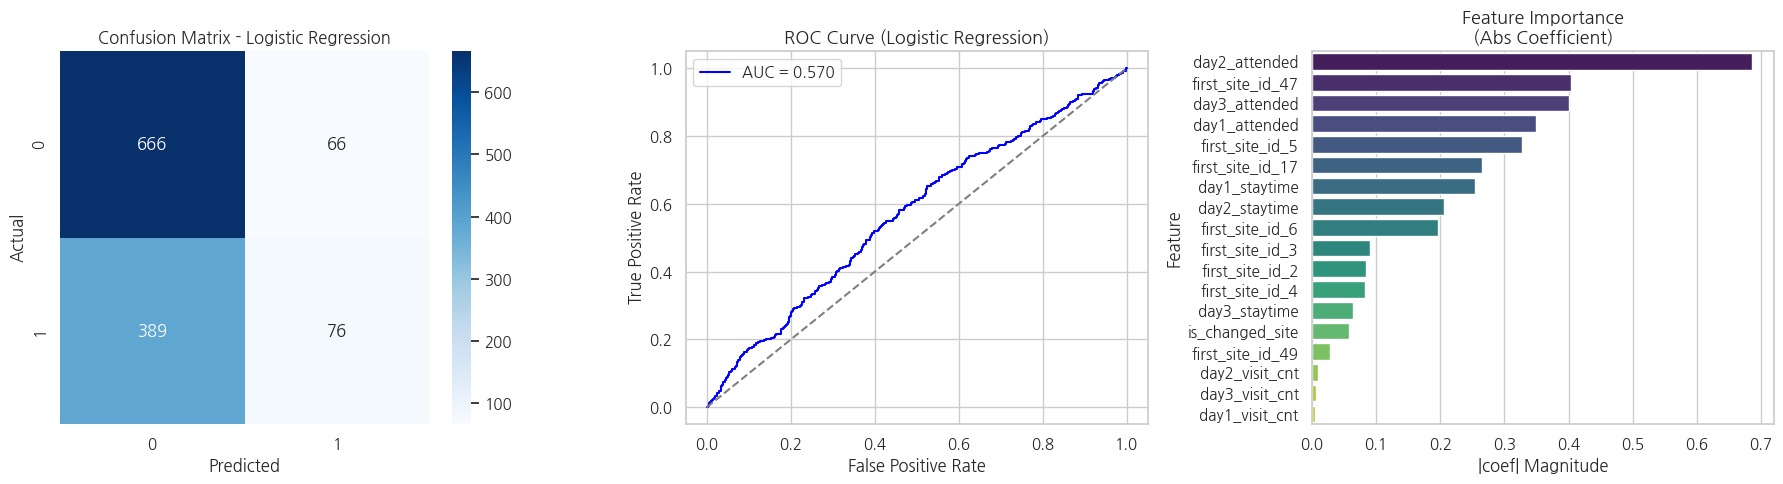

In [ ]:
# 시각화 모아 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1행 3열

# ---------------------------------------------------
# 1) Confusion Matrix
# ---------------------------------------------------
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# ---------------------------------------------------
# 2) ROC Curve
# ---------------------------------------------------
axes[1].plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("ROC Curve (Logistic Regression)", fontsize=13)
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()
axes[1].grid(True)



# ---------------------------------------------------
# 3) Feature Importance
# ---------------------------------------------------
sns.barplot(
    data=importance_df_sorted,
    x="importance",
    y="feature",
    palette="viridis",
    ax=axes[2]
)
axes[2].set_title("Feature Importance\n(Abs Coefficient)", fontsize=13)
axes[2].set_xlabel("|coef| Magnitude")
axes[2].set_ylabel("Feature")

# layout 정돈
plt.tight_layout()
plt.show()

####Ⅰ- ⅲ. 모델링 진행(4가지 앙상블)

In [ ]:
def run_basic_ensemble_models(X_train_scaled, X_test_scaled, y_train, y_test, feature_names):
    """
    기본 하이퍼파라미터(+ random_state=42)로
    RandomForest, AdaBoost, XGBoost, LightGBM 4개 모델을 학습/평가/시각화하는 함수
    """

    models = {
        "RandomForest": RandomForestClassifier(
            random_state=42
        ),
        "AdaBoost": AdaBoostClassifier(
            random_state=42
        ),
        "XGBoost": xgb.XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            use_label_encoder=False,
            random_state=42
        ),
        "LightGBM": lgb.LGBMClassifier(
            random_state=42
        ),
    }

    for name, model in models.items():
        print("=" * 80)
        print(f"[{name}] 기본 모델 학습 및 평가")
        print("=" * 80)

        # 1. 학습
        model.fit(X_train_scaled, y_train)

        # 2. 예측
        y_pred = model.predict(X_test_scaled)

        # 3. 예측 확률 (ROC-AUC용)
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            # 혹시라도 predict_proba가 없는 경우 대비 (여기서는 거의 안 쓰일 것)
            y_pred_proba = model.decision_function(X_test_scaled)
            y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min() + 1e-9)

        # 4. 지표 계산
        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred_proba)

        print(f"Accuracy : {acc:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"F1 Score : {f1:.4f}")
        print(f"ROC-AUC  : {auc_score:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # 5. 혼동행렬
        cm = confusion_matrix(y_test, y_pred)

        # 6. ROC Curve 좌표
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

        # 7. 피처 중요도
        importance_df_sorted = None
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
            importance_df = pd.DataFrame({
                "feature": feature_names,
                "importance": importances
            })
            importance_df_sorted = importance_df.sort_values("importance", ascending=False)
        else:
            print(f"[{name}] feature_importances_ 속성이 없어 중요도 그래프는 생략합니다.\n")

        # 8. 시각화 (1행 3열: Confusion, ROC, Feature Importance)
        fig, axes = plt.subplots(1, 3, figsize=(20, 5))

        # (1) Confusion Matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
        axes[0].set_title(f"Confusion Matrix - {name}")
        axes[0].set_xlabel("Predicted")
        axes[0].set_ylabel("Actual")

        # (2) ROC Curve
        axes[1].plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
        axes[1].plot([0, 1], [0, 1], linestyle="--", color="gray")
        axes[1].set_title(f"ROC Curve - {name}")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend()
        axes[1].grid(True)

        # (3) Feature Importance
        if importance_df_sorted is not None:
            # 너무 많으면 상위 20개 정도만
            top_k = 20 if importance_df_sorted.shape[0] > 20 else importance_df_sorted.shape[0]
            sns.barplot(
                data=importance_df_sorted.head(top_k),
                x="importance",
                y="feature",
                palette="viridis",
                ax=axes[2]
            )
            axes[2].set_title(f"Feature Importance - {name}\n(Top {top_k})")
            axes[2].set_xlabel("Importance")
            axes[2].set_ylabel("Feature")
        else:
            axes[2].axis("off")
            axes[2].set_title("No feature_importances_ available")

        plt.tight_layout()
        plt.show()

[RandomForest] 기본 모델 학습 및 평가
Accuracy : 0.5739
Recall   : 0.3570
F1 Score : 0.3943
ROC-AUC  : 0.5535

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       732
           1       0.44      0.36      0.39       465

    accuracy                           0.57      1197
   macro avg       0.54      0.53      0.53      1197
weighted avg       0.56      0.57      0.56      1197



/tmp/ipython-input-2063590073.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


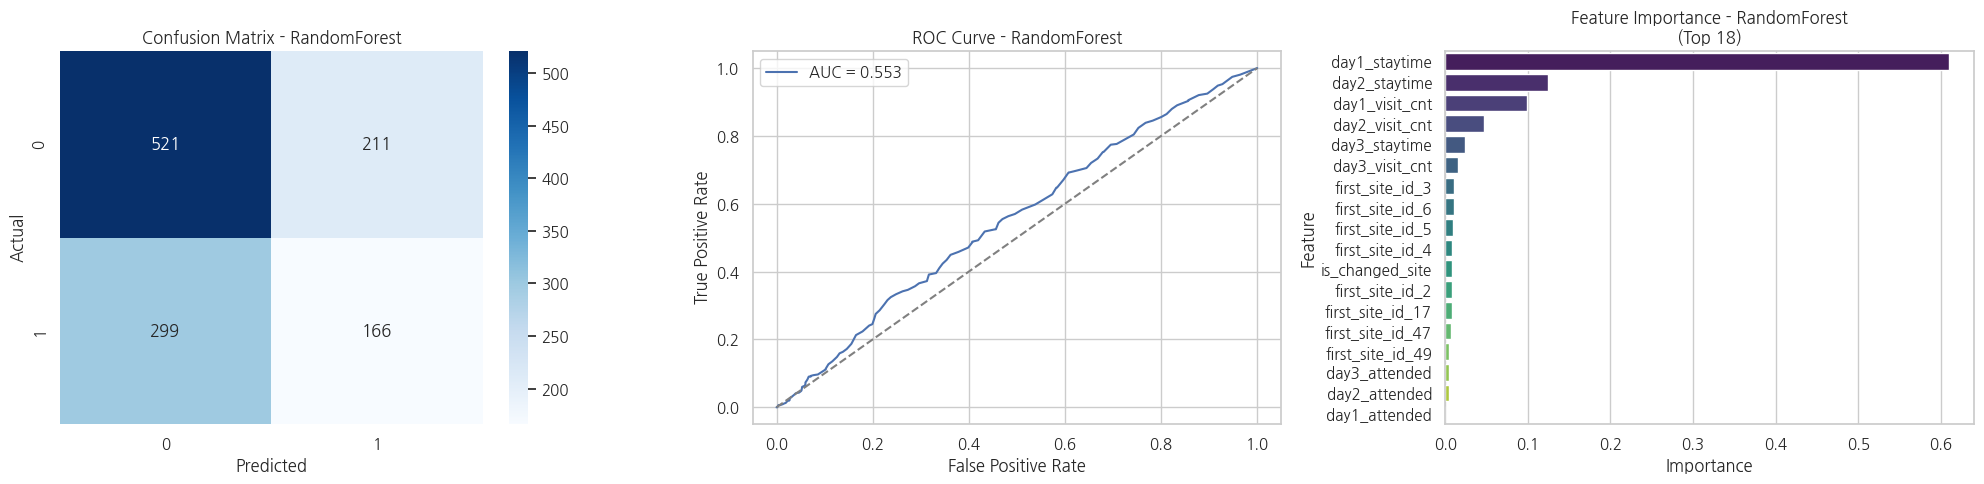

[AdaBoost] 기본 모델 학습 및 평가
Accuracy : 0.6257
Recall   : 0.1441
F1 Score : 0.2302
ROC-AUC  : 0.5601

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       732
           1       0.57      0.14      0.23       465

    accuracy                           0.63      1197
   macro avg       0.60      0.54      0.49      1197
weighted avg       0.61      0.63      0.55      1197



/tmp/ipython-input-2063590073.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


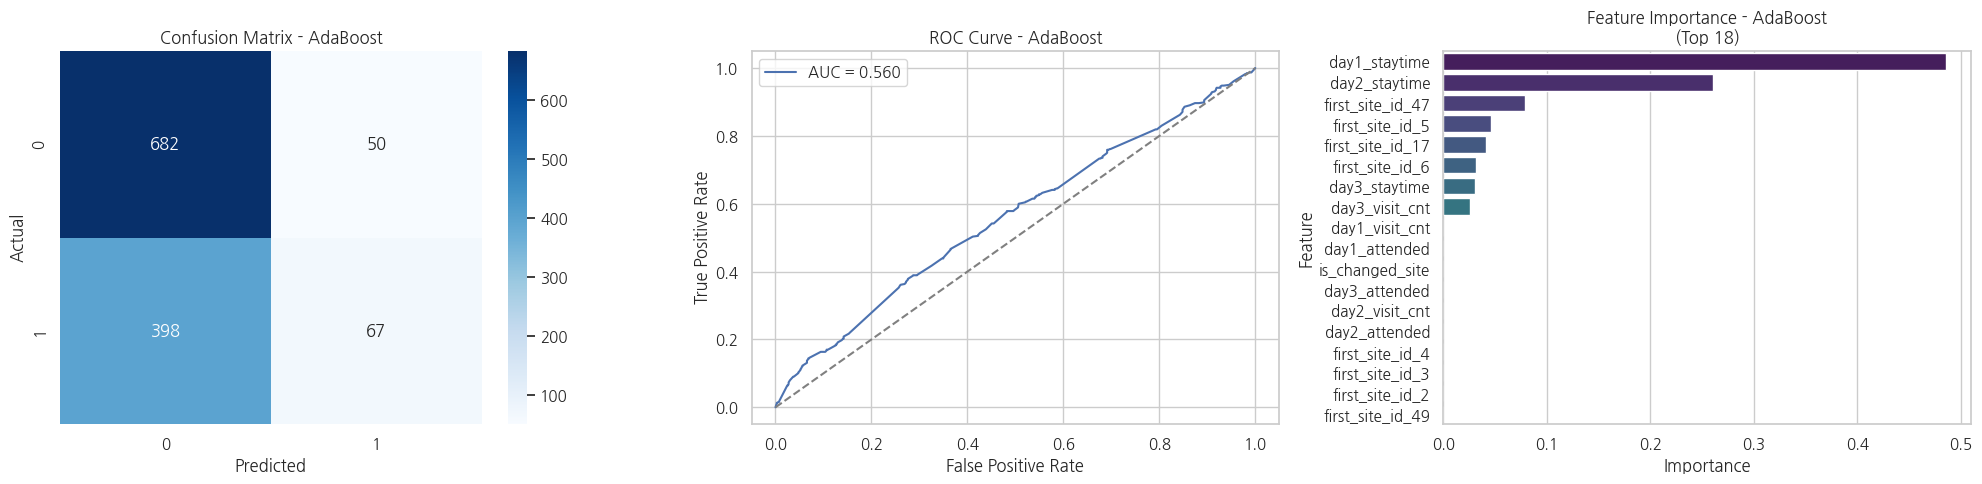

[XGBoost] 기본 모델 학습 및 평가
Accuracy : 0.5856
Recall   : 0.2409
F1 Score : 0.3111
ROC-AUC  : 0.5525

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.80      0.70       732
           1       0.44      0.24      0.31       465

    accuracy                           0.59      1197
   macro avg       0.53      0.52      0.51      1197
weighted avg       0.55      0.59      0.55      1197



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:22:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-2063590073.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


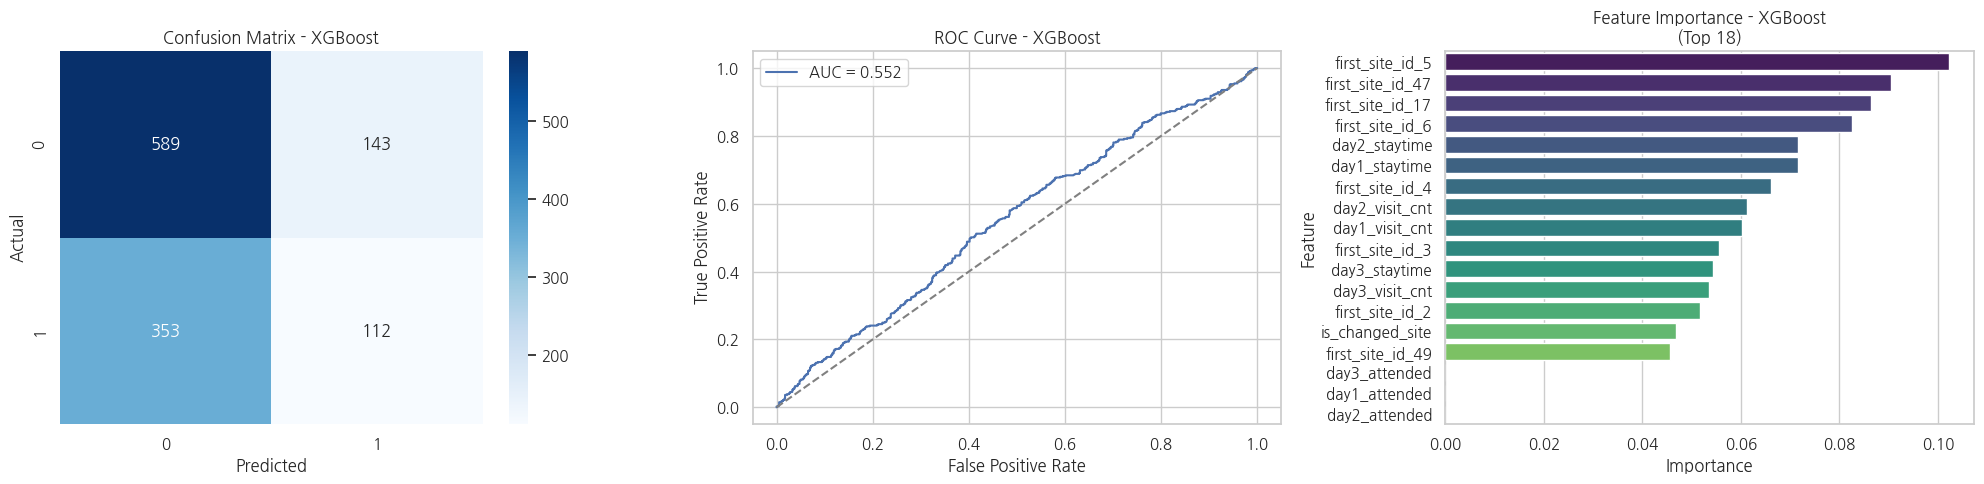

[LightGBM] 기본 모델 학습 및 평가
Accuracy : 0.5873
Recall   : 0.1828
F1 Score : 0.2560
ROC-AUC  : 0.5583

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.84      0.71       732
           1       0.43      0.18      0.26       465

    accuracy                           0.59      1197
   macro avg       0.52      0.51      0.49      1197
weighted avg       0.54      0.59      0.54      1197



/tmp/ipython-input-2063590073.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


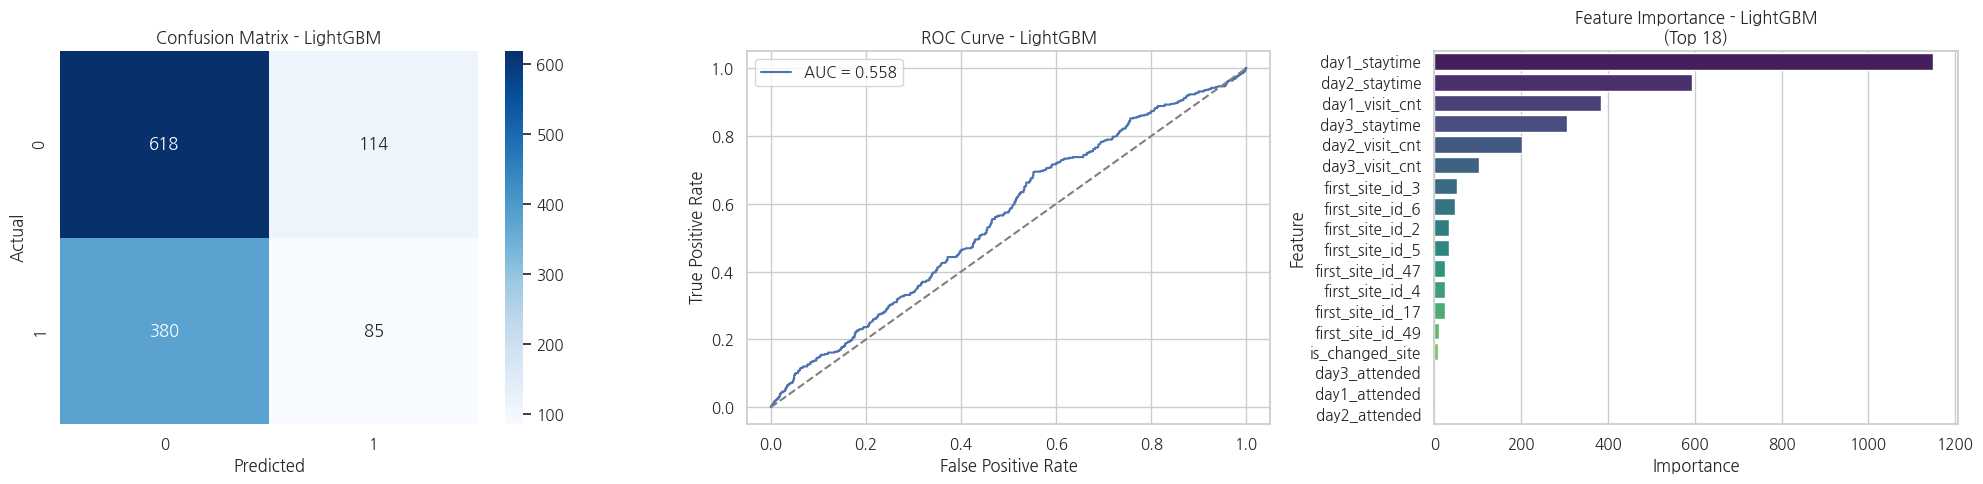

In [ ]:
run_basic_ensemble_models(
    X_train_scaled=X_train_scaled,
    X_test_scaled=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    feature_names=X.columns  # 중요도 시각화에 사용할 컬럼 이름
)

####Ⅰ-ⅳ. 마스터 테이블 v6
- 일자별로 쪼개어져 있는 stay_time, visit_cnt을 합산
- attended를 기준으로 방문 일 수 계산
- stay_time을 방문 일 수로 나누어, 평균 체류 시간을 계산

In [ ]:
# user_master(전처리수정)데이터 활용하여 master_df_v6 만들기
user_master_raw = pd.read_csv(file_path + 'user_master(전처리수정).csv')
master_df_v6 = user_master_raw.copy()

In [ ]:
# 데이터 타입 수정
time_cols = ['day1_first', 'day1_last', 'day2_first', 'day2_last', 'day3_first', 'day3_last']
time_delta_cols = ['day1_staytime', 'day2_staytime','day3_staytime',]

for col in time_cols:
  master_df_v6[col] = pd.to_datetime(master_df_v6[col], format='mixed', errors='coerce')

for col in time_delta_cols:
  master_df_v6[col] = pd.to_timedelta(master_df_v6[col])

for col in time_delta_cols:
  master_df_v6[col] = master_df_v6[col].dt.total_seconds() / 60 # 분 단위로 환산

In [ ]:
# 시간 변수 분할 함수(최종)
def create_time_features_final(df):
  df = df.copy()
  df['year'] = df['day1_first'].dt.year
  df['month'] = df['day1_first'].dt.month
  df['hour'] = df['day1_first'].dt.hour
  df['dayofweek'] = df['day1_first'].dt.dayofweek # 요일 구분, 월요일부터 0 - 6 까지
  df['season'] = df['month'].apply(
      lambda m:
          0 if 3 <= m <= 5 else
          1 if 6 <= m <= 8 else
          2 if 9 <= m <= 11 else
          3  # 겨울 (12,1,2)
          )
  df['timeofday'] = df['hour'].apply(
      lambda h:
        'early_morning' if 0 <= h < 6 else # 새벽
        'morning_commute' if 6 <= h < 9 else # 출근 시간
        'morning_work' if 9 <= h < 12 else # 오전 업무 시간
        'afternoon_work' if 12 <= h < 17 else # 오후 업무 시간
        'evening_commute' if 17 <= h < 19 else # 퇴근 시간
        'evening' if 19 <= h < 21 else # 저녁
        'night'  # 밤(21, 22, 23)
      )

  return df
def feature_engineering_final(df):
    df = df.copy()

    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
    df['season_sin'] = np.sin(2 * np.pi * df['season'] / 4)
    df['season_cos'] = np.cos(2 * np.pi * df['season'] / 4)

    return df

In [ ]:
# 시간대 분할 함수 적용
master_df_v6 = create_time_features_final(master_df_v6)
master_df_v6 = feature_engineering_final(master_df_v6)

In [ ]:
# 시간대('timeofday') 원-핫 인코딩
master_df_v6 = pd.get_dummies(master_df_v6, columns=['timeofday'], drop_first=True)

In [ ]:
# boolean형태 자료형 0, 1로 전환
bool_cols = ['timeofday_early_morning', 'timeofday_evening', 'timeofday_evening_commute', 'timeofday_morning_commute', 'timeofday_morning_work','timeofday_night']
for col in bool_cols:
 master_df_v6[col] = master_df_v6[col].astype(int)

In [ ]:
# 일자별로 데이터 합산
master_df_v6['stay_time'] = master_df_v6['day1_staytime'] + master_df_v6['day2_staytime'] + master_df_v6['day3_staytime']
master_df_v6['visit_cnt'] = master_df_v6['day1_visit_cnt'] + master_df_v6['day2_visit_cnt'] + master_df_v6['day3_visit_cnt']
master_df_v6['visit_days'] = master_df_v6['day1_attended'] + master_df_v6['day2_attended'] + master_df_v6['day3_attended']
master_df_v6['avg_stay_time'] = round((master_df_v6['stay_time'] / master_df_v6['visit_days']), 3)
master_df_v6['avg_visit_cnt'] = round((master_df_v6['visit_cnt'] / master_df_v6['visit_days']), 3)

In [ ]:
# 컬럼 순서 정렬
master_df_v6_order = ['user_uuid', 'season', 'month', 'hour', 'timeofday_early_morning',
       'timeofday_evening', 'timeofday_evening_commute', 'timeofday_morning_commute', 'timeofday_morning_work',
       'timeofday_night', 'dayofweek', 'season_sin', 'season_cos', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos',
       'dayofweek_sin', 'dayofweek_cos', 'visit_days', 'avg_stay_time', 'avg_visit_cnt', 'is_payment']
master_df_v6 = master_df_v6[master_df_v6_order]

In [ ]:
# master_df_v6 저장
# master_df_v6.to_csv('/content/drive/MyDrive/DA_09_파트3_3팀 프로젝트/csv/edit_data/master_df_v6.csv', index=False)

####Ⅰ-ⅴ. 마스터 테이블 v6를 활용한 선형회귀 모델

Accuracy: 0.6279
Recall: 0.1738
F1 Score: 0.2662
ROC-AUC: 0.5975

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75      3660
           1       0.57      0.17      0.27      2325

    accuracy                           0.63      5985
   macro avg       0.60      0.55      0.51      5985
weighted avg       0.61      0.63      0.56      5985



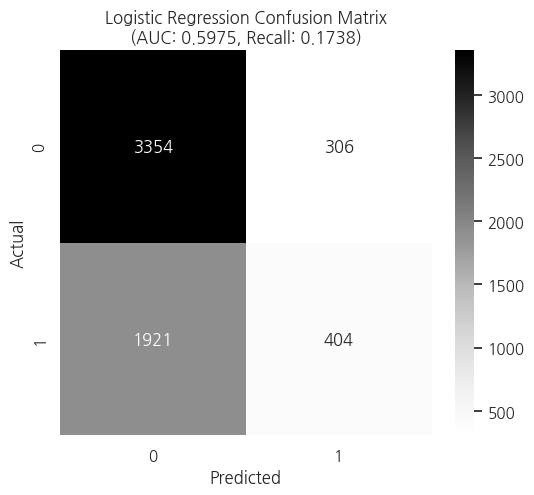

/tmp/ipython-input-1700062884.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(20), x="importance", y="feature", palette="viridis")


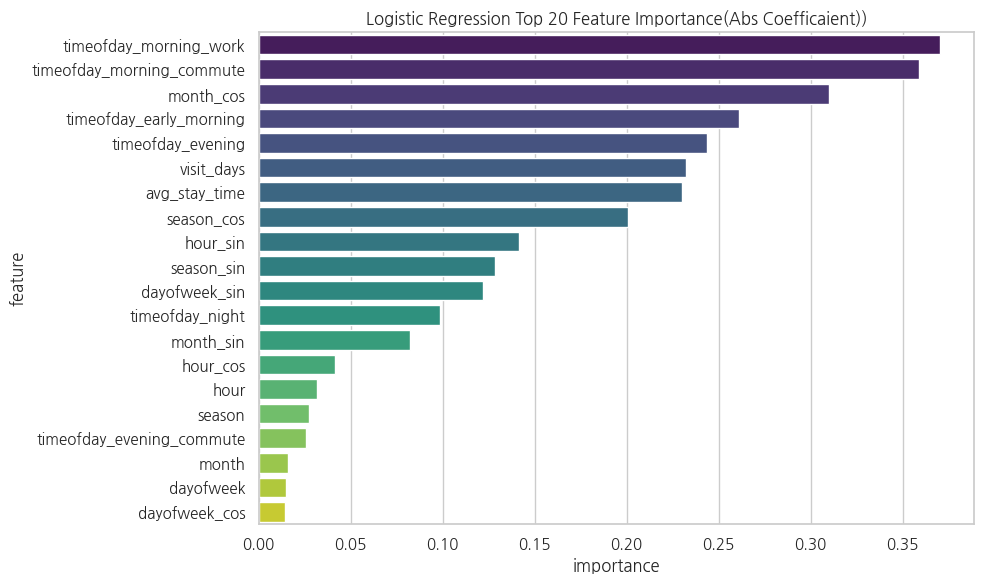

In [ ]:
# ============================================
# 1. 데이터 분리 없이 X, y 준비
# ============================================
X = master_df_v6.drop(['user_uuid','is_payment'], axis=1)
y = master_df_v6['is_payment']

# ============================================
# 2. StandardScaler 적용 (수치형 변수만)
# ============================================
scaler = StandardScaler()
num_cols = ['visit_days', 'avg_stay_time', 'avg_visit_cnt']

X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

# ============================================
# 3. Logistic Regression 모델 정의
# ============================================
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# ============================================
# 4. Stratified K-Fold 설정
# ============================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ============================================
# 5. Cross-val predict로 전체 데이터 예측
#    → test_split 없이 전체 데이터에 대해 5-fold 기반 예측
# ============================================
y_pred_proba = cross_val_predict(
    lr_model,
    X_scaled,
    y,
    cv=skf,
    method='predict_proba'
)[:, 1]

y_pred = (y_pred_proba > 0.5).astype(int)

# ============================================
# 6. 평가 지표 출력
# ============================================
print("Accuracy:", round(accuracy_score(y, y_pred), 4))
print("Recall:", round(recall_score(y, y_pred), 4))
print("F1 Score:", round(f1_score(y, y_pred), 4))
print("ROC-AUC:", round(roc_auc_score(y, y_pred_proba), 4))

print("\nClassification Report:\n", classification_report(y, y_pred))

# ============================================
# 7. Confusion Matrix
# ============================================
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.title(f"Logistic Regression Confusion Matrix\n(AUC: {roc_auc_score(y, y_pred_proba):.4f}, Recall: {recall_score(y, y_pred):.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ============================================
# 8. Feature Importance (coef 기반)
# ============================================
lr_model.fit(X_scaled, y)   # coef_ 계산용 (cross_val_predict는 모델을 보관하지 않음)

importance = abs(lr_model.coef_[0])
importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importance
}).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(20), x="importance", y="feature", palette="viridis")
plt.title("Logistic Regression Top 20 Feature Importance(Abs Coefficaient))")
plt.tight_layout()
plt.show()

# # ============================================
# # 9. ROC Curve
# # ============================================
# fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# plt.figure(figsize=(7, 6))
# plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y, y_pred_proba):.3f}", color='blue')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Logistic Regression (5-fold CV)")
# plt.legend()
# plt.grid(True)
# plt.show()

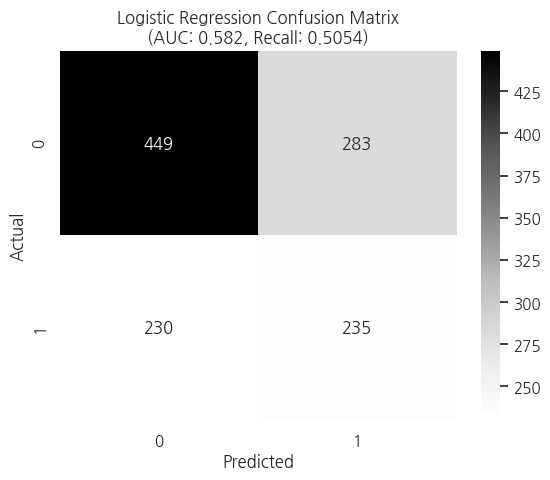

/tmp/ipython-input-2333474213.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


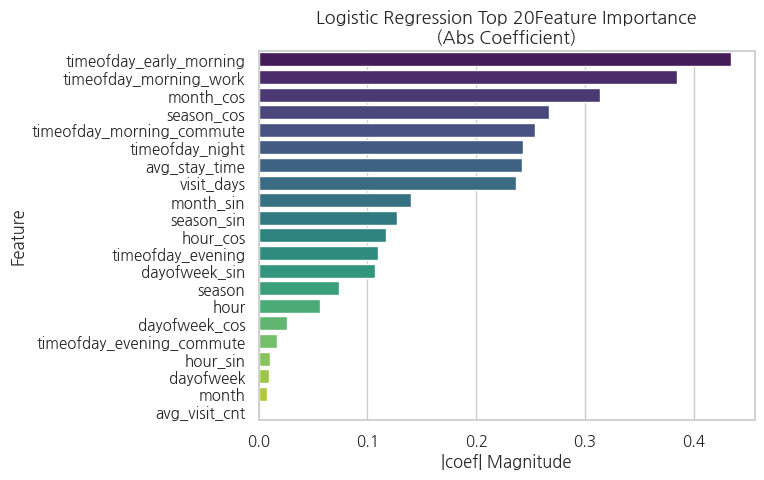

In [ ]:
# 시각화 모아 그리기
# fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1행 3열

# ---------------------------------------------------
# 1) Confusion Matrix
# ---------------------------------------------------
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greys")
plt.title(f"Logistic Regression Confusion Matrix\n(AUC: {auc_score_lr}, Recall: {recall_score_lr})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# ---------------------------------------------------
# 2) ROC Curve
# ---------------------------------------------------
# axes[1].plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", color='blue')
# axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
# axes[1].set_title("ROC Curve (Logistic Regression)", fontsize=13)
# axes[1].set_xlabel("False Positive Rate")
# axes[1].set_ylabel("True Positive Rate")
# axes[1].legend()
# axes[1].grid(True)


# ---------------------------------------------------
# 3) Feature Importance
# ---------------------------------------------------
sns.barplot(
    data=importance_df_sorted,
    x="importance",
    y="feature",
    palette="viridis"
)
plt.title("Logistic Regression Top 20Feature Importance\n(Abs Coefficient)", fontsize=13)
plt.xlabel("|coef| Magnitude")
plt.ylabel("Feature")
plt.show()
# layout 정돈
# plt.tight_layout()
# plt.show()

####Ⅰ-ⅵ. 모델링 돌려보기(master_df_v6, recall)

In [ ]:
# ======================================================================================
# [1] 사용자 설정 (Configuration) - 여기만 바꾸면 됩니다!
# ======================================================================================
class Config:
    # 데이터 경로
    FILE_PATH = file_path + 'master_df_v6.csv'

    # 실행할 모델 리스트 (원하는 것만 남기거나 주석 처리 가능)
    # 옵션: 'xgboost', 'lightgbm', 'randomforest'
    MODELS_TO_RUN = ['randomforest','adaboost', 'xgboost', 'lightgbm']

    # Optuna 최적화 기준 지표 (Scoring Metric)
    # 옵션: 'recall', 'f1', 'roc_auc', 'accuracy'
    TARGET_METRIC = 'recall'

    # Optuna 설정
    N_TRIALS = 50       # 모델당 시도 횟수
    TIMEOUT = 600       # 모델당 제한 시간 (초)
    N_JOBS = -1         # CPU 병렬 처리 (-1: 전체 사용)
    RANDOM_STATE = 42   # 재현성을 위한 시드값

# ======================================================================================
# [2] 데이터 로드 함수
# ======================================================================================
def load_data(filepath):
    print(f"\n[Data Load] Reading file from: {filepath}...")
    df = pd.read_csv(filepath)

    if 'user_uuid' in df.columns:
        df = df.drop(columns=['user_uuid'])

    X = df.drop(columns=['is_payment'])
    y = df['is_payment']

    print(f"[Data Load] Complete. Shape: {X.shape}, Target Distribution: {y.value_counts().to_dict()}")
    return X, y

# ======================================================================================
# [3] 모델별 하이퍼파라미터 정의 함수
# ======================================================================================
def get_model_and_params(trial, model_name):
    if model_name == 'xgboost':
        params = {
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'use_label_encoder': False,
            'random_state': Config.RANDOM_STATE,
            'n_jobs': Config.N_JOBS,
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
        }
        model = xgb.XGBClassifier(**params)

    elif model_name == 'lightgbm':
        params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'verbosity': -1,
            'random_state': Config.RANDOM_STATE,
            'n_jobs': Config.N_JOBS,
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'num_leaves': trial.suggest_int('num_leaves', 20, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
        }
        model = lgb.LGBMClassifier(**params)

    elif model_name == 'randomforest':
        params = {
            'random_state': Config.RANDOM_STATE,
            'n_jobs': Config.N_JOBS,
            'n_estimators': trial.suggest_int('n_estimators', 100, 800),
            'max_depth': trial.suggest_int('max_depth', 5, 30),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
        }
        model = RandomForestClassifier(**params)

    elif model_name == 'adaboost':
        # 결정트리를 약한 학습기로 쓰는 AdaBoost
        base_max_depth = trial.suggest_int('base_max_depth', 1, 5)
        n_estimators = trial.suggest_int('n_estimators', 50, 400)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)

        base_estimator = DecisionTreeClassifier(
            max_depth=base_max_depth,
            random_state=Config.RANDOM_STATE
        )

        model = AdaBoostClassifier(
            estimator=base_estimator,  # sklearn 1.2+ 기준
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=Config.RANDOM_STATE
        )

    return model

# ======================================================================================
# [4] Optuna Objective & 실행 함수
# ======================================================================================
def run_optimization(model_name, X, y):
    print(f"\n{'='*80}")
    print(f" >> START OPTIMIZATION: {model_name.upper()} (Metric: {Config.TARGET_METRIC})")
    print(f"{'='*80}")

    def objective(trial):
        model = get_model_and_params(trial, model_name)
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=Config.RANDOM_STATE)

        # 설정된 Metric으로 점수 계산 (cross_val_score는 roc_auc, recall, f1 등 문자열 지원)
        scores = cross_val_score(model, X, y, cv=skf, scoring=Config.TARGET_METRIC)
        return scores.mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=Config.N_TRIALS, timeout=Config.TIMEOUT)

    print(f" >> Best {Config.TARGET_METRIC.upper()} Score: {study.best_value:.4f}")
    return study.best_trial.params

# ======================================================================================
# [5] 최종 평가 및 시각화 함수
# ======================================================================================
def evaluate_and_visualize(model_name, best_params, X, y):
    print(f"\n[Evaluation] Generating Final Report for {model_name.upper()}...")

    # 1. 최적 파라미터로 모델 재생성
    # (Optuna에서 쓴 param 그대로는 모델 생성자에 못 넣는 경우가 있어 다시 매핑하거나 업데이트해야 함)
    # 편의를 위해 기본 설정에 best_params를 업데이트하는 방식 사용

    if model_name == 'xgboost':
        base_params = {'objective': 'binary:logistic', 'eval_metric': 'logloss', 'use_label_encoder': False, 'random_state': 42, 'n_jobs': -1}
        base_params.update(best_params)
        final_model = xgb.XGBClassifier(**base_params)
        cmap_color = 'Blues'

    elif model_name == 'lightgbm':
        base_params = {'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'random_state': 42, 'n_jobs': -1}
        base_params.update(best_params)
        final_model = lgb.LGBMClassifier(**base_params)
        cmap_color = 'Oranges'

    elif model_name == 'randomforest':
        base_params = {'random_state': 42, 'n_jobs': -1}
        base_params.update(best_params)
        final_model = RandomForestClassifier(**base_params)
        cmap_color = 'Greens'


    elif model_name == 'adaboost':
        # Optuna에서 저장된 best_params에서 하이퍼파라미터 꺼내기
        base_max_depth = best_params.get('base_max_depth', 1)
        n_estimators = best_params.get('n_estimators', 100)
        learning_rate = best_params.get('learning_rate', 0.1)

        base_estimator = DecisionTreeClassifier(
            max_depth=base_max_depth,
            random_state=Config.RANDOM_STATE
        )

        final_model = AdaBoostClassifier(
            estimator=base_estimator,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=Config.RANDOM_STATE
        )
        cmap_color = 'Purples'

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=Config.RANDOM_STATE)

    # 2. 예측 (Probabilities & Labels)
    y_pred_proba = cross_val_predict(final_model, X, y, cv=skf, method='predict_proba')[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)

    # 3. 지표 계산
    acc = accuracy_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_proba)

    # 4. 출력
    print(f"\n >>> {model_name.upper()} FINAL RESULTS <<<")
    print(f" 1. Accuracy : {acc:.4f}")
    print(f" 2. Recall   : {rec:.4f}")
    print(f" 3. F1 Score : {f1:.4f}")
    print(f" 4. ROC-AUC  : {auc:.4f}")
    print("-" * 60)
    print(classification_report(y, y_pred))

    # 5. 시각화 (Confusion Matrix)
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_color)
    plt.title(f'{model_name.upper()} Confusion Matrix\n(AUC: {auc:.4f}, Recall: {rec:.4f})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # 6. 시각화 (Feature Importance)
    final_model.fit(X, y)
    if hasattr(final_model, 'feature_importances_'):
        importances = final_model.feature_importances_
        feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
        feature_df = feature_df.sort_values(by='Importance', ascending=False).head(20)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
        plt.title(f'{model_name.upper()} Top 20 Feature Importance')
        plt.tight_layout()
        plt.show()

    return {'model': model_name, 'accuracy': acc, 'recall': rec, 'f1': f1, 'roc_auc': auc}


[Data Load] Reading file from: /content/drive/MyDrive/DA_09_파트3_3팀 프로젝트/csv/edit_data/master_df_v6.csv...


[I 2025-12-04 08:31:09,053] A new study created in memory with name: no-name-50db8485-838e-4b19-92ac-a5653c442b11


[Data Load] Complete. Shape: (5985, 21), Target Distribution: {0: 3660, 1: 2325}

 >> START OPTIMIZATION: RANDOMFOREST (Metric: recall)


[I 2025-12-04 08:31:56,441] Trial 0 finished with value: 0.21204301075268814 and parameters: {'n_estimators': 701, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.21204301075268814.
[I 2025-12-04 08:32:16,605] Trial 1 finished with value: 0.23354838709677422 and parameters: {'n_estimators': 578, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 0.23354838709677422.
[I 2025-12-04 08:32:25,390] Trial 2 finished with value: 0.23870967741935484 and parameters: {'n_estimators': 249, 'max_depth': 16, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.23870967741935484.
[I 2025-12-04 08:32:32,371] Trial 3 finished with value: 0.295483870967742 and parameters: {'n_estimators': 144, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.295483

 >> Best RECALL Score: 0.3389

[Evaluation] Generating Final Report for RANDOMFOREST...

 >>> RANDOMFOREST FINAL RESULTS <<<
 1. Accuracy : 0.5965
 2. Recall   : 0.3389
 3. F1 Score : 0.3949
 4. ROC-AUC  : 0.5790
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.76      0.70      3660
           1       0.47      0.34      0.39      2325

    accuracy                           0.60      5985
   macro avg       0.56      0.55      0.55      5985
weighted avg       0.58      0.60      0.58      5985



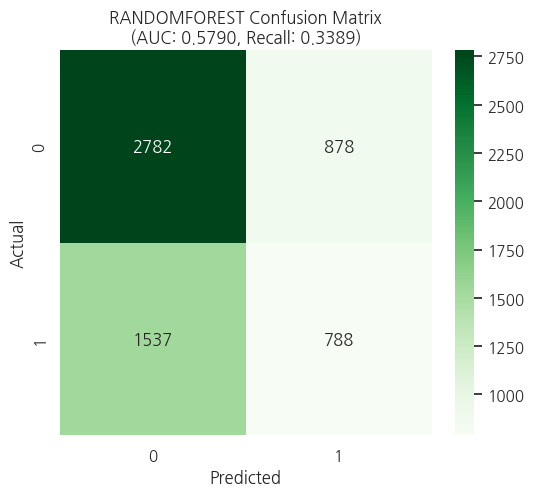

/tmp/ipython-input-103457798.py:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


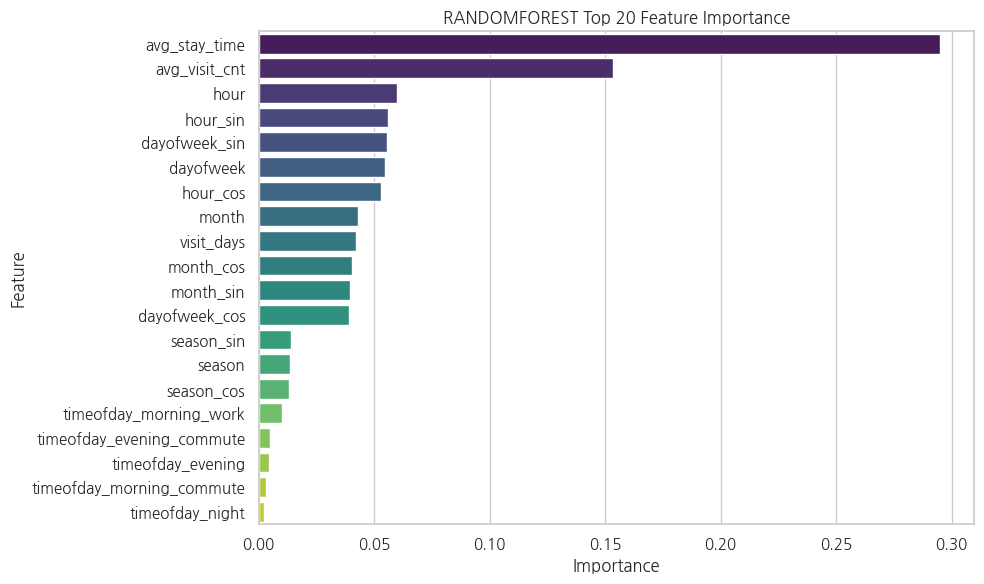

[I 2025-12-04 08:41:33,157] A new study created in memory with name: no-name-b0d29cf2-a798-4a8e-a834-e3c318bde65a



 >> START OPTIMIZATION: ADABOOST (Metric: recall)


[I 2025-12-04 08:41:42,250] Trial 0 finished with value: 0.08430107526881721 and parameters: {'base_max_depth': 1, 'n_estimators': 276, 'learning_rate': 0.0721041015486074}. Best is trial 0 with value: 0.08430107526881721.
[I 2025-12-04 08:41:54,121] Trial 1 finished with value: 0.24172043010752692 and parameters: {'base_max_depth': 5, 'n_estimators': 137, 'learning_rate': 0.596806631068041}. Best is trial 1 with value: 0.24172043010752692.
[I 2025-12-04 08:42:03,505] Trial 2 finished with value: 0.1329032258064516 and parameters: {'base_max_depth': 1, 'n_estimators': 292, 'learning_rate': 0.38136835290490567}. Best is trial 1 with value: 0.24172043010752692.
[I 2025-12-04 08:42:24,605] Trial 3 finished with value: 0.16516129032258065 and parameters: {'base_max_depth': 3, 'n_estimators': 331, 'learning_rate': 0.03669650660959416}. Best is trial 1 with value: 0.24172043010752692.
[I 2025-12-04 08:42:46,758] Trial 4 finished with value: 0.25032258064516133 and parameters: {'base_max_dept

 >> Best RECALL Score: 0.2645

[Evaluation] Generating Final Report for ADABOOST...

 >>> ADABOOST FINAL RESULTS <<<
 1. Accuracy : 0.6226
 2. Recall   : 0.2645
 3. F1 Score : 0.3525
 4. ROC-AUC  : 0.5882
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.85      0.73      3660
           1       0.53      0.26      0.35      2325

    accuracy                           0.62      5985
   macro avg       0.59      0.56      0.54      5985
weighted avg       0.60      0.62      0.59      5985



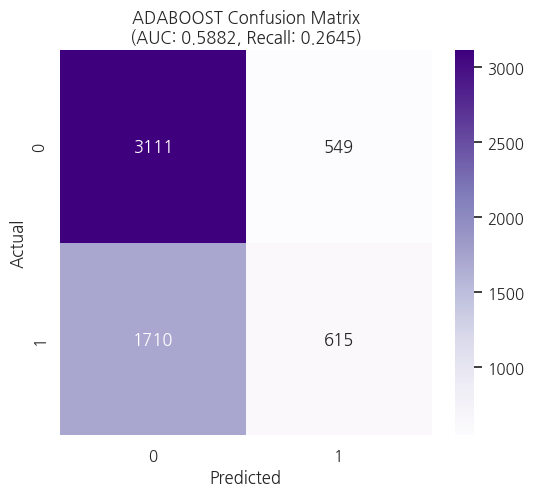

/tmp/ipython-input-103457798.py:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


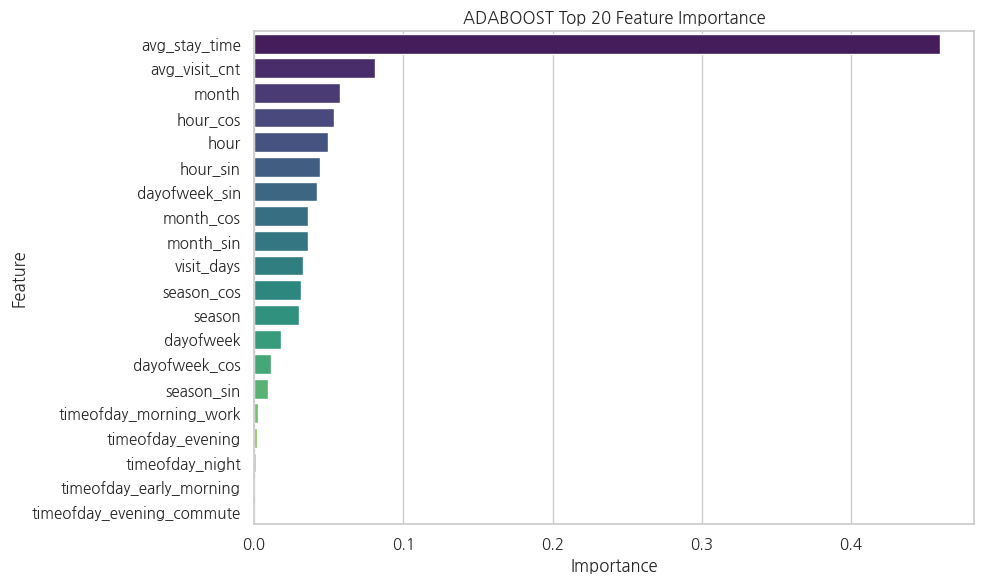

[I 2025-12-04 08:52:35,875] A new study created in memory with name: no-name-786089bd-008a-4c05-9c89-907f1dddb462



 >> START OPTIMIZATION: XGBOOST (Metric: recall)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:52:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:52:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:52:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:52:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:52:40] WARNING: /w

 >> Best RECALL Score: 0.3978

[Evaluation] Generating Final Report for XGBOOST...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:55:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:55:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:55:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:55:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 >>> XGBOOST FINAL RESULTS <<<
 1. Accuracy : 0.5736
 2. Recall   : 0.3978
 3. F1 Score : 0.4203
 4. ROC-AUC  : 0.5676
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.69      0.66      3660
           1       0.45      0.40      0.42      2325

    accuracy                           0.57      5985
   macro avg       0.54      0.54      0.54      5985
weighted avg       0.57      0.57      0.57      5985



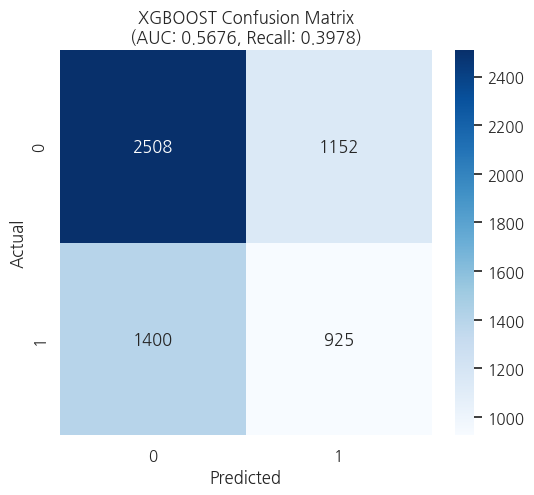

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:55:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-103457798.py:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


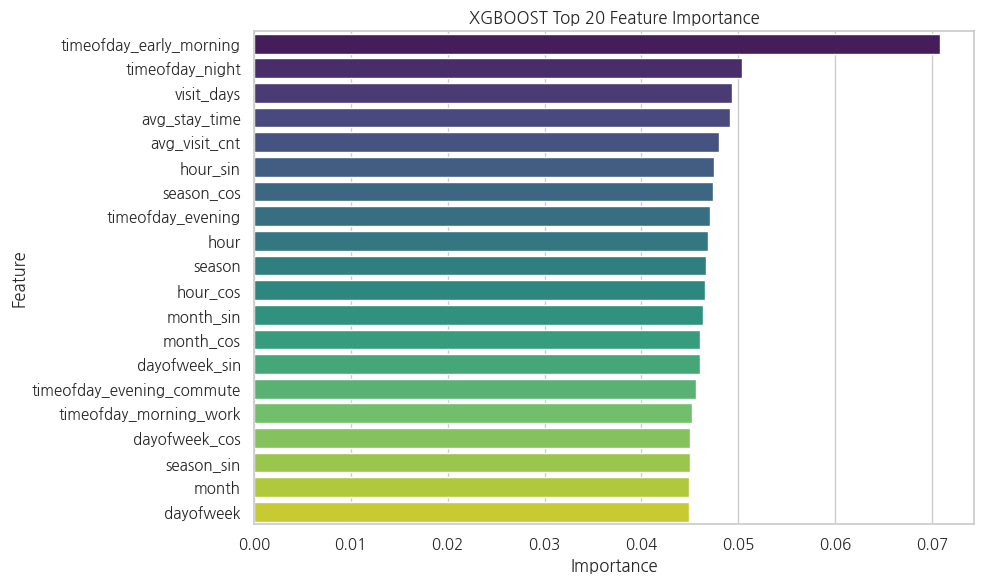

[I 2025-12-04 08:55:24,525] A new study created in memory with name: no-name-3ae4887c-0eb5-45bf-8b4b-f4cd5ebf4702



 >> START OPTIMIZATION: LIGHTGBM (Metric: recall)


[I 2025-12-04 08:55:28,095] Trial 0 finished with value: 0.2744086021505376 and parameters: {'n_estimators': 402, 'learning_rate': 0.20632465757636462, 'num_leaves': 130, 'max_depth': 13, 'subsample': 0.5984365342188444, 'colsample_bytree': 0.5207832412738391, 'reg_alpha': 4.241226281051726, 'reg_lambda': 0.015321466604085069, 'min_child_samples': 59}. Best is trial 0 with value: 0.2744086021505376.
[I 2025-12-04 08:55:31,541] Trial 1 finished with value: 0.29720430107526885 and parameters: {'n_estimators': 800, 'learning_rate': 0.038836051082536356, 'num_leaves': 90, 'max_depth': 5, 'subsample': 0.644865125714956, 'colsample_bytree': 0.6329975506635559, 'reg_alpha': 1.610887249998384, 'reg_lambda': 2.047964657808939, 'min_child_samples': 14}. Best is trial 1 with value: 0.29720430107526885.
[I 2025-12-04 08:55:33,412] Trial 2 finished with value: 0.3535483870967742 and parameters: {'n_estimators': 404, 'learning_rate': 0.18562506739922377, 'num_leaves': 24, 'max_depth': 13, 'subsample

 >> Best RECALL Score: 0.4004

[Evaluation] Generating Final Report for LIGHTGBM...

 >>> LIGHTGBM FINAL RESULTS <<<
 1. Accuracy : 0.5749
 2. Recall   : 0.4004
 3. F1 Score : 0.4226
 4. ROC-AUC  : 0.5658
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.69      0.66      3660
           1       0.45      0.40      0.42      2325

    accuracy                           0.57      5985
   macro avg       0.55      0.54      0.54      5985
weighted avg       0.57      0.57      0.57      5985



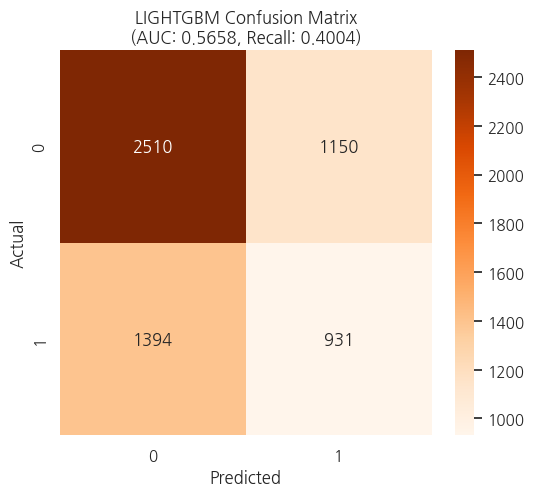

/tmp/ipython-input-103457798.py:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


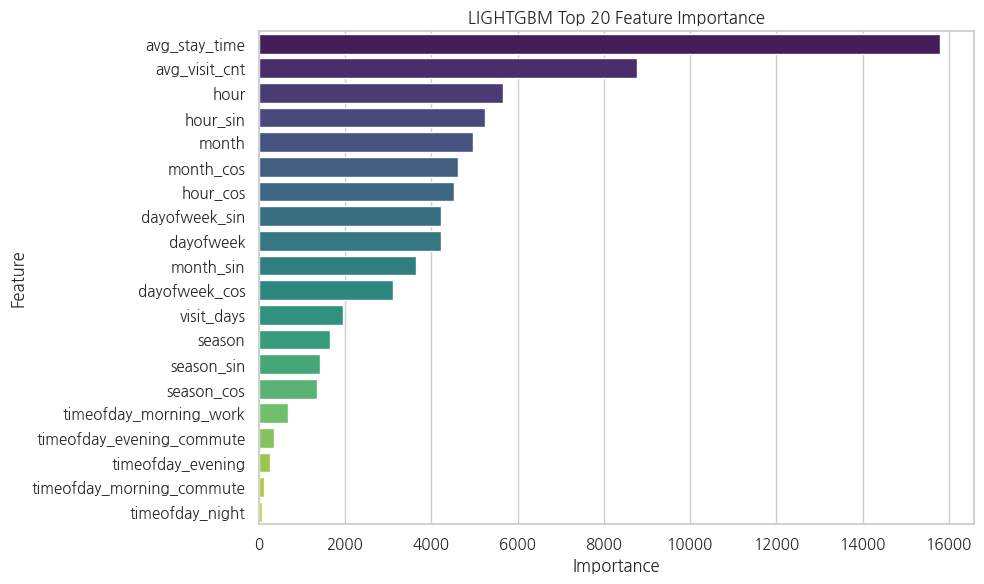


 🏆 FINAL MODEL COMPARISON SUMMARY
          model  accuracy    recall        f1   roc_auc
3      lightgbm  0.574937  0.400430  0.422606  0.565790
2       xgboost  0.573601  0.397849  0.420264  0.567580
0  randomforest  0.596491  0.338925  0.394888  0.578997
1      adaboost  0.622556  0.264516  0.352537  0.588244


In [ ]:
# ======================================================================================
# [6] 메인 실행 블록
# ======================================================================================
if __name__ == "__main__":
    # 1. 데이터 로드
    X, y = load_data(Config.FILE_PATH)

    results_summary = []

    # 2. 설정된 모델들을 순차적으로 실행
    for model_name in Config.MODELS_TO_RUN:
        # (A) 최적화
        best_params = run_optimization(model_name, X, y)

        # (B) 평가 및 시각화
        result = evaluate_and_visualize(model_name, best_params, X, y)
        results_summary.append(result)

    # 3. 전체 모델 비교 요약 출력
    print("\n" + "="*60)
    print(" 🏆 FINAL MODEL COMPARISON SUMMARY")
    print("="*60)
    summary_df = pd.DataFrame(results_summary)
    # 설정한 Target Metric 기준으로 정렬 (내림차순)
    summary_df = summary_df.sort_values(by=Config.TARGET_METRIC, ascending=False)
    print(summary_df)
    print("="*60)

## 최종 모델링

###Ⅰ. 베이스 모델 만들기(로지스틱 회귀)

####Ⅰ-ⅰ. 베이스 마스터 테이블 생성

In [ ]:
# 깨끗한 데이터로드
master_df = master_raw.copy()
# 데이터 타입 수정
time_cols = ['day1_first', 'day1_last', 'day2_first', 'day2_last', 'day3_first', 'day3_last']
time_delta_cols = ['day1_staytime', 'day2_staytime','day3_staytime',]

for col in time_cols:
  master_df[col] = pd.to_datetime(master_df[col], format='mixed', errors='coerce')

for col in time_delta_cols:
  master_df[col] = pd.to_timedelta(master_df[col])

for col in time_delta_cols:
  master_df[col] = master_df[col].dt.total_seconds() / 60 # 분 단위로 환산

In [ ]:
master_df.drop(time_cols, axis=1, inplace=True)

In [ ]:
master_df = pd.get_dummies(master_df, columns=['first_site_id'], drop_first=True)

In [ ]:
# bool_cols 전부 0,1로 전환
bool_cols = ['is_payment', 'is_changed_site', 'first_site_id_2',	'first_site_id_3',	'first_site_id_4',	'first_site_id_5',	'first_site_id_6',	'first_site_id_17',	'first_site_id_47',	'first_site_id_49']
for col in bool_cols:
 master_df[col] = master_df[col].astype(int)


user_uuid  day1_staytime  day1_visit_cnt  \
0  000590dc-046f-462b-8225-4c81a97b7166     356.950000               3   
1  000be14f-ba0f-4af6-bc2c-7b00dfcbc98c     170.366667               7   
2  0018e22d-a2cc-4e06-bca2-d6a041770f3b     715.000000               6   
3  002606d9-38ca-48f3-910c-cbfada9a9109     211.483333               2   
4  002a7570-90dd-4cab-b0aa-b0e40f7ef27a     312.033333               5   

   day1_attended  day2_staytime  day2_visit_cnt  day2_attended  day3_staytime  \
0              1       0.000000               0              0            0.0   
1              1     156.366667               2              1            0.0   
2              1     574.533333               2              1            0.0   
3              1     205.566667               2              1            0.0   
4              1       0.000000               0              0            0.0   

   day3_visit_cnt  day3_attended  is_changed_site  is_payment  \
0               0              0                0           0   
1               0              0                0           1   
2               0              0                0           0   
3               0              0                0           0   
4               0              0                0           1   

   first_site_id_2  first_site_id_3  first_site_id_4  first_site_id_5  \
0                0                0                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                1   

   first_site_id_6  first_site_id_17  first_site_id_47  first_site_id_49  
0                1                 0                 0                 0  
1                0                 0                 0                 0  
2                1                 0                 0                 0  
3                0                 1                 0                 0  
4                0                 0                 0                 0

In [ ]:
# 컬럼 순서 정렬
master_df_order = ['user_uuid', 'day1_staytime', 'day1_visit_cnt', 'day1_attended',
       'day2_staytime', 'day2_visit_cnt', 'day2_attended', 'day3_staytime',
       'day3_visit_cnt', 'day3_attended', 'is_changed_site', 'first_site_id_2',
       'first_site_id_3', 'first_site_id_4', 'first_site_id_5',
       'first_site_id_6', 'first_site_id_17', 'first_site_id_47', 'first_site_id_49', 'is_payment']

In [ ]:
master_df = master_df[master_df_order]

In [ ]:
# base_master_df.csv 저장
# master_df.to_csv('/content/drive/MyDrive/DA_09_파트3_3팀 프로젝트/csv/edit_data/base_master_df.csv', index=False)

####Ⅰ-ⅱ. 모델링 진행(로지스틱 회귀)

In [ ]:
base_master_df_raw = pd.read_csv('/content/drive/MyDrive/DA_09_파트3_3팀 프로젝트/csv/edit_data/base_master_df.csv')
base_master_df = base_master_df_raw.copy()

In [ ]:
# user_uuid, is_payment 분리
X = base_master_df.drop(['user_uuid','is_payment'], axis=1)
y = base_master_df['is_payment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # stratify=y 추가: y의 클래스 비율을 유지하며 분할
)

In [ ]:
scaler = StandardScaler()
num_cols = ['day1_staytime', 'day2_staytime', 'day3_staytime']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

Accuracy: 0.6198830409356725
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.91      0.75       732
           1       0.54      0.16      0.25       465

    accuracy                           0.62      1197
   macro avg       0.58      0.54      0.50      1197
weighted avg       0.59      0.62      0.55      1197



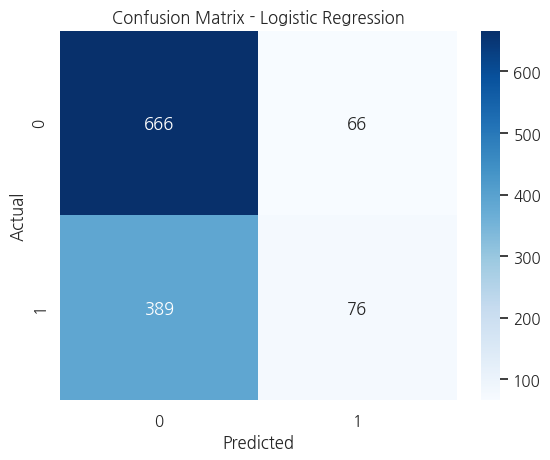

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_lr = lr_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix 저장
cm_lr = confusion_matrix(y_test, y_pred_lr)

# 피쳐 중요도 저장
importance = abs(lr_model.coef_)
importance_df = pd.DataFrame({"feature": X.columns, "importance": importance[0]})
importance_df_sorted = importance_df.sort_values("importance", ascending=False)  # 막대가 아래에서 위로 정렬되게

# 예측 확률 가져오기 (양성 클래스 확률)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # fpr, tpr 가져오기
auc_score = roc_auc_score(y_test, y_pred_proba) # roc-auc 가져오기

/tmp/ipython-input-3303620732.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


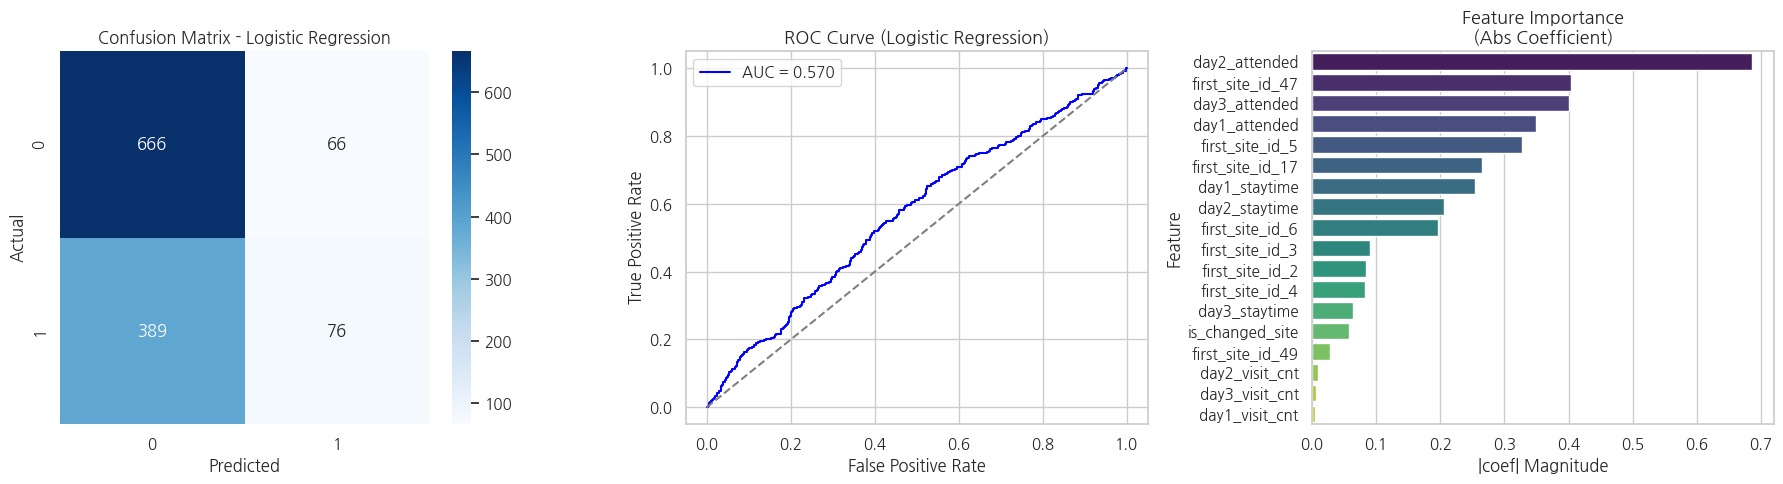

In [ ]:
# 시각화 모아 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1행 3열

# ---------------------------------------------------
# 1) Confusion Matrix
# ---------------------------------------------------
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# ---------------------------------------------------
# 2) ROC Curve
# ---------------------------------------------------
axes[1].plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", color='blue')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("ROC Curve (Logistic Regression)", fontsize=13)
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()
axes[1].grid(True)



# ---------------------------------------------------
# 3) Feature Importance
# ---------------------------------------------------
sns.barplot(
    data=importance_df_sorted,
    x="importance",
    y="feature",
    palette="viridis",
    ax=axes[2]
)
axes[2].set_title("Feature Importance\n(Abs Coefficient)", fontsize=13)
axes[2].set_xlabel("|coef| Magnitude")
axes[2].set_ylabel("Feature")

# layout 정돈
plt.tight_layout()
plt.show()

####Ⅰ-ⅲ. 모델링 진행(4가지 앙상블)

In [ ]:
def run_basic_ensemble_models(X_train_scaled, X_test_scaled, y_train, y_test, feature_names):
    """
    기본 하이퍼파라미터(+ random_state=42)로
    RandomForest, AdaBoost, XGBoost, LightGBM 4개 모델을 학습/평가/시각화하는 함수
    """

    models = {
        "RandomForest": RandomForestClassifier(
            random_state=42
        ),
        "AdaBoost": AdaBoostClassifier(
            random_state=42
        ),
        "XGBoost": xgb.XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            use_label_encoder=False,
            random_state=42
        ),
        "LightGBM": lgb.LGBMClassifier(
            random_state=42
        ),
    }

    for name, model in models.items():
        print("=" * 80)
        print(f"[{name}] 기본 모델 학습 및 평가")
        print("=" * 80)

        # 1. 학습
        model.fit(X_train_scaled, y_train)

        # 2. 예측
        y_pred = model.predict(X_test_scaled)

        # 3. 예측 확률 (ROC-AUC용)
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            # 혹시라도 predict_proba가 없는 경우 대비 (여기서는 거의 안 쓰일 것)
            y_pred_proba = model.decision_function(X_test_scaled)
            y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min() + 1e-9)

        # 4. 지표 계산
        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred_proba)

        print(f"Accuracy : {acc:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"F1 Score : {f1:.4f}")
        print(f"ROC-AUC  : {auc_score:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # 5. 혼동행렬
        cm = confusion_matrix(y_test, y_pred)

        # 6. ROC Curve 좌표
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

        # 7. 피처 중요도
        importance_df_sorted = None
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
            importance_df = pd.DataFrame({
                "feature": feature_names,
                "importance": importances
            })
            importance_df_sorted = importance_df.sort_values("importance", ascending=False)
        else:
            print(f"[{name}] feature_importances_ 속성이 없어 중요도 그래프는 생략합니다.\n")

        # 8. 시각화 (1행 3열: Confusion, ROC, Feature Importance)
        fig, axes = plt.subplots(1, 3, figsize=(20, 5))

        # (1) Confusion Matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
        axes[0].set_title(f"Confusion Matrix - {name}")
        axes[0].set_xlabel("Predicted")
        axes[0].set_ylabel("Actual")

        # (2) ROC Curve
        axes[1].plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
        axes[1].plot([0, 1], [0, 1], linestyle="--", color="gray")
        axes[1].set_title(f"ROC Curve - {name}")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend()
        axes[1].grid(True)

        # (3) Feature Importance
        if importance_df_sorted is not None:
            # 너무 많으면 상위 20개 정도만
            top_k = 20 if importance_df_sorted.shape[0] > 20 else importance_df_sorted.shape[0]
            sns.barplot(
                data=importance_df_sorted.head(top_k),
                x="importance",
                y="feature",
                palette="viridis",
                ax=axes[2]
            )
            axes[2].set_title(f"Feature Importance - {name}\n(Top {top_k})")
            axes[2].set_xlabel("Importance")
            axes[2].set_ylabel("Feature")
        else:
            axes[2].axis("off")
            axes[2].set_title("No feature_importances_ available")

        plt.tight_layout()
        plt.show()

[RandomForest] 기본 모델 학습 및 평가
Accuracy : 0.5739
Recall   : 0.3570
F1 Score : 0.3943
ROC-AUC  : 0.5535

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       732
           1       0.44      0.36      0.39       465

    accuracy                           0.57      1197
   macro avg       0.54      0.53      0.53      1197
weighted avg       0.56      0.57      0.56      1197



/tmp/ipython-input-2063590073.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


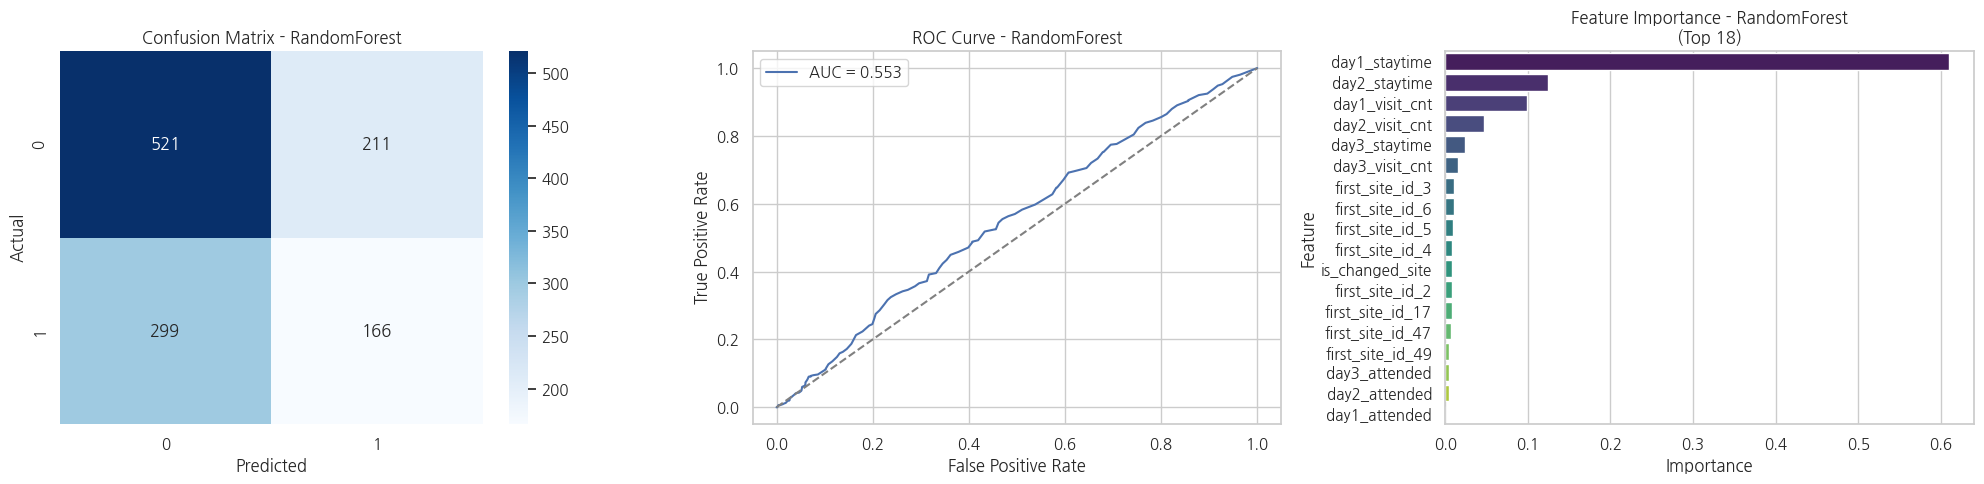

[AdaBoost] 기본 모델 학습 및 평가
Accuracy : 0.6257
Recall   : 0.1441
F1 Score : 0.2302
ROC-AUC  : 0.5601

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       732
           1       0.57      0.14      0.23       465

    accuracy                           0.63      1197
   macro avg       0.60      0.54      0.49      1197
weighted avg       0.61      0.63      0.55      1197



/tmp/ipython-input-2063590073.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


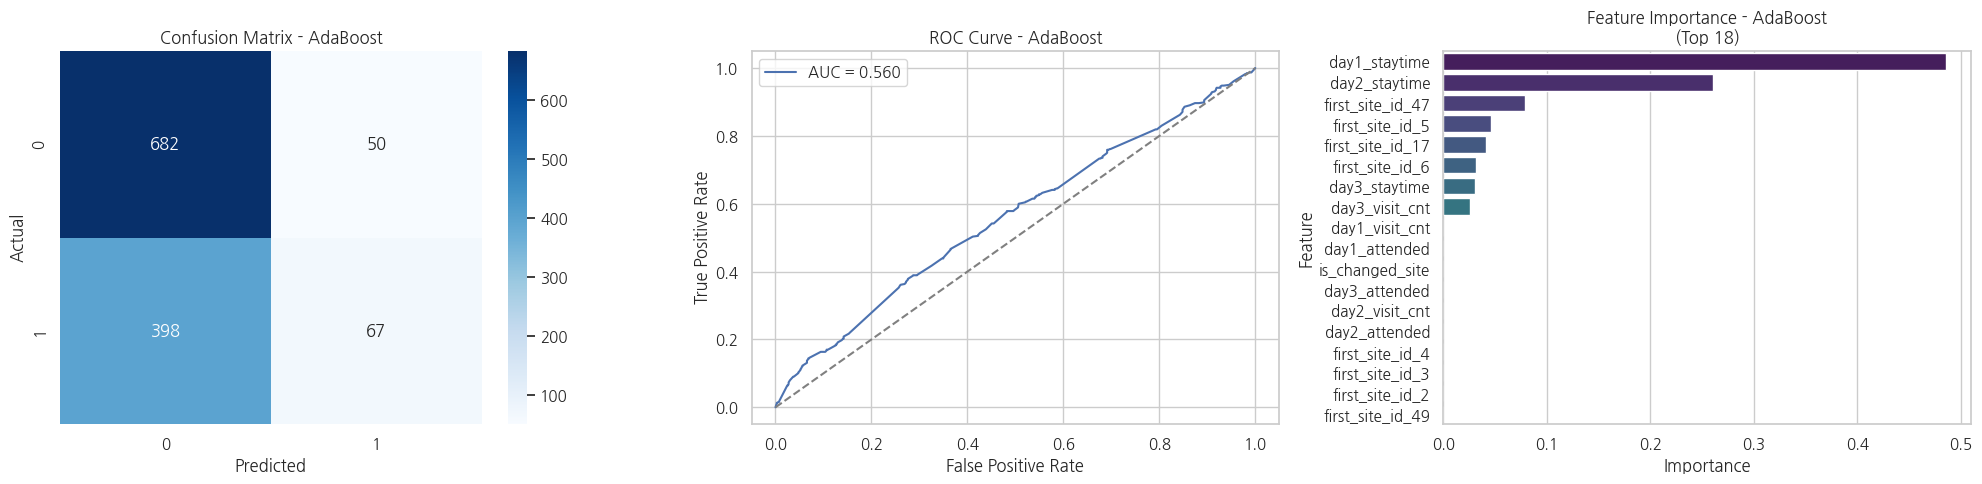

[XGBoost] 기본 모델 학습 및 평가
Accuracy : 0.5856
Recall   : 0.2409
F1 Score : 0.3111
ROC-AUC  : 0.5525

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.80      0.70       732
           1       0.44      0.24      0.31       465

    accuracy                           0.59      1197
   macro avg       0.53      0.52      0.51      1197
weighted avg       0.55      0.59      0.55      1197



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:22:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-2063590073.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


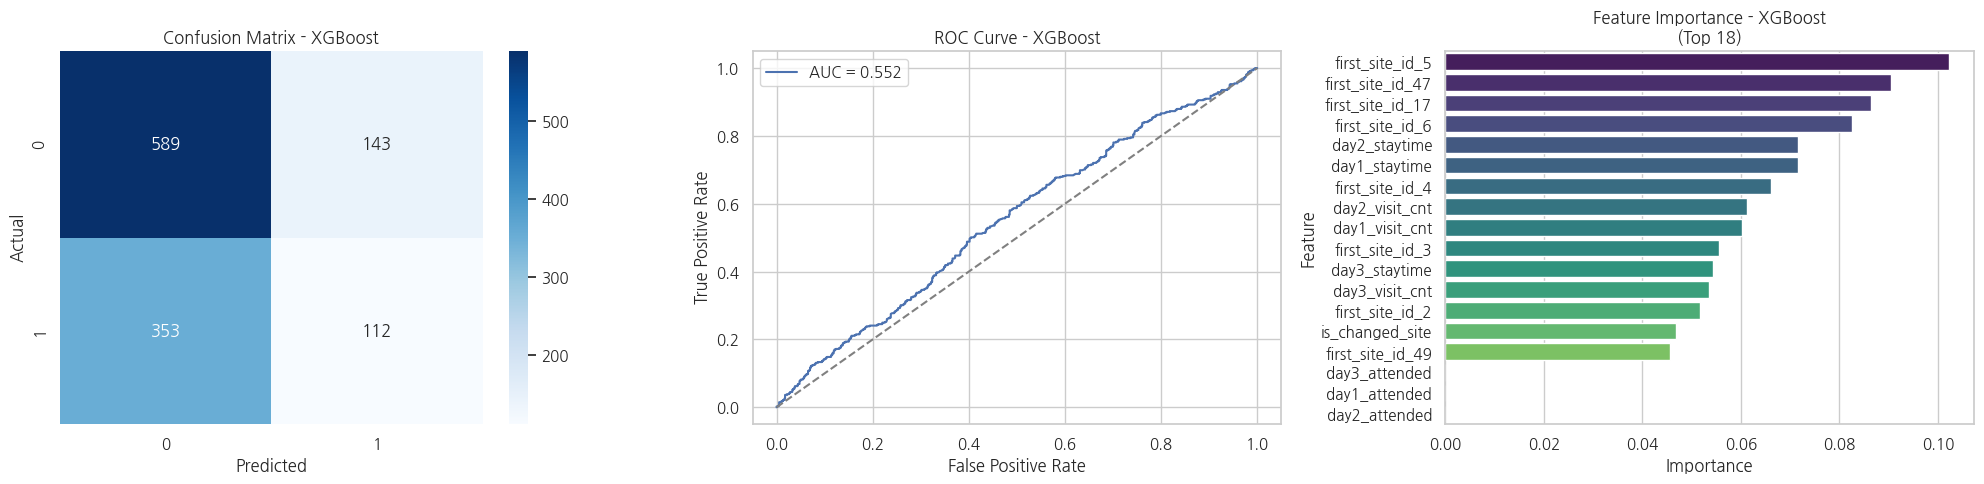

[LightGBM] 기본 모델 학습 및 평가
Accuracy : 0.5873
Recall   : 0.1828
F1 Score : 0.2560
ROC-AUC  : 0.5583

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.84      0.71       732
           1       0.43      0.18      0.26       465

    accuracy                           0.59      1197
   macro avg       0.52      0.51      0.49      1197
weighted avg       0.54      0.59      0.54      1197



/tmp/ipython-input-2063590073.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


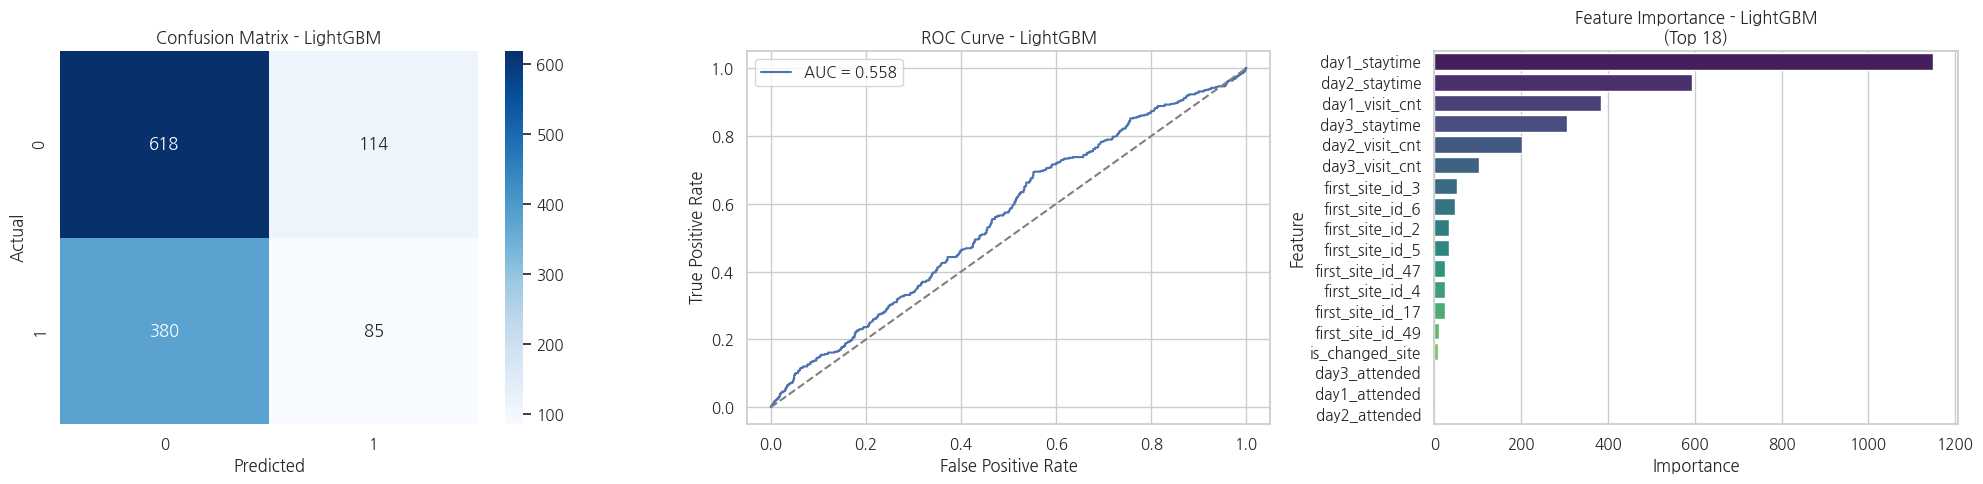

In [ ]:
run_basic_ensemble_models(
    X_train_scaled=X_train_scaled,
    X_test_scaled=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    feature_names=X.columns  # 중요도 시각화에 사용할 컬럼 이름
)

###Ⅱ. master_df_final 생성
- 지점 id 추가
- day1, 2, 3 정보 추가
- 시계열 일부 제거

In [ ]:
# user_master(전처리수정)데이터 활용하여 master_df_final 만들기
user_master_raw = pd.read_csv(file_path + 'user_master(전처리수정).csv')
master_df_final = user_master_raw.copy()

In [ ]:
# 데이터 타입 수정
time_cols = ['day1_first', 'day1_last', 'day2_first', 'day2_last', 'day3_first', 'day3_last']
time_delta_cols = ['day1_staytime', 'day2_staytime','day3_staytime',]

for col in time_cols:
  master_df_final[col] = pd.to_datetime(master_df_final[col], format='mixed', errors='coerce')

for col in time_delta_cols:
  master_df_final[col] = pd.to_timedelta(master_df_final[col])

for col in time_delta_cols:
  master_df_final[col] = master_df_final[col].dt.total_seconds() / 60 # 분 단위로 환산

In [ ]:
# 시간 변수 분할 함수(최종)
def create_time_features_final(df):
  df = df.copy()
  df['year'] = df['day1_first'].dt.year
  df['month'] = df['day1_first'].dt.month
  df['hour'] = df['day1_first'].dt.hour
  df['dayofweek'] = df['day1_first'].dt.dayofweek # 요일 구분, 월요일부터 0 - 6 까지
  df['season'] = df['month'].apply(
      lambda m:
          0 if 3 <= m <= 5 else
          1 if 6 <= m <= 8 else
          2 if 9 <= m <= 11 else
          3  # 겨울 (12,1,2)
          )
  df['timeofday'] = df['hour'].apply(
      lambda h:
        'early_morning' if 0 <= h < 6 else # 새벽
        'morning_commute' if 6 <= h < 9 else # 출근 시간
        'morning_work' if 9 <= h < 12 else # 오전 업무 시간
        'afternoon_work' if 12 <= h < 17 else # 오후 업무 시간
        'evening_commute' if 17 <= h < 19 else # 퇴근 시간
        'evening' if 19 <= h < 21 else # 저녁
        'night'  # 밤(21, 22, 23)
      )

  return df
def feature_engineering_final(df):
    df = df.copy()

    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
    df['season_sin'] = np.sin(2 * np.pi * df['season'] / 4)
    df['season_cos'] = np.cos(2 * np.pi * df['season'] / 4)

    return df

In [ ]:
# 시간대 분할 함수 적용
master_df_final = create_time_features_final(master_df_final)
master_df_final = feature_engineering_final(master_df_final)

In [ ]:
# 시간대 원-핫 인코딩
master_df_final = pd.get_dummies(master_df_final, columns=['timeofday'], drop_first=True)

In [ ]:
master_df_final = pd.get_dummies(master_df_final, columns=['first_site_id'], drop_first=True)

In [ ]:
# bool_cols 전부 0,1로 전환
bool_cols = ['is_payment', 'is_changed_site', 'first_site_id_2',	'first_site_id_3',	'first_site_id_4',	'first_site_id_5',	'first_site_id_6',	'first_site_id_17',	'first_site_id_47',	'first_site_id_49']
for col in bool_cols:
 master_df_final[col] = master_df_final[col].astype(int)


In [ ]:
# boolean형태 자료형 0, 1로 전환
bool_cols = ['timeofday_early_morning', 'timeofday_evening', 'timeofday_evening_commute', 'timeofday_morning_commute', 'timeofday_morning_work','timeofday_night']
for col in bool_cols:
 master_df_final[col] = master_df_final[col].astype(int)

In [ ]:
# 일자별로 데이터 합산
master_df_final['stay_time'] = master_df_final['day1_staytime'] + master_df_final['day2_staytime'] + master_df_final['day3_staytime']
master_df_final['visit_cnt'] = master_df_final['day1_visit_cnt'] + master_df_final['day2_visit_cnt'] + master_df_final['day3_visit_cnt']
master_df_final['visit_days'] = master_df_final['day1_attended'] + master_df_final['day2_attended'] + master_df_final['day3_attended']
master_df_final['avg_stay_time'] = round((master_df_final['stay_time'] / master_df_final['visit_days']), 3)
master_df_final['avg_visit_cnt'] = round((master_df_final['visit_cnt'] / master_df_final['visit_days']), 3)

In [ ]:
master_df_final_order = ['user_uuid', 'day1_staytime', 'day1_visit_cnt', 'day1_attended',
       'day2_staytime', 'day2_visit_cnt', 'day2_attended', 'day3_staytime',
       'day3_visit_cnt', 'day3_attended', 'visit_days', 'avg_stay_time', 'avg_visit_cnt',
       'first_site_id_2', 'first_site_id_3', 'first_site_id_4', 'first_site_id_5',
       'first_site_id_6', 'first_site_id_17', 'first_site_id_47', 'first_site_id_49', 'timeofday_early_morning',
       'timeofday_evening', 'timeofday_evening_commute', 'timeofday_morning_commute', 'timeofday_morning_work',
       'timeofday_night', 'season_sin', 'season_cos', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos',
       'dayofweek_sin', 'dayofweek_cos',  'is_payment']

master_df_final = master_df_final[master_df_final_order]

In [ ]:
master_df_final.to_csv(file_path + 'master_df_final.csv', index=False)

####Ⅱ- ⅰ. 마스터 테이블(최종) 활용 모델링(클래스 불균형)


In [ ]:
# 불균형 비율 계산(XGBoost, LIghtGBM)
neg = len(master_df_final[master_df_final['is_payment'] == 0])
pos = len(master_df_final[master_df_final['is_payment'] == 1])
SCALE_POS_WEIGHT = neg / pos

In [ ]:
SCALE_POS_WEIGHT

1.5741935483870968

Accuracy: 0.5816
Recall: 0.5394
F1 Score: 0.5004
ROC-AUC: 0.6045

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.61      0.64      3660
           1       0.47      0.54      0.50      2325

    accuracy                           0.58      5985
   macro avg       0.57      0.57      0.57      5985
weighted avg       0.59      0.58      0.59      5985



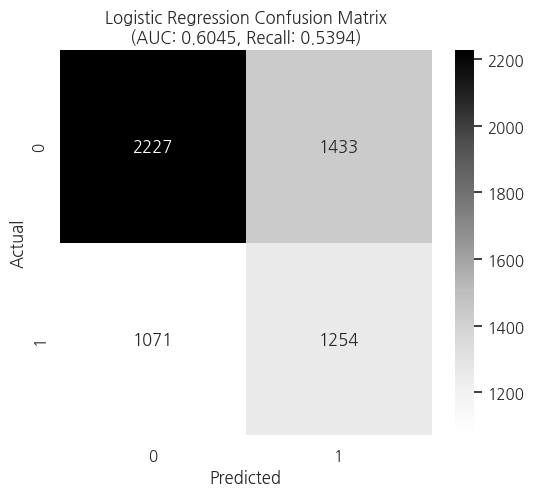

/tmp/ipython-input-3172385498.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(20), x="importance", y="feature", palette="viridis")


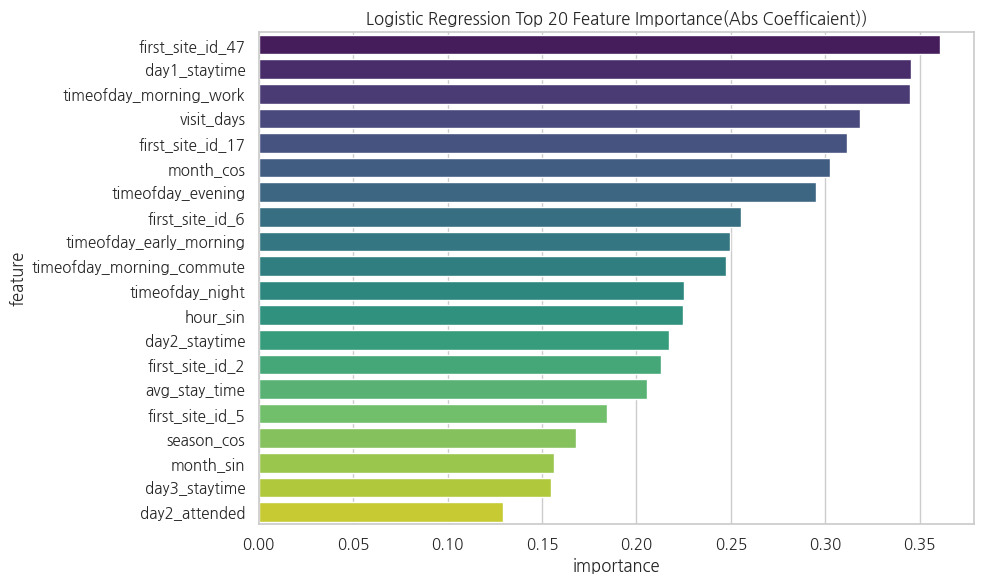

In [ ]:
# 선형 회귀 모델
# ============================================
# 1. 데이터 분리 없이 X, y 준비
# ============================================
X = master_df_final.drop(['user_uuid','is_payment'], axis=1)
y = master_df_final['is_payment']

# ============================================
# 2. StandardScaler 적용 (수치형 변수만)
# ============================================
scaler = StandardScaler()
num_cols = ['day1_staytime', 'day1_visit_cnt','day2_staytime', 'day2_visit_cnt', 'day3_staytime',
       'day3_visit_cnt', 'visit_days', 'avg_stay_time', 'avg_visit_cnt']

X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

# ============================================
# 3. Logistic Regression 모델 정의
# ============================================
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# ============================================
# 4. Stratified K-Fold 설정
# ============================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ============================================
# 5. Cross-val predict로 전체 데이터 예측
#    → test_split 없이 전체 데이터에 대해 5-fold 기반 예측
# ============================================
y_pred_proba = cross_val_predict(
    lr_model,
    X_scaled,
    y,
    cv=skf,
    method='predict_proba'
)[:, 1]

y_pred = (y_pred_proba > 0.5).astype(int)

# ============================================
# 6. 평가 지표 출력
# ============================================
print("Accuracy:", round(accuracy_score(y, y_pred), 4))
print("Recall:", round(recall_score(y, y_pred), 4))
print("F1 Score:", round(f1_score(y, y_pred), 4))
print("ROC-AUC:", round(roc_auc_score(y, y_pred_proba), 4))

print("\nClassification Report:\n", classification_report(y, y_pred))

# ============================================
# 7. Confusion Matrix
# ============================================
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.title(f"Logistic Regression Confusion Matrix\n(AUC: {roc_auc_score(y, y_pred_proba):.4f}, Recall: {recall_score(y, y_pred):.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ============================================
# 8. Feature Importance (coef 기반)
# ============================================
lr_model.fit(X_scaled, y)   # coef_ 계산용 (cross_val_predict는 모델을 보관하지 않음)

importance = abs(lr_model.coef_[0])
importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importance
}).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(20), x="importance", y="feature", palette="viridis")
plt.title("Logistic Regression Top 20 Feature Importance(Abs Coefficaient))")
plt.tight_layout()
plt.show()

# # ============================================
# # 9. ROC Curve
# # ============================================
# fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# plt.figure(figsize=(7, 6))
# plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y, y_pred_proba):.3f}", color='blue')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Logistic Regression (5-fold CV)")
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# ======================================================================================
# [1] 사용자 설정 (Configuration) - 여기만 바꾸면 됩니다!
# ======================================================================================
class Config:
    # 데이터 경로
    FILE_PATH = file_path + 'master_df_final.csv'

    # 실행할 모델 리스트 (원하는 것만 남기거나 주석 처리 가능)
    # 옵션: 'xgboost', 'lightgbm', 'randomforest'
    MODELS_TO_RUN = ['randomforest','adaboost', 'xgboost', 'lightgbm']

    # Optuna 최적화 기준 지표 (Scoring Metric)
    # 옵션: 'recall', 'f1', 'roc_auc', 'accuracy'
    TARGET_METRIC = 'recall'

    # Optuna 설정
    N_TRIALS = 50       # 모델당 시도 횟수
    TIMEOUT = 600       # 모델당 제한 시간 (초)
    N_JOBS = -1         # CPU 병렬 처리 (-1: 전체 사용)
    RANDOM_STATE = 42   # 재현성을 위한 시드값

# ======================================================================================
# [2] 데이터 로드 함수
# ======================================================================================
def load_data(filepath):
    print(f"\n[Data Load] Reading file from: {filepath}...")
    df = pd.read_csv(filepath)

    if 'user_uuid' in df.columns:
        df = df.drop(columns=['user_uuid'])

    X = df.drop(columns=['is_payment'])
    y = df['is_payment']

    print(f"[Data Load] Complete. Shape: {X.shape}, Target Distribution: {y.value_counts().to_dict()}")
    return X, y

# ======================================================================================
# [3] 모델별 하이퍼파라미터 정의 함수
# ======================================================================================
def get_model_and_params(trial, model_name):
    if model_name == 'xgboost':
        params = {
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'use_label_encoder': False,
            'random_state': Config.RANDOM_STATE,
            'n_jobs': Config.N_JOBS,
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'scale_pos_weight': SCALE_POS_WEIGHT
        }
        model = xgb.XGBClassifier(**params)

    elif model_name == 'lightgbm':
        params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'verbosity': -1,
            'random_state': Config.RANDOM_STATE,
            'n_jobs': Config.N_JOBS,
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'num_leaves': trial.suggest_int('num_leaves', 20, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
            'scale_pos_weight': SCALE_POS_WEIGHT
        }
        model = lgb.LGBMClassifier(**params)

    elif model_name == 'randomforest':
        params = {
            'random_state': Config.RANDOM_STATE,
            'n_jobs': Config.N_JOBS,
            'n_estimators': trial.suggest_int('n_estimators', 100, 800),
            'max_depth': trial.suggest_int('max_depth', 5, 30),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
            'class_weight': 'balanced'
        }
        model = RandomForestClassifier(**params)

    elif model_name == 'adaboost':
        # 결정트리를 약한 학습기로 쓰는 AdaBoost
        base_max_depth = trial.suggest_int('base_max_depth', 1, 5)
        n_estimators = trial.suggest_int('n_estimators', 50, 400)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)

        base_estimator = DecisionTreeClassifier(
            max_depth=base_max_depth,
            random_state=Config.RANDOM_STATE,
            class_weight='balanced'
        )

        model = AdaBoostClassifier(
            estimator=base_estimator,  # sklearn 1.2+ 기준
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=Config.RANDOM_STATE
        )

    return model

# ======================================================================================
# [4] Optuna Objective & 실행 함수
# ======================================================================================
def run_optimization(model_name, X, y):
    print(f"\n{'='*80}")
    print(f" >> START OPTIMIZATION: {model_name.upper()} (Metric: {Config.TARGET_METRIC})")
    print(f"{'='*80}")

    def objective(trial):
        model = get_model_and_params(trial, model_name)
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=Config.RANDOM_STATE)

        # 설정된 Metric으로 점수 계산 (cross_val_score는 roc_auc, recall, f1 등 문자열 지원)
        scores = cross_val_score(model, X, y, cv=skf, scoring=Config.TARGET_METRIC)
        return scores.mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=Config.N_TRIALS, timeout=Config.TIMEOUT)

    print(f" >> Best {Config.TARGET_METRIC.upper()} Score: {study.best_value:.4f}")
    return study.best_trial.params

# ======================================================================================
# [5] 최종 평가 및 시각화 함수
# ======================================================================================
def evaluate_and_visualize(model_name, best_params, X, y):
    print(f"\n[Evaluation] Generating Final Report for {model_name.upper()}...")

    # 1. 최적 파라미터로 모델 재생성
    # (Optuna에서 쓴 param 그대로는 모델 생성자에 못 넣는 경우가 있어 다시 매핑하거나 업데이트해야 함)
    # 편의를 위해 기본 설정에 best_params를 업데이트하는 방식 사용

    if model_name == 'xgboost':
        base_params = {'objective': 'binary:logistic', 'eval_metric': 'logloss', 'use_label_encoder': False, 'random_state': 42, 'n_jobs': -1, 'scale_pos_weight': SCALE_POS_WEIGHT}
        base_params.update(best_params)
        final_model = xgb.XGBClassifier(**base_params)
        cmap_color = 'Blues'

    elif model_name == 'lightgbm':
        base_params = {'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'random_state': 42, 'n_jobs': -1, 'scale_pos_weight': SCALE_POS_WEIGHT}
        base_params.update(best_params)
        final_model = lgb.LGBMClassifier(**base_params)
        cmap_color = 'Oranges'

    elif model_name == 'randomforest':
        base_params = {'random_state': 42, 'n_jobs': -1, 'class_weight': 'balanced'}
        base_params.update(best_params)
        final_model = RandomForestClassifier(**base_params)
        cmap_color = 'Greens'


    elif model_name == 'adaboost':
        # Optuna에서 저장된 best_params에서 하이퍼파라미터 꺼내기
        base_max_depth = best_params.get('base_max_depth', 1)
        n_estimators = best_params.get('n_estimators', 100)
        learning_rate = best_params.get('learning_rate', 0.1)

        base_estimator = DecisionTreeClassifier(
            max_depth=base_max_depth,
            random_state=Config.RANDOM_STATE,
            class_weight='balanced'
        )

        final_model = AdaBoostClassifier(
            estimator=base_estimator,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=Config.RANDOM_STATE
        )
        cmap_color = 'Purples'

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=Config.RANDOM_STATE)

    # 2. 예측 (Probabilities & Labels)
    y_pred_proba = cross_val_predict(final_model, X, y, cv=skf, method='predict_proba')[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)

    # 3. 지표 계산
    acc = accuracy_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_proba)

    # 4. 출력
    print(f"\n >>> {model_name.upper()} FINAL RESULTS <<<")
    print(f" 1. Accuracy : {acc:.4f}")
    print(f" 2. Recall   : {rec:.4f}")
    print(f" 3. F1 Score : {f1:.4f}")
    print(f" 4. ROC-AUC  : {auc:.4f}")
    print("-" * 60)
    print(classification_report(y, y_pred))

    # 5. 시각화 (Confusion Matrix)
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_color)
    plt.title(f'{model_name.upper()} Confusion Matrix\n(AUC: {auc:.4f}, Recall: {rec:.4f})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # 6. 시각화 (Feature Importance)
    final_model.fit(X, y)
    if hasattr(final_model, 'feature_importances_'):
        importances = final_model.feature_importances_
        feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
        feature_df = feature_df.sort_values(by='Importance', ascending=False).head(20)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
        plt.title(f'{model_name.upper()} Top 20 Feature Importance')
        plt.tight_layout()
        plt.show()

    return {'model': model_name, 'accuracy': acc, 'recall': rec, 'f1': f1, 'roc_auc': auc}

[I 2025-12-07 18:45:57,721] A new study created in memory with name: no-name-ebe55a8b-718e-46e6-b124-b3de2b12f254



[Data Load] Reading file from: /content/drive/MyDrive/DA_09_파트3_3팀 프로젝트/csv/edit_data/master_df_final.csv...
[Data Load] Complete. Shape: (5985, 34), Target Distribution: {0: 3660, 1: 2325}

 >> START OPTIMIZATION: RANDOMFOREST (Metric: recall)


[I 2025-12-07 18:46:22,924] Trial 0 finished with value: 0.4834408602150537 and parameters: {'n_estimators': 701, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.4834408602150537.
[I 2025-12-07 18:46:58,707] Trial 1 finished with value: 0.41376344086021505 and parameters: {'n_estimators': 754, 'max_depth': 26, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.4834408602150537.
[I 2025-12-07 18:47:10,263] Trial 2 finished with value: 0.4434408602150538 and parameters: {'n_estimators': 246, 'max_depth': 14, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.4834408602150537.
[I 2025-12-07 18:47:13,302] Trial 3 finished with value: 0.4950537634408603 and parameters: {'n_estimators': 113, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.49505376344086

 >> Best RECALL Score: 0.5054

[Evaluation] Generating Final Report for RANDOMFOREST...

 >>> RANDOMFOREST FINAL RESULTS <<<
 1. Accuracy : 0.5973
 2. Recall   : 0.5054
 3. F1 Score : 0.4937
 4. ROC-AUC  : 0.6098
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3660
           1       0.48      0.51      0.49      2325

    accuracy                           0.60      5985
   macro avg       0.58      0.58      0.58      5985
weighted avg       0.60      0.60      0.60      5985



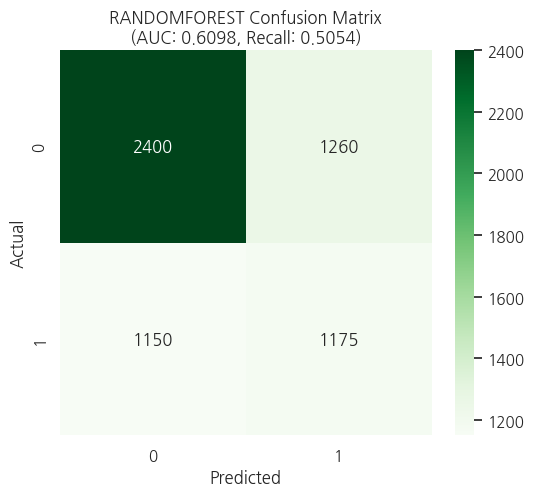

/tmp/ipython-input-1262979039.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


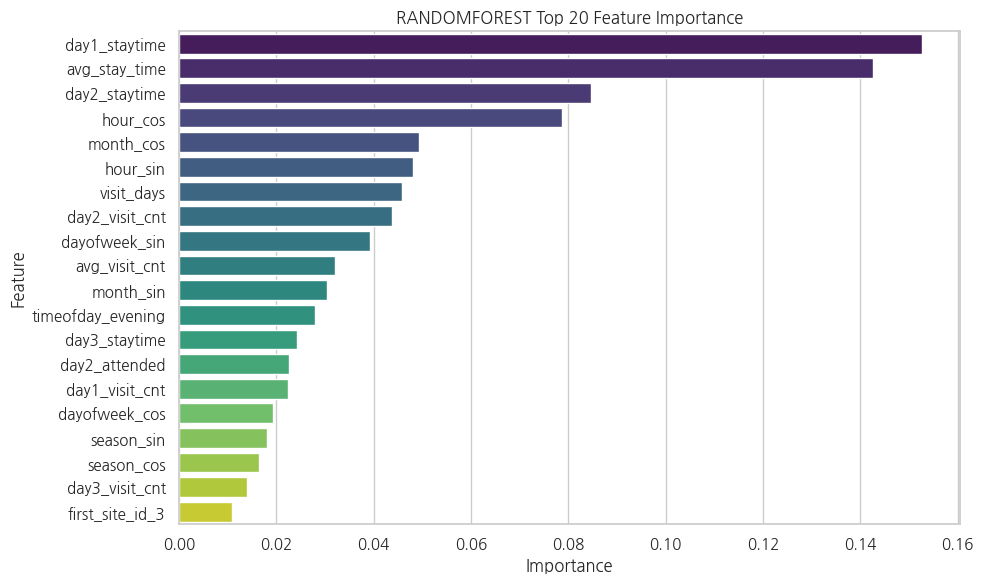

[I 2025-12-07 18:56:09,670] A new study created in memory with name: no-name-950adad3-8851-4ecc-abe7-da617e0eb73b



 >> START OPTIMIZATION: ADABOOST (Metric: recall)


[I 2025-12-07 18:56:10,358] Trial 0 finished with value: 0.4868817204301076 and parameters: {'base_max_depth': 3, 'n_estimators': 166, 'learning_rate': 0.4706202392370353}. Best is trial 0 with value: 0.4868817204301076.
[I 2025-12-07 18:56:22,980] Trial 1 finished with value: 0.4464516129032258 and parameters: {'base_max_depth': 4, 'n_estimators': 393, 'learning_rate': 0.011683194177963555}. Best is trial 0 with value: 0.4868817204301076.
[I 2025-12-07 18:56:25,979] Trial 2 finished with value: 0.4924731182795699 and parameters: {'base_max_depth': 5, 'n_estimators': 62, 'learning_rate': 0.0727567842613063}. Best is trial 2 with value: 0.4924731182795699.
[I 2025-12-07 18:56:27,048] Trial 3 finished with value: 0.3961290322580645 and parameters: {'base_max_depth': 2, 'n_estimators': 100, 'learning_rate': 0.10098049637144542}. Best is trial 2 with value: 0.4924731182795699.
[I 2025-12-07 18:56:27,853] Trial 4 finished with value: 0.43526881720430105 and parameters: {'base_max_depth': 5,

 >> Best RECALL Score: 0.7191

[Evaluation] Generating Final Report for ADABOOST...

 >>> ADABOOST FINAL RESULTS <<<
 1. Accuracy : 0.5104
 2. Recall   : 0.7191
 3. F1 Score : 0.5330
 4. ROC-AUC  : 0.5556
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.38      0.49      3660
           1       0.42      0.72      0.53      2325

    accuracy                           0.51      5985
   macro avg       0.55      0.55      0.51      5985
weighted avg       0.58      0.51      0.50      5985



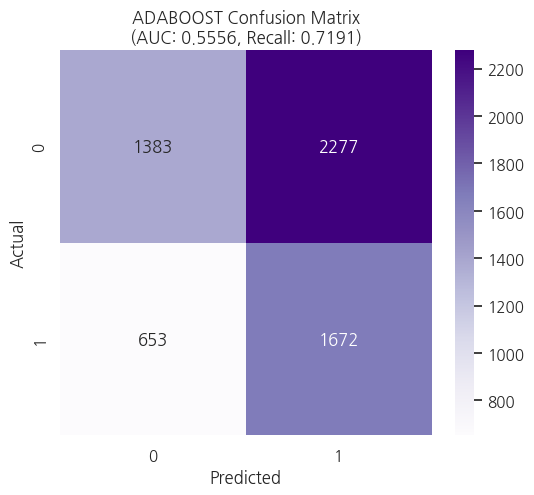

/tmp/ipython-input-1262979039.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


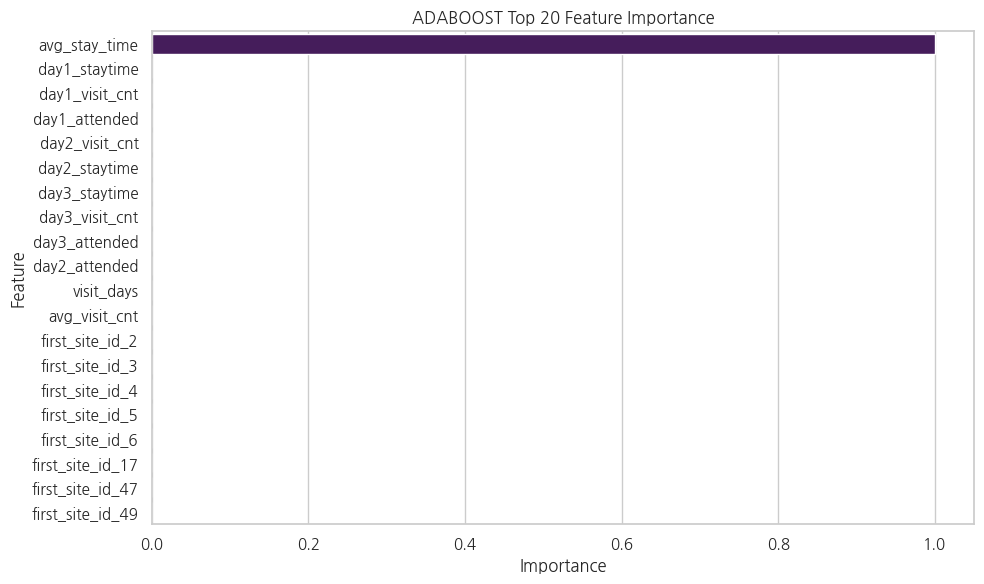

[I 2025-12-07 19:03:24,022] A new study created in memory with name: no-name-31c319f3-f49d-48bc-bdd2-1961d8b54515



 >> START OPTIMIZATION: XGBOOST (Metric: recall)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:03:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:03:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:03:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:03:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:03:27] WARNING: /w

 >> Best RECALL Score: 0.5471

[Evaluation] Generating Final Report for XGBOOST...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:05:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:05:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:05:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:05:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 >>> XGBOOST FINAL RESULTS <<<
 1. Accuracy : 0.5937
 2. Recall   : 0.5471
 3. F1 Score : 0.5113
 4. ROC-AUC  : 0.6129
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      3660
           1       0.48      0.55      0.51      2325

    accuracy                           0.59      5985
   macro avg       0.58      0.59      0.58      5985
weighted avg       0.60      0.59      0.60      5985



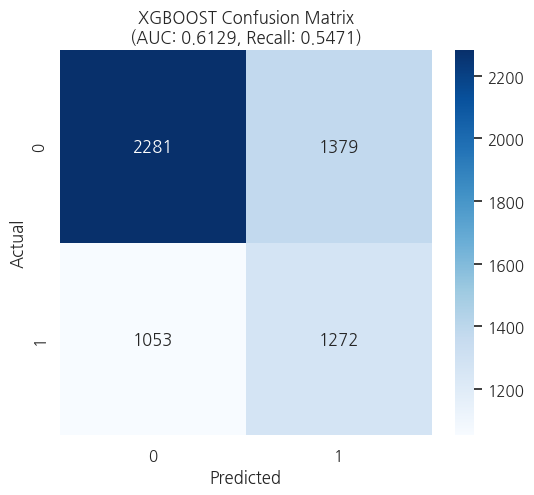

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:05:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/tmp/ipython-input-1262979039.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


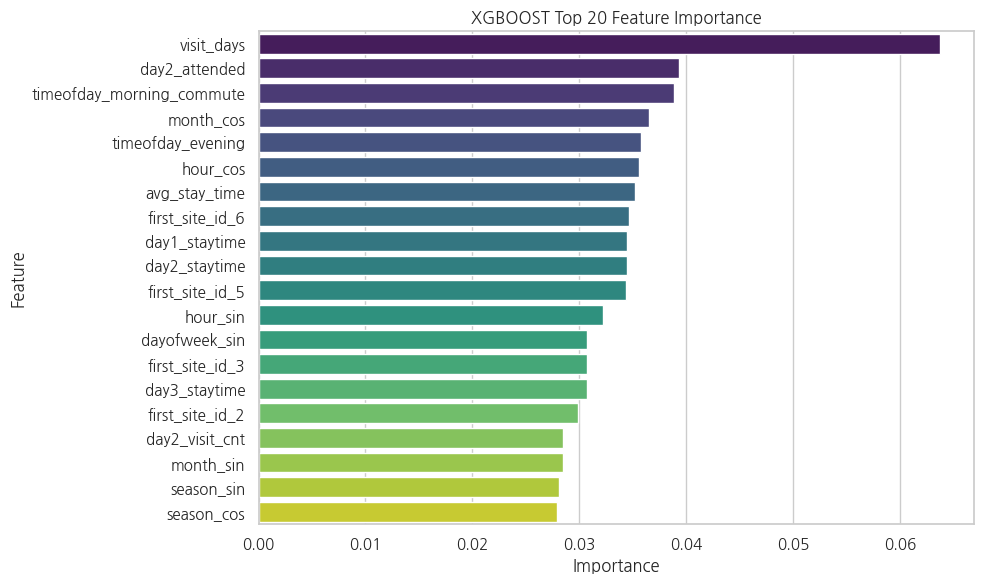

[I 2025-12-07 19:05:57,633] A new study created in memory with name: no-name-74cc76bd-792e-4f70-86bc-1f0625c9c3a7



 >> START OPTIMIZATION: LIGHTGBM (Metric: recall)


[I 2025-12-07 19:06:05,336] Trial 0 finished with value: 0.45376344086021503 and parameters: {'n_estimators': 615, 'learning_rate': 0.16397197083489973, 'num_leaves': 199, 'max_depth': 15, 'subsample': 0.5106850667131917, 'colsample_bytree': 0.5197165647939093, 'reg_alpha': 2.051699195858967, 'reg_lambda': 0.00015790648852687586, 'min_child_samples': 33}. Best is trial 0 with value: 0.45376344086021503.
[I 2025-12-07 19:06:08,495] Trial 1 finished with value: 0.46752688172043005 and parameters: {'n_estimators': 380, 'learning_rate': 0.09570225919067633, 'num_leaves': 89, 'max_depth': 14, 'subsample': 0.7293016121376674, 'colsample_bytree': 0.6774172125970283, 'reg_alpha': 0.0016440187301565374, 'reg_lambda': 0.0693791305683718, 'min_child_samples': 69}. Best is trial 1 with value: 0.46752688172043005.
[I 2025-12-07 19:06:10,282] Trial 2 finished with value: 0.49720430107526886 and parameters: {'n_estimators': 392, 'learning_rate': 0.2523884143823083, 'num_leaves': 151, 'max_depth': 5, 

 >> Best RECALL Score: 0.5462

[Evaluation] Generating Final Report for LIGHTGBM...

 >>> LIGHTGBM FINAL RESULTS <<<
 1. Accuracy : 0.5923
 2. Recall   : 0.5462
 3. F1 Score : 0.5100
 4. ROC-AUC  : 0.6083
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      3660
           1       0.48      0.55      0.51      2325

    accuracy                           0.59      5985
   macro avg       0.58      0.58      0.58      5985
weighted avg       0.60      0.59      0.60      5985



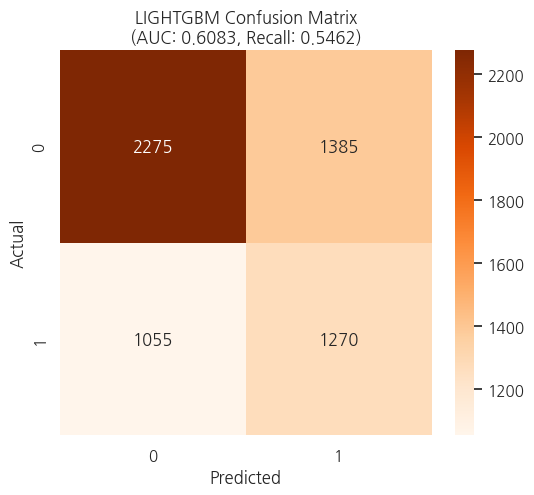

/tmp/ipython-input-1262979039.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


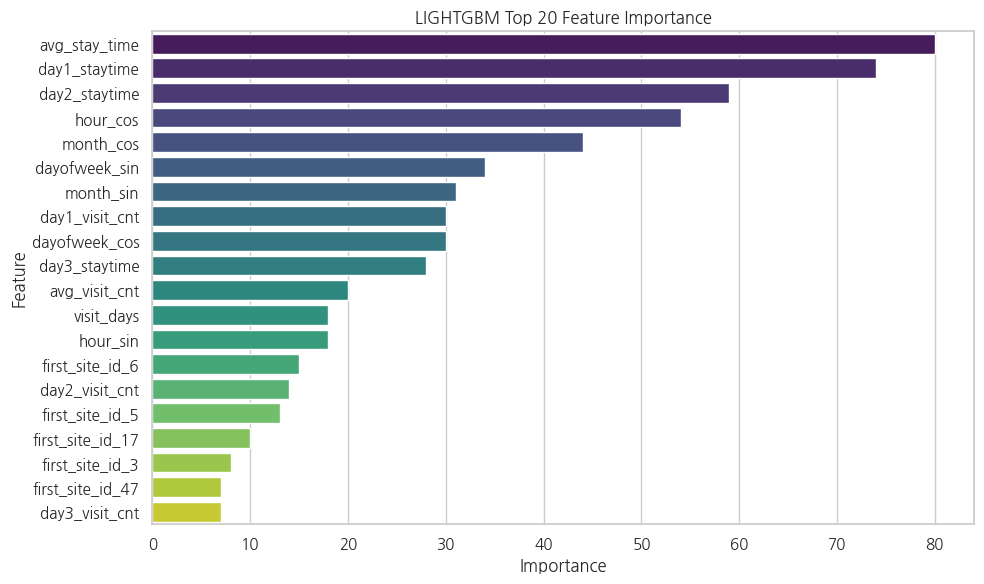


 🏆 FINAL MODEL COMPARISON SUMMARY
          model  accuracy    recall        f1   roc_auc
1      adaboost  0.510443  0.719140  0.532993  0.555643
2       xgboost  0.593651  0.547097  0.511254  0.612926
3      lightgbm  0.592314  0.546237  0.510040  0.608292
0  randomforest  0.597327  0.505376  0.493697  0.609797


In [ ]:
# ======================================================================================
# [6] 메인 실행 블록
# ======================================================================================
if __name__ == "__main__":
    # 1. 데이터 로드
    X, y = load_data(Config.FILE_PATH)

    results_summary = []

    # 2. 설정된 모델들을 순차적으로 실행
    for model_name in Config.MODELS_TO_RUN:
        # (A) 최적화
        best_params = run_optimization(model_name, X, y)

        # (B) 평가 및 시각화
        result = evaluate_and_visualize(model_name, best_params, X, y)
        results_summary.append(result)

    # 3. 전체 모델 비교 요약 출력
    print("\n" + "="*60)
    print(" 🏆 FINAL MODEL COMPARISON SUMMARY")
    print("="*60)
    summary_df = pd.DataFrame(results_summary)
    # 설정한 Target Metric 기준으로 정렬 (내림차순)
    summary_df = summary_df.sort_values(by=Config.TARGET_METRIC, ascending=False)
    print(summary_df)
    print("="*60)